<span style="font-family: 'Nunito Sans';">

## Exercise II: Model selection with Multi Layer Perceptrons

### EXTQ40 Introduction to Artificial Neural Networks and Deep Learning
*Department of Astronomy and Theoretical Physics*  
*Lund University*  
*Fall 2022*

*Author: Joel Bengs*
</span>

---

# Summary
In this exercise I have:

* trained multi-layer perceptrons (MLPs) for both binary and multiple classification problems and a regression problem, and perform model selection to optimize validation performance.

Q1, Q2 and Q3 showed how a network can beocme overfitted when allowed flexibility via more hidden nodes, and that the validation performance then drops. In Q3, the conclusion was that th best performing network accutaly was the simplest one; a linear MLP. This was no suprse as the underlying classification problem was showed no visual non-linear pattern.

Q4, Q5 and Q6 provided training in different methods to reduce overtraining: reduced newtork size, L2 regularization and dropout. No clear differentiation could be made, it seems that the choice of method is highly problem-specific. With this specific problem and seed, dropout and reduced network size was both more effective than L2 regularization.

In Q7-Q9, one had to show deeper understanding for the actualy python code. Q7 provided training in building an MLP from scratch, which was difficult but fun.

In Q10, a model was found that could predict a spiral with 17K trainable parameters over 256 hidden nodes.

---




## The data
There are several datasets in this exercise. 

### syn2
The *syn2* dataset represents a binary classification problem. The input data is 2D which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. The dataset is generated using random numbers each time you run the cell. This means that each time you generate the data it will be slightly different. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot the *syn2* dataset.

Note: This is the same dataset as in exercise 1.

### regr2
There *regr2* dataset represents a more complex synthetic regression problem than *regr1* from exercise 1. It has 6 inputs (independent variables) and one target variable (dependent variable). It is generated according to the following formula:  

$\qquad d = 2x_1 + x_2x_3^2 + e^{x_4} + 5x_5x_6 + 3\sin(2\pi x_6) + \alpha\epsilon$  
    
where $\epsilon$ is added normally distributed noise and $\alpha$ is a parameter controlling the size of the added noise. Variables $x_1,...,x_4$ are normally distributed with zero mean and unit variance, whereas $x_5, x_6$ are uniformly distributed ($[0,1]$). The target value $d$ has a non-linear dependence on ***x***.

### Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

### Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29. 
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. __This is, in summary, a 9-class classification problem with 12 input values for each case.__

### Bioconcentration dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/QSAR+Bioconcentration+classes+dataset* In short, this is a dataset of manually-curated bioconcentration factors (BCF) for 779 chemicals used to determine the mechanisms of bioconcentration, i.e. to predict whether a chemical: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated. Data were randomly split into a training set of 584 compounds (75%) and a test set of 195 compounds (25%), preserving the proportion between the classes. The independent variables consist of 9 molecular descriptors. __This is, in summary, a 3-class classification problem with 9 input values for each case.__

## The questions

There are 10 questions in this exercise, in five different cells below. 

For questions 1-6, code is available that you can run directly or only need to make small modifications to. The first 3 questions deal with 2D binary classification problems. Here you will be able to see the boundary implemented by the different MLPs that you train. Questions 4-6 deal with training a regression network for the *regr2* dataset.

For questions 7-10 we only provide parts of the code and you should add the rest. However, it is typically just a matter of paste and copy from the previous code cells (in a proper way). Question 7-8 deals with Japanese vowels classification problem; here your task is to come up with a model that optimizes the validation result. Question 9 is about the Bioconcentration dataset, and again you should come up with a good model. Finally, the last question is to find a model that can solve the spiral problem.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | MLP | Needed | Defines the MLP model |
| 3 | Data | Needed | Defines the functions to generate the artificial datasets |
| 4 | PlotData | Information | Plots the 2D classification datasets |
| 5 | Statistics | Needed | Defines the functions that calculates various performance measures |
| 6 | Boundary | Needed | Function that can show 2D classification boundaries | 
| 7 | Confusion | Needed | Functions that plots the confusion matrix | 
| 8 | Ex1 | Exercise | For question 1-3 |
| 9 | Ex2 | Exercise | For question 4-6 |
| 10 | Ex3 | Exercise | For question 7-8 |
| 11 | Ex4 | Exercise | For question 9 |
| 12 | Ex5 | Exercise | For question 10 |

In order for you to start with the exercise you need to run all cells with the celltype "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" or "Run all above" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be efficient in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun!

---

### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries

In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import metrics, regularizers, optimizers
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import scipy as sp
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, log_loss, classification_report, precision_score, recall_score
import pandas as pd
from tabulate import tabulate

### CellName: MLP (#2)
### CellType: Needed
### Cell instruction: Defining the MLP model

This cell defines the MLP model. There are a number of parameters that is needed to 
define a model. Here is a list of them: 


* inp_dim: the input dimension (integer)

* n_nod: size of the network, eg [5] for a one hidden layer with 5 nodes and [5,3] for a two layer network with 5 and 3 hidden nodes each.

* drop_nod: Dropout parameter for each hidden layer. You can specipty a single number that will be used for all hidden layers. If you want different dropout parameters for each hidden layer, then specify as a list. Example, for a two hidden layer network drop_nod = [0.5, 0.75] means drop hidden nodes with probability 0.5 and 0.75 for the first and the second hidden layer, respectively. Note that we do not use dropout on the input nodes! Also, a value of 0 means no dropout (i.e. zero probability of removing a node).

* act_fun: the activation function. Most common are
    * 'linear'
    * 'relu'
    * 'tanh'
    * 'sigmoid'
        
* out_act_fun: the activation function for the output nodes. Most common are
    * 'linear'
    * 'sigmoid'
    * 'softmax'
    
* opt_method: The error minimization method. Common choices
    * 'SGD'
    * 'Adam'
    * 'Nadam'
    * 'RMSprop'
    
* cost_fun: The error function used during training. There are three common ones
    * 'mean_squared_error'
    * 'binary_crossentropy'
    * 'categorical_crossentropy'

* lr_rate: The learning rate. 

* metric: The metric to use besides the loss. Common values
    * accuracy
    * mse

* lambd: L2 regularization parameter

* num_out: The number of output nodes

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
def mlp(inp_dim,
            n_nod,
            drop_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            metric = 'accuracy',
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for i, nod in enumerate(n_nod):
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        if type(drop_nod) is list: 
            X = Dropout(drop_nod[i])(X)
        else: 
            X = Dropout(drop_nod)(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(learning_rate = lr_rate),
                  loss = cost_fun,
                  metrics=[metric])       
    
    return model



### CellName: Data (#3)
### CellType: Needed
### Cell instruction: Defining synthetic data sets

This cell defines the different synthetic data sets. It also provides functions for reading the Vowles dataset, the Bioconcentration dataset and the Spiral data. The last function is used for standardization of the data. 

Run the cell by entering into the cell and press "CTRL Enter".

In [3]:
def syn2(N):
    
    global seed
     
    x = np.empty(shape=(N,2), dtype = np.float32)  
    d = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    x[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))

    # Negative samples 
    x[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    # Target
    d[:N1] = np.ones(shape=(N1,))
    d[N1:] = np.zeros(shape=(N-N1,))

    return x,d


def regr2(N, v=0):

    global seed

    x = np.empty(shape=(N,6), dtype = np.float32)  
    
    uni = lambda n : np.random.uniform(0,1,n)
    norm = lambda n : np.random.normal(0,1,n)
    noise =  lambda  n : np.random.normal(0,1,n)
    
    
    for i in range(4):
        x[:,i] = norm(N)
    for j in [4,5]:
        x[:,j] = uni(N)
    
    d =   2*x[:,0] + x[:,1]* x[:,2]**2 + np.exp(x[:,3]) + \
            5*x[:,4]*x[:,5]  + 3*np.sin(2*np.pi*x[:,5])
    std_signal = np.std(d)
    d = d + v * std_signal * noise(N)
        
    return x, d

def twospirals(n_points, turns = 3, noise=0.5):
    """
     Returns the two spirals dataset.
    """
    n = (np.random.rand(n_points,1)*0.95+0.05) * turns * (2*np.pi)
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

def vowels():
    
    def pre_proc(file_name):
        block = []
        x = []
    
        with open(file_name) as file:
            for line in file:    
                if line.strip():
                    numbers = [float(n) for n in line.split()]
                    block.append(numbers)
                else:
                    x.append(block)
                    block = []
                
        ################################
        x = [np.asarray(ar) for ar in x]    
        return x

    x_trn = pre_proc('ae.train')
    x_tst = pre_proc('ae.test')

    
    ############## LABELS###########
    chunk1 = list(range(30,270, 30))
    d_trn = []
    person = 0

    for i, block in enumerate(x_trn):
        if i in chunk1:
            person += 1
        d_trn.extend([person]*block.shape[0])
        
    chunk2 = [31,35,88,44,29,24,40,50,29]
    chunk2 = np.cumsum(chunk2)
    d_tst = []
    person = 0
    for i, block in enumerate(x_tst):
        if i in chunk2:
            person += 1
        d_tst.extend([person]*block.shape[0])

    x_trn = np.vstack(x_trn)
    x_tst = np.vstack(x_tst)
    
    ## Split into train, validation and test
    num_classes = 9
    d_trn = keras.utils.to_categorical(d_trn, num_classes)
    d_tst = keras.utils.to_categorical(d_tst, num_classes)

    from sklearn.model_selection import train_test_split
    x_tst, x_val, d_tst, d_val = train_test_split(x_tst, d_tst, test_size=0.4, random_state=41)

    return x_trn, d_trn, x_val, d_val, x_tst, d_tst

def bcf():

    bcf_trn = pd.read_csv("Grisoni_trn.csv", delimiter='\t')
    bcf_tst = pd.read_csv("Grisoni_tst.csv", delimiter='\t')

    x_trn = bcf_trn.iloc[:,3:12].values.astype(np.float32)
    d_trn = bcf_trn.iloc[:,12].values.astype(np.float32) - 1.0
    d_trn = keras.utils.to_categorical(d_trn, 3)

    x_tst = bcf_tst.iloc[:,3:12].values.astype(np.float32)
    d_tst = bcf_tst.iloc[:,12].values.astype(np.float32) - 1.0
    d_tst = keras.utils.to_categorical(d_tst, 3)
    
    return x_trn, d_trn, x_tst, d_tst

def standard(x):
    return np.mean(x, axis=0) , np.std(x, axis=0)
    

### CellName: PlotData (#4)
### CellType: Information
### Cell instruction: Plotting the data

Here we just generate 100 cases for syn2 and the spiral dataset and plot them. 

Run the cell by entering into the cell and press "CTRL Enter". 

**Note!** This cell is not needed for the actual exercises, it is just to visualize the four different 2D synthetic classification data sets.

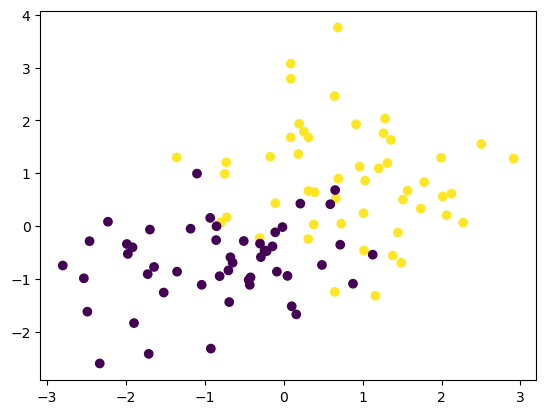

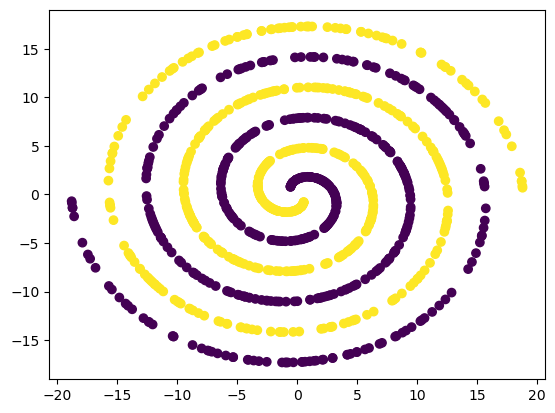

In [4]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

x,d = syn2(100)
plt.figure(2)
plt.scatter(x[:,0],x[:,1], c=d)

x,d = twospirals(500, 3, 0)
plt.figure(4)
plt.scatter(x[:,0],x[:,1], c=d)


### CellName: Statistics (#5)
### CellType: Needed
### Cell instruction: Present result for both classification and regression problems

This cell defines two functions that we are going to call using a trained model to calculate both error and performance measures. 

Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    sens = tp / nof_p
    spec = tn / nof_n
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Sensitivity', 'Specificity', 'Loss']
    B = [acc, sens, spec, loss[0]]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.4f}'.format(A[i], B[i]))

    return print('\n','#'*50)

def stats_reg(d = None, d_pred = None, label = 'Training', estimat = None):
    
    A = ['MSE', 'CorrCoeff']
    
    pcorr = np.corrcoef(d, d_pred)[1,0]
    
    if label.lower() in ['training', 'trn', 'train']:
        mse = estimat.history['loss'][-1]
    else:
        mse = estimat.history['val_loss'][-1] 

    B = [mse, pcorr]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.10f}'.format(A[i], B[i]))

    return print('\n','#'*50)

# CUSTOM FUNCTION FOR Q1-Q3
def calc_accuracy(x = None, y = None, label = 'Training', modl = None):
    """
    output : 
             accuracy = fraction of correctly classified cases
    """
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    acc = (tp + tn) / (len(y)) 
    return acc

### CellName: Confusion (#6)
### CellType: Needed
### Cell Instruction: Plot the confusion matrix

This cell defines the functions need to plot a confusion matrix. A confusion matrix is a summary of the predictions made by a classifier. Each column of the matrix represents the instances of the predicted class while each row represents the instances of the actual class. The function 'plot_confusion_matrix' does the actual plotting, while the 'make_cm_plot' is the one that should be called from the user. See example of usage in the exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [6]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def make_cm_plot(model,
            inp,
            trg,
            num_classes,
            label='Test data'):
    
    print('\n','#'*10,'Result for {}'.format(label), '#'*10, '\n')

    y = model.predict(inp, verbose=0 )
    print('log_loss:   ', '{:.4f}'.format(log_loss(trg, y, eps=1e-15)))

    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    acc = (y_class==d_class).mean()
    print('accuracy:   ', '{:.4f}'.format(acc), '\n')

    class_names = ['class {}'.format(i+1) for i in range(num_classes)]
    print(classification_report(d_class, y_class, target_names=class_names))

    confuTst = confusion_matrix(d_class, y_class)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = class_names,
                          title        = "Confusion Matrix")

### CellName: Boundary (#7)
### CellType: Needed
### Cell Instruction: Decision boundary

This cell defines the function to plot the decision boundary for a 2D input binary MLP classifier. 

Run the cell by entering into the cell and press "CTRL Enter".

In [7]:
def decision_b(X, Y1, model ):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # grid stepsize
    h = 0.025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    Z[Z>.5] = 1
    Z[Z<= .5] = 0

    Y_pr = model.predict(X, batch_size = X.shape[0], verbose=0).reshape(Y1.shape)
  
    Y = np.copy(Y1)
    Y_pr[Y_pr>.5] = 1
    Y_pr[Y_pr<= .5] = 0
    Y[(Y!=Y_pr) & (Y==0)] = 2
    Y[(Y!=Y_pr) & (Y==1)] = 3
    
    
    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha = .9) 
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker='+', c='k')
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker='o', c='k')
       
    plt.scatter(X[:, 0][Y==3], X[:, 1][Y==3], marker = '+', c='r')   
    plt.scatter(X[:, 0][Y==2], X[:, 1][Y==2], marker = 'o', c='r')
    
    
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.show()


---
End of "Needed" and "Information" cells. Below are the cells for the actual exercise.

---

### CellName: Ex1 (#8)
### CellType: Exercise
### Cell instruction: Instruction for questions 1-3

The cell below should be used for questions 1-3. For question 1 you can run the cell as it is (i.e. CTRL-Return). For the other questions you need to modify the cell in order to change hyperparameters etc. 

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance?  For classification problems we will provide 4 different measurements as returned by a call to the *stats_class* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* loss = cross-entropy error (so low loss means good performance!)

For the questions in this exercise, accuracy is an appropriate performance measure.

#### Question 1, single-node validation performance
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation data points. 

Now, use *syn2* (100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?** 

**Note:** Use a fixed random seed for this exercise since you will compare with runs in the next questions.

**Hint:** Remember from the first computer exercise that you should average over a few trained models.

#### Question 2, improving training performance
You are now going to train this model to a high training accuracy! By increasing the number of hidden nodes we should be able to get better and better training performance. **(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?** **(b) What is the performance on the validation data set?**

**Hint:** Remember from the first computer exercise that overtraining often means finding a good local minimum of the loss function, which may require some tuning of the hyperparameters that control the training. This means that you may have to change the learning rate, batch size and the number of epochs. Since the *Adam* method is usually better than the vanilla *stochastic gradient descent*, it is used in the cells below as the default minimizer. 

#### Question 3, optimizing validation performance
However, we are almost always interested in optimal *validation* performance. You should now find the number of hidden nodes that optimize the validation performance. **(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** **(b) Try to give an explanation for the number you obtained.**


In [8]:
%%time

def Q1Q2Q3(n_nod, drop_nod, lr_rate, num_out, number_epochs, minibatch_size, plot, seed):
    # seed = 0 means random, seed > 0 means fixed
    seed = seed
    np.random.seed(seed) if seed else None

    # Generate training data
    x_trn, d_trn = syn2(100)
    x_val, d_val = syn2(1000)

    # Standardization of inputs
    mu, std = standard(x_trn)
    x_trn = (x_trn - mu)/std
    x_val = (x_val - mu)/std

    #### 
    # Define the network, cost function and training settings
    INPUT = {'inp_dim': x_trn.shape[1],         
             'n_nod': n_nod, #[1]               # architecture
             'drop_nod': drop_nod, #0.0,        # dropout specification
             'act_fun': 'tanh',                 # activation functions for the hidden layer
             'out_act_fun': 'sigmoid',          # output activation function
             'opt_method': 'Adam',              # minimization method
             'cost_fun': 'binary_crossentropy', # error function
             'lr_rate': lr_rate, #0.05          # learning rate
             'num_out' : num_out }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes
    number_epochs = number_epochs #500
    minibatch_size = minibatch_size #25
    ####    

    # Get the model
    model_ex1 = mlp(**INPUT)

    # Train the model
    estimator_ex1 = model_ex1.fit(x_trn, d_trn,
                          validation_data=(x_val, d_val),
                          epochs=number_epochs,
                          batch_size=minibatch_size,
                          verbose=0)
    
    if plot:
        # Print a summary of the model
        model_ex1.summary()

        # Call the stats function to print out statistics for classification problems
        stats_class(x_trn, d_trn, 'Training', model_ex1)
        stats_class(x_val, d_val, 'Validation', model_ex1)

        # Training history
        plt.figure()
        plt.ylabel('Loss / Accuracy')
        plt.xlabel('Epoch')
        for k in estimator_ex1.history.keys():
            plt.plot(estimator_ex1.history[k], label = k) 
        plt.legend(loc='best')
        plt.show()

        # Show the decision boundary for the training dataset
        decision_b(x_trn, d_trn, model_ex1)

        # If you uncomment this one you will see how the decsion boundary is with respect to the validation data
        decision_b(x_val, d_val, model_ex1)
        
      
    #Custom accuracy calculator, to use pandas
    acc_train = calc_accuracy(x_trn, d_trn, 'Training', model_ex1)
    acc_val = calc_accuracy(x_val, d_val, 'Validation', model_ex1)

    return estimator_ex1, acc_train, acc_val

Wall time: 0 ns


In [15]:
#Q1 DATAFRAME
q1df = {"run": [], "acc_trn": []}
q1df = pd.DataFrame(q1df)
print(q1df)

Empty DataFrame
Columns: [run, acc_trn]
Index: []


In [18]:
#Q1 SOLUTION
#def Q1Q2Q3(n_nod, drop_nod, lr_rate, num_out, number_epochs, minibatch_size, plot, seed):

#Train 10 models and add accuracy to dataframe
for i in range(10):
    model, acc_trn, acc_val = Q1Q2Q3([1], 0.0, 0.05, 1, 500, 25, False, 3)
    q1df = q1df.append({"run": i+1, "acc_trn": acc_trn}, ignore_index=True)
    print("run: ", i+1, "acc_trn: ", acc_trn)


run:  1 acc_trn:  0.84
run:  2 acc_trn:  0.84
run:  3 acc_trn:  0.84
run:  4 acc_trn:  0.84
run:  5 acc_trn:  0.84
run:  6 acc_trn:  0.85
run:  7 acc_trn:  0.85
run:  8 acc_trn:  0.83
run:  9 acc_trn:  0.84
run:  10 acc_trn:  0.85


In [10]:
#Q1 PRINT
#Print and get mean accuracy
print(q1df.to_markdown())
print("Mean accuracy of all models: ", q1df["accuracy (training)"].mean())

NameError: name 'df' is not defined

In [12]:
#Q2 DATAFRAME
q2 = {"model": [], "lr_rate": [], "batch size": [], "epochs": [], "dropout": [], "run": [], "acc_trn": [], "acc_val": []}
q2df = pd.DataFrame(q2)
print(q2df)

Empty DataFrame
Columns: [model, lr_rate, batch size, epochs, dropout, run, acc_trn, acc_val]
Index: []


In [15]:
#Q2 SOLUTION part 1
#def Q1Q2Q3(n_nod, drop_nod, lr_rate, num_out, number_epochs, minibatch_size, plot, seed):

#STEP 1: Train 10 different models, incrasing the number of hidden nodes. No change in hyper parameters
lr_rate = 0.05
batch_size = 25
epochs = 500
dropout = 0.0
num_out = 1
plot = False
seed = 3

nodes = [1,2,3,5,10,20,30,50,100]
for i in nodes:
    model, acctrain, accval = Q1Q2Q3([i], dropout, lr_rate, num_out, epochs, batch_size, plot, seed)
    q2df = q2df.append({"model": [i], "lr_rate": lr_rate, "batch size": batch_size, "epochs": epochs, "dropout": dropout, "run": 1, "acc_trn": acctrain, "acc_val": accval}, ignore_index=True)
    print("node: ", i, "acc_trn: ", acctrain, "acc_val: ", accval)
    
#Print 
print(q2df)


node:  1 acc_trn:  0.85 acc_val:  0.87
node:  2 acc_trn:  0.89 acc_val:  0.831
node:  3 acc_trn:  0.9 acc_val:  0.833
node:  5 acc_trn:  0.92 acc_val:  0.834
node:  10 acc_trn:  0.97 acc_val:  0.827
node:  20 acc_trn:  0.97 acc_val:  0.818
node:  30 acc_trn:  0.97 acc_val:  0.816
node:  50 acc_trn:  0.97 acc_val:  0.822
node:  100 acc_trn:  0.97 acc_val:  0.834
   model  lr_rate  batch size  epochs  dropout  run  acc_trn  acc_val
0    [1]     0.05        25.0   500.0      0.0  1.0     0.85    0.870
1    [2]     0.05        25.0   500.0      0.0  1.0     0.89    0.831
2    [3]     0.05        25.0   500.0      0.0  1.0     0.90    0.833
3    [5]     0.05        25.0   500.0      0.0  1.0     0.92    0.834
4   [10]     0.05        25.0   500.0      0.0  1.0     0.97    0.827
5   [20]     0.05        25.0   500.0      0.0  1.0     0.97    0.818
6   [30]     0.05        25.0   500.0      0.0  1.0     0.97    0.816
7   [50]     0.05        25.0   500.0      0.0  1.0     0.97    0.822
8  [10

In [17]:
#Q2 PRINT
print(q2df.to_markdown())

|    | model   |   lr_rate |   batch size |   epochs |   dropout |   run |   acc_trn |   acc_val |
|---:|:--------|----------:|-------------:|---------:|----------:|------:|----------:|----------:|
|  0 | [1]     |      0.05 |           25 |      500 |         0 |     1 |      0.85 |     0.87  |
|  1 | [2]     |      0.05 |           25 |      500 |         0 |     1 |      0.89 |     0.831 |
|  2 | [3]     |      0.05 |           25 |      500 |         0 |     1 |      0.9  |     0.833 |
|  3 | [5]     |      0.05 |           25 |      500 |         0 |     1 |      0.92 |     0.834 |
|  4 | [10]    |      0.05 |           25 |      500 |         0 |     1 |      0.97 |     0.827 |
|  5 | [20]    |      0.05 |           25 |      500 |         0 |     1 |      0.97 |     0.818 |
|  6 | [30]    |      0.05 |           25 |      500 |         0 |     1 |      0.97 |     0.816 |
|  7 | [50]    |      0.05 |           25 |      500 |         0 |     1 |      0.97 |     0.822 |
|  8 | [10

In [18]:
#Q2 DATAFRAME PART 2
q2b = {"model": [], "lr_rate": [], "batch size": [], "epochs": [], "dropout": [], "run": [], "acc_trn": [], "acc_val": []}
q2bdf = pd.DataFrame(q2b)
print(q2bdf)

Empty DataFrame
Columns: [model, lr_rate, batch size, epochs, dropout, run, acc_trn, acc_val]
Index: []


In [44]:
#Q2 SOLUTION PART 2
#STEP 2: Investigate the area around 5-15 nodes
lr_rate = 0.05
batch_size = 25
epochs = 500
dropout = 0.0
num_out = 1
plot = False
seed = 3

nodes = [5,7,10]
for i in nodes:
    for run in range(5):
        model, acctrn, accval = Q1Q2Q3([i], dropout, lr_rate, num_out, epochs, batch_size, plot, seed)
        q2bdf = q2bdf.append({"model": i, "lr_rate": lr_rate, "batch size": batch_size, "epochs": epochs, "dropout": dropout, "run": run, "acc_trn": acctrn, "acc_val": accval}, ignore_index=True)
        print("node: ", i, "acc_trn: ", acctrn, "acc_val: ", accval)
    
#Print 
print(q2bdf)


node:  5 acc_trn:  0.92 acc_val:  0.841
node:  5 acc_trn:  0.9 acc_val:  0.828
node:  5 acc_trn:  0.92 acc_val:  0.84
node:  5 acc_trn:  0.94 acc_val:  0.836
node:  5 acc_trn:  0.93 acc_val:  0.833
node:  7 acc_trn:  0.97 acc_val:  0.811
node:  7 acc_trn:  0.96 acc_val:  0.824
node:  7 acc_trn:  0.95 acc_val:  0.829
node:  7 acc_trn:  0.96 acc_val:  0.823
node:  7 acc_trn:  0.95 acc_val:  0.832
node:  10 acc_trn:  0.95 acc_val:  0.828
node:  10 acc_trn:  0.96 acc_val:  0.827
node:  10 acc_trn:  0.98 acc_val:  0.803
node:  10 acc_trn:  0.95 acc_val:  0.831
node:  10 acc_trn:  0.97 acc_val:  0.819
   model  lr_rate  batch size  epochs  dropout  run  acc_trn  acc_val
0    [5]     0.05        25.0   500.0      0.0  0.0     0.95    0.827
1    [5]     0.05        25.0   500.0      0.0  1.0     0.93    0.841
2    [5]     0.05        25.0   500.0      0.0  2.0     0.94    0.805
3    [5]     0.05        25.0   500.0      0.0  3.0     0.94    0.828
4    [5]     0.05        25.0   500.0      0.0 

In [50]:
#Q2 PART 2 PRINT

q2bdf.reset_index(drop=True, inplace=True)
print(q2bdf.to_markdown())

for i in [5,7,10]:  
     print("Mean of training accuracy for model with " + str(i) + " nodes: ", q2bdf.loc[q2bdf["model"] == i, 'acc_trn'].mean())
     print("Mean of validation accuracy for model with " + str(i) + " nodes: ", q2bdf.loc[q2bdf["model"] == i, 'acc_val'].mean())

|    |   model |   lr_rate |   batch size |   epochs |   dropout |   run |   acc_trn |   acc_val |
|---:|--------:|----------:|-------------:|---------:|----------:|------:|----------:|----------:|
|  0 |       5 |      0.05 |           25 |      500 |         0 |     0 |      0.92 |     0.841 |
|  1 |       5 |      0.05 |           25 |      500 |         0 |     1 |      0.9  |     0.828 |
|  2 |       5 |      0.05 |           25 |      500 |         0 |     2 |      0.92 |     0.84  |
|  3 |       5 |      0.05 |           25 |      500 |         0 |     3 |      0.94 |     0.836 |
|  4 |       5 |      0.05 |           25 |      500 |         0 |     4 |      0.93 |     0.833 |
|  5 |       7 |      0.05 |           25 |      500 |         0 |     0 |      0.97 |     0.811 |
|  6 |       7 |      0.05 |           25 |      500 |         0 |     1 |      0.96 |     0.824 |
|  7 |       7 |      0.05 |           25 |      500 |         0 |     2 |      0.95 |     0.829 |
|  8 |    

In [12]:
#Q3 DATAFRAMES
q3a = {"model": [], "lr_rate": [], "batch size": [], "epochs": [], "dropout": [], "run": [], "acc_trn": [], "acc_val": []}
q3a = pd.DataFrame(q3a)
print(q3a)

q3b = {"model": [], "lr_rate": [], "batch size": [], "epochs": [], "dropout": [], "run": [], "acc_trn": [], "acc_val": []}
q3b = pd.DataFrame(q3b)
print(q3b)

Empty DataFrame
Columns: [model, lr_rate, batch size, epochs, dropout, run, acc_trn, acc_val]
Index: []
Empty DataFrame
Columns: [model, lr_rate, batch size, epochs, dropout, run, acc_trn, acc_val]
Index: []


In [13]:
#Q3 SOLUTION part 1
lr_rate = 0.05
batch_size = 25
epochs = 500
dropout = 0.0
num_out = 1
plot = False
seed = 3

nodes = [1,2]
for i in nodes:
    for run in range(5):
        model, acctrn, accval = Q1Q2Q3([i], dropout, lr_rate, num_out, epochs, batch_size, plot, seed)
        q3a = q3a.append({"model": i, "lr_rate": lr_rate, "batch size": batch_size, "epochs": epochs, "dropout": dropout, "run": run + 1, "acc_trn": acctrn, "acc_val": accval}, ignore_index=True)
        print("node: ", i, "acc_trn: ", acctrn, "acc_val: ", accval)
    
#Print 
print("NODES: 1 OR 2")
print(q3)

node:  1 acc_trn:  0.84 acc_val:  0.873
node:  1 acc_trn:  0.84 acc_val:  0.872
node:  1 acc_trn:  0.84 acc_val:  0.87
node:  1 acc_trn:  0.84 acc_val:  0.873
node:  1 acc_trn:  0.84 acc_val:  0.873
node:  2 acc_trn:  0.89 acc_val:  0.829
node:  2 acc_trn:  0.89 acc_val:  0.827
node:  2 acc_trn:  0.88 acc_val:  0.832
node:  2 acc_trn:  0.88 acc_val:  0.83
node:  2 acc_trn:  0.89 acc_val:  0.829
NODES: 1 OR 2
Empty DataFrame
Columns: [model, lr_rate, batch size, epochs, dropout, run, acc_trn, acc_val]
Index: []


In [14]:
#Q3 SOLUTION part 2, 36 networks
lr_rates = [0.01, 0.025, 0.05, 0.1]
batch_sizes = [25,13,10]
epochs = 500
dropout = 0.0
num_out = 1
plot = False
seed = 3
nodes = [1]
i = 1 #nodes, without brackets to allow pandas to find it later

for lr_rate in lr_rates:
    for batch_size in batch_sizes:
        for run in range(3):
            model, acctrn, accval = Q1Q2Q3(nodes, dropout, lr_rate, num_out, epochs, batch_size, plot, seed)
            q3b = q3b.append({"model": i, "lr_rate": lr_rate, "batch size": batch_size, "epochs": epochs, "dropout": dropout, "run": run + 1, "acc_trn": acctrn, "acc_val": accval}, ignore_index=True)
            print("node: ", i, "acc_trn: ", acctrn, "acc_val: ", accval)
    
#Print 
print("HYPERPARAMETERS")
print(q3b)

node:  2 acc_trn:  0.87 acc_val:  0.866
node:  2 acc_trn:  0.87 acc_val:  0.857
node:  2 acc_trn:  0.84 acc_val:  0.869
node:  2 acc_trn:  0.84 acc_val:  0.868
node:  2 acc_trn:  0.87 acc_val:  0.857
node:  2 acc_trn:  0.84 acc_val:  0.869
node:  2 acc_trn:  0.87 acc_val:  0.858
node:  2 acc_trn:  0.87 acc_val:  0.862
node:  2 acc_trn:  0.84 acc_val:  0.873
node:  2 acc_trn:  0.84 acc_val:  0.871
node:  2 acc_trn:  0.84 acc_val:  0.873
node:  2 acc_trn:  0.84 acc_val:  0.871
node:  2 acc_trn:  0.83 acc_val:  0.872
node:  2 acc_trn:  0.84 acc_val:  0.874
node:  2 acc_trn:  0.86 acc_val:  0.878
node:  2 acc_trn:  0.85 acc_val:  0.865
node:  2 acc_trn:  0.84 acc_val:  0.868
node:  2 acc_trn:  0.86 acc_val:  0.874
node:  2 acc_trn:  0.83 acc_val:  0.873
node:  2 acc_trn:  0.85 acc_val:  0.873
node:  2 acc_trn:  0.84 acc_val:  0.876
node:  2 acc_trn:  0.85 acc_val:  0.877
node:  2 acc_trn:  0.85 acc_val:  0.866
node:  2 acc_trn:  0.86 acc_val:  0.876
node:  2 acc_trn:  0.84 acc_val:  0.865


In [15]:
#Q3 PART 1 PRINT
print("####Q3 PART 1 PRINT####")
print(q3a.to_markdown())

for i in [1,2]:  
     print("Mean of validation accuracy for model with " + str(i) + " nodes: ", q3a.loc[q3a["model"] == i, 'acc_val'].mean())

####Q3 PART 1 PRINT####
|    |   model |   lr_rate |   batch size |   epochs |   dropout |   run |   acc_trn |   acc_val |
|---:|--------:|----------:|-------------:|---------:|----------:|------:|----------:|----------:|
|  0 |       1 |      0.05 |           25 |      500 |         0 |     1 |      0.84 |     0.873 |
|  1 |       1 |      0.05 |           25 |      500 |         0 |     2 |      0.84 |     0.872 |
|  2 |       1 |      0.05 |           25 |      500 |         0 |     3 |      0.84 |     0.87  |
|  3 |       1 |      0.05 |           25 |      500 |         0 |     4 |      0.84 |     0.873 |
|  4 |       1 |      0.05 |           25 |      500 |         0 |     5 |      0.84 |     0.873 |
|  5 |       2 |      0.05 |           25 |      500 |         0 |     1 |      0.89 |     0.829 |
|  6 |       2 |      0.05 |           25 |      500 |         0 |     2 |      0.89 |     0.827 |
|  7 |       2 |      0.05 |           25 |      500 |         0 |     3 |      0.88 

In [30]:
#Q3 PART 2 PRINT
print("####Q3 PART 2 PRINT####")
print(q3b.to_markdown())

lr_rates = [0.01, 0.025, 0.05, 0.1]
batch_sizes = [25,13,10]

for lr_rate in lr_rates:
    print("Mean validation accuracy with learning rate " + str(lr_rate) + ":", q3b.loc[q3b["lr_rate"] == lr_rate, 'acc_val'].mean())
        
for batch_size in batch_sizes:
    print("Mean validation accuracy with batch_size " + str(batch_size) + ":", q3b.loc[q3b["batch size"] == batch_size, 'acc_val'].mean())


####Q3 PART 2 PRINT####
|    |   model |   lr_rate |   batch size |   epochs |   dropout |   run |   acc_trn |   acc_val |
|---:|--------:|----------:|-------------:|---------:|----------:|------:|----------:|----------:|
|  0 |       1 |     0.01  |           25 |      500 |         0 |     1 |      0.87 |     0.866 |
|  1 |       1 |     0.01  |           25 |      500 |         0 |     2 |      0.87 |     0.857 |
|  2 |       1 |     0.01  |           25 |      500 |         0 |     3 |      0.84 |     0.869 |
|  3 |       1 |     0.01  |           13 |      500 |         0 |     1 |      0.84 |     0.868 |
|  4 |       1 |     0.01  |           13 |      500 |         0 |     2 |      0.87 |     0.857 |
|  5 |       1 |     0.01  |           13 |      500 |         0 |     3 |      0.84 |     0.869 |
|  6 |       1 |     0.01  |           10 |      500 |         0 |     1 |      0.87 |     0.858 |
|  7 |       1 |     0.01  |           10 |      500 |         0 |     2 |      0.87 

In [40]:
# REDUCTION OF DATA FROM Q3 PART 2 - NOT COMPLETED
lr_rates = [0.01]# 0.025, 0.05, 0.1]
batch_sizes = [25]#,13,10]
#q3c = q3b.drop(index=range(q3b.shape[0])) #makes a copy where all rows are droped. Rows are shape[0]
#print(q3c)

for lr_rate in lr_rates:
    for batch_size in batch_sizes:
        #print(q3b.loc[ (q3b["lr_rate"] == 0.01, q3b["batch size"] == 25) ])
        print(q3b.loc[q3b["batch size"] == 25])
    

    model  lr_rate  batch size  epochs  dropout  run  acc_trn  acc_val
0     1.0    0.010        25.0   500.0      0.0  1.0     0.87    0.866
1     1.0    0.010        25.0   500.0      0.0  2.0     0.87    0.857
2     1.0    0.010        25.0   500.0      0.0  3.0     0.84    0.869
9     1.0    0.025        25.0   500.0      0.0  1.0     0.84    0.871
10    1.0    0.025        25.0   500.0      0.0  2.0     0.84    0.873
11    1.0    0.025        25.0   500.0      0.0  3.0     0.84    0.871
18    1.0    0.050        25.0   500.0      0.0  1.0     0.83    0.873
19    1.0    0.050        25.0   500.0      0.0  2.0     0.85    0.873
20    1.0    0.050        25.0   500.0      0.0  3.0     0.84    0.876
27    1.0    0.100        25.0   500.0      0.0  1.0     0.84    0.868
28    1.0    0.100        25.0   500.0      0.0  2.0     0.87    0.862
29    1.0    0.100        25.0   500.0      0.0  3.0     0.86    0.864


In [31]:
# CELL TO SAVE THE DATA BETWEEN WORK SESSIONS

print(q3a.to_dict())
print(q3b.to_dict())

{'model': {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2.0, 7: 2.0, 8: 2.0, 9: 2.0}, 'lr_rate': {0: 0.05, 1: 0.05, 2: 0.05, 3: 0.05, 4: 0.05, 5: 0.05, 6: 0.05, 7: 0.05, 8: 0.05, 9: 0.05}, 'batch size': {0: 25.0, 1: 25.0, 2: 25.0, 3: 25.0, 4: 25.0, 5: 25.0, 6: 25.0, 7: 25.0, 8: 25.0, 9: 25.0}, 'epochs': {0: 500.0, 1: 500.0, 2: 500.0, 3: 500.0, 4: 500.0, 5: 500.0, 6: 500.0, 7: 500.0, 8: 500.0, 9: 500.0}, 'dropout': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}, 'run': {0: 1.0, 1: 2.0, 2: 3.0, 3: 4.0, 4: 5.0, 5: 1.0, 6: 2.0, 7: 3.0, 8: 4.0, 9: 5.0}, 'acc_trn': {0: 0.84, 1: 0.84, 2: 0.84, 3: 0.84, 4: 0.84, 5: 0.89, 6: 0.89, 7: 0.88, 8: 0.88, 9: 0.89}, 'acc_val': {0: 0.873, 1: 0.872, 2: 0.87, 3: 0.873, 4: 0.873, 5: 0.829, 6: 0.827, 7: 0.832, 8: 0.83, 9: 0.829}}
{'model': {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 2

In [10]:
# CELL TO LOAD THE DATA BETWEEN WORK SESSIONS
q3a = {'model': {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2.0, 7: 2.0, 8: 2.0, 9: 2.0}, 'lr_rate': {0: 0.05, 1: 0.05, 2: 0.05, 3: 0.05, 4: 0.05, 5: 0.05, 6: 0.05, 7: 0.05, 8: 0.05, 9: 0.05}, 'batch size': {0: 25.0, 1: 25.0, 2: 25.0, 3: 25.0, 4: 25.0, 5: 25.0, 6: 25.0, 7: 25.0, 8: 25.0, 9: 25.0}, 'epochs': {0: 500.0, 1: 500.0, 2: 500.0, 3: 500.0, 4: 500.0, 5: 500.0, 6: 500.0, 7: 500.0, 8: 500.0, 9: 500.0}, 'dropout': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}, 'run': {0: 1.0, 1: 2.0, 2: 3.0, 3: 4.0, 4: 5.0, 5: 1.0, 6: 2.0, 7: 3.0, 8: 4.0, 9: 5.0}, 'acc_trn': {0: 0.84, 1: 0.84, 2: 0.84, 3: 0.84, 4: 0.84, 5: 0.89, 6: 0.89, 7: 0.88, 8: 0.88, 9: 0.89}, 'acc_val': {0: 0.873, 1: 0.872, 2: 0.87, 3: 0.873, 4: 0.873, 5: 0.829, 6: 0.827, 7: 0.832, 8: 0.83, 9: 0.829}}
q3a = pd.DataFrame(q3a)
print(q3a)

q3b = {'model': {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0}, 'lr_rate': {0: 0.01, 1: 0.01, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01, 8: 0.01, 9: 0.025, 10: 0.025, 11: 0.025, 12: 0.025, 13: 0.025, 14: 0.025, 15: 0.025, 16: 0.025, 17: 0.025, 18: 0.05, 19: 0.05, 20: 0.05, 21: 0.05, 22: 0.05, 23: 0.05, 24: 0.05, 25: 0.05, 26: 0.05, 27: 0.1, 28: 0.1, 29: 0.1, 30: 0.1, 31: 0.1, 32: 0.1, 33: 0.1, 34: 0.1, 35: 0.1}, 'batch size': {0: 25.0, 1: 25.0, 2: 25.0, 3: 13.0, 4: 13.0, 5: 13.0, 6: 10.0, 7: 10.0, 8: 10.0, 9: 25.0, 10: 25.0, 11: 25.0, 12: 13.0, 13: 13.0, 14: 13.0, 15: 10.0, 16: 10.0, 17: 10.0, 18: 25.0, 19: 25.0, 20: 25.0, 21: 13.0, 22: 13.0, 23: 13.0, 24: 10.0, 25: 10.0, 26: 10.0, 27: 25.0, 28: 25.0, 29: 25.0, 30: 13.0, 31: 13.0, 32: 13.0, 33: 10.0, 34: 10.0, 35: 10.0}, 'epochs': {0: 500.0, 1: 500.0, 2: 500.0, 3: 500.0, 4: 500.0, 5: 500.0, 6: 500.0, 7: 500.0, 8: 500.0, 9: 500.0, 10: 500.0, 11: 500.0, 12: 500.0, 13: 500.0, 14: 500.0, 15: 500.0, 16: 500.0, 17: 500.0, 18: 500.0, 19: 500.0, 20: 500.0, 21: 500.0, 22: 500.0, 23: 500.0, 24: 500.0, 25: 500.0, 26: 500.0, 27: 500.0, 28: 500.0, 29: 500.0, 30: 500.0, 31: 500.0, 32: 500.0, 33: 500.0, 34: 500.0, 35: 500.0}, 'dropout': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0}, 'run': {0: 1.0, 1: 2.0, 2: 3.0, 3: 1.0, 4: 2.0, 5: 3.0, 6: 1.0, 7: 2.0, 8: 3.0, 9: 1.0, 10: 2.0, 11: 3.0, 12: 1.0, 13: 2.0, 14: 3.0, 15: 1.0, 16: 2.0, 17: 3.0, 18: 1.0, 19: 2.0, 20: 3.0, 21: 1.0, 22: 2.0, 23: 3.0, 24: 1.0, 25: 2.0, 26: 3.0, 27: 1.0, 28: 2.0, 29: 3.0, 30: 1.0, 31: 2.0, 32: 3.0, 33: 1.0, 34: 2.0, 35: 3.0}, 'acc_trn': {0: 0.87, 1: 0.87, 2: 0.84, 3: 0.84, 4: 0.87, 5: 0.84, 6: 0.87, 7: 0.87, 8: 0.84, 9: 0.84, 10: 0.84, 11: 0.84, 12: 0.83, 13: 0.84, 14: 0.86, 15: 0.85, 16: 0.84, 17: 0.86, 18: 0.83, 19: 0.85, 20: 0.84, 21: 0.85, 22: 0.85, 23: 0.86, 24: 0.84, 25: 0.86, 26: 0.87, 27: 0.84, 28: 0.87, 29: 0.86, 30: 0.88, 31: 0.86, 32: 0.85, 33: 0.88, 34: 0.87, 35: 0.87}, 'acc_val': {0: 0.866, 1: 0.857, 2: 0.869, 3: 0.868, 4: 0.857, 5: 0.869, 6: 0.858, 7: 0.862, 8: 0.873, 9: 0.871, 10: 0.873, 11: 0.871, 12: 0.872, 13: 0.874, 14: 0.878, 15: 0.865, 16: 0.868, 17: 0.874, 18: 0.873, 19: 0.873, 20: 0.876, 21: 0.877, 22: 0.866, 23: 0.876, 24: 0.865, 25: 0.866, 26: 0.86, 27: 0.868, 28: 0.862, 29: 0.864, 30: 0.854, 31: 0.866, 32: 0.87, 33: 0.853, 34: 0.86, 35: 0.857}}
q3b = pd.DataFrame(q3b)
print(q3b)

   model  lr_rate  batch size  epochs  dropout  run  acc_trn  acc_val
0    1.0     0.05        25.0   500.0      0.0  1.0     0.84    0.873
1    1.0     0.05        25.0   500.0      0.0  2.0     0.84    0.872
2    1.0     0.05        25.0   500.0      0.0  3.0     0.84    0.870
3    1.0     0.05        25.0   500.0      0.0  4.0     0.84    0.873
4    1.0     0.05        25.0   500.0      0.0  5.0     0.84    0.873
5    2.0     0.05        25.0   500.0      0.0  1.0     0.89    0.829
6    2.0     0.05        25.0   500.0      0.0  2.0     0.89    0.827
7    2.0     0.05        25.0   500.0      0.0  3.0     0.88    0.832
8    2.0     0.05        25.0   500.0      0.0  4.0     0.88    0.830
9    2.0     0.05        25.0   500.0      0.0  5.0     0.89    0.829
    model  lr_rate  batch size  epochs  dropout  run  acc_trn  acc_val
0     1.0    0.010        25.0   500.0      0.0  1.0     0.87    0.866
1     1.0    0.010        25.0   500.0      0.0  2.0     0.87    0.857
2     1.0    0.01

###### CellName: Ex2 (#9)
### CellType: Exercise
### Cell instruction: Instruction for questions 4-6

Now we are going to look at a regression problem. The data as described above (*regr2*) consists of 6 inputs (features) and one output (target) value. As in the previous exercise, a new data set is generated each time you call the *regr2* function. To get exactly the same data set between different calls, use a fixed seed. For this problem we can control the amount of noise added to the target value. We are going to use a relatively small training dataset (250) and a larger validation dataset (1000) to get a more robust estimation of the generalization performance, and 0.4 units of noise. For regression problems we also need new performance measures. The *stats_reg* function will give you two such measures:
* MSE = mean squared error (low error means good performance)
* CorrCoeff = Pearson correlation coefficient for the scatter plot between predicted and true values.

The cell below can be used as a template for all questions regarding this regression problem.

#### Question 4, optimizing regression performance
*Model selection based on the number of hidden nodes (in a single hidden layer).* Find the number of hidden nodes that gives best validation performance. **How many hidden nodes gives the best validation performance?** **What is the best validation MSE (or correlation coefficient) you get?**

**Hint:** A good strategy is to start with a "small" model and increase the number of hidden nodes and monitor the validation result.

#### Question 5, improving generalization with regularization
*Model selection based on L2 (weight decay).* Instead of using the number of hidden nodes to control the complexity we can use a regularization term added to the error function. You are going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell). For the L2 regularization to make sense we need a start model that is capable being overtrained. The suggestion is to use at least twice as many hidden nodes for this question compared to what you found in Q4. You should modify the *L2* value until you find the optimal validation performance. **(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4?**

**Hint:** When you test different values for a hyperparameter, it usually makes more sense to multiply with a constant factor than to add a constant term. For example, if you test five values in the range from 0.1 to 10, the values {0.1, 0.3, 1, 3, 10} are usually a better choice than {0.1, 2.5, 5, 7.5, 10}.

#### Question 6, improving generalization with dropout
*Model selection based on dropout.* Instead of using the *L2* regularizer we can use dropout. In short, repeat Q5, but use the *dropout* parameter instead. **(a) Present your optimal model (dropout value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4/Q5?** 

**Hint:** Using dropout may require even more hidden nodes to start with! 

#### Extra question
The extra questions is provided if you have extra time. **These question are not required for the course and do not influence any grading.** 

Repeat Q4-Q6 using two hidden layers.


In [43]:
%%time

def Q4Q5Q6(n_nod, drop_nod, lr_rate, num_out, number_epochs, minibatch_size, lambd, plot, seed):
    # seed = 0 means random, seed > 0 means fixed
    np.random.seed(seed) if seed else None

    # Generate training and validation data
    x_trn, d_trn = regr2(250, 0.4)
    x_val, d_val = regr2(1000, 0.4)

    # Standardization of both inputs and targets
    mu, std = standard(x_trn)
    x_trn = (x_trn - mu)/std
    x_val = (x_val - mu)/std

    mu, std = standard(d_trn)
    d_trn = (d_trn - mu) / std
    d_val = (d_val - mu) / std

    #### 
    # Define the network, cost function and training settings
    INPUT = {'inp_dim': x_trn.shape[1],         
             'n_nod': n_nod,                  
             'drop_nod': drop_nod,                
             'act_fun': 'tanh',             
             'out_act_fun': 'linear',      
             'opt_method': 'Adam',         
             'cost_fun': 'mse',           
             'lr_rate': lr_rate,            
             'metric': 'mse',              
             'lambd' : lambd,             
             'num_out' : num_out }    
    number_epochs = number_epochs
    minibatch_size = minibatch_size
    ####    

    # Get the model
    model_ex2 = mlp(**INPUT)

    # Train the model
    estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                          validation_data=(x_val,d_val),
                          epochs=number_epochs,
                          batch_size=minibatch_size,
                          verbose=0)

    # Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
    pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
    pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
        
    if plot:
       
        stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
        stats_reg(d_val, pred_val, 'Validation', estimator_ex2)
        
        # Print a summary of the model
        model_ex2.summary()

        # Scatter plots of predicted and true values
        plt.figure()
        plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
        plt.legend()
        plt.figure()
        plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
        plt.legend()
        plt.show()


        # Training history
        plt.figure()
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        for k in ['loss', 'val_loss']:
            plt.plot(estimator_ex2.history[k], label = k) 
        plt.legend(loc='best')
        
    # CUSTOM FUNCTION TO RETRIVE PERFORMANCE MEASURES
    mse_trn, mse_val, pcorr_trn, pcorr_val = stats_reg_custom(d_trn, pred_trn, d_val, pred_val, estimator_ex2)
    return estimator_ex2, mse_trn, mse_val, pcorr_trn, pcorr_val

# CUSTOM FUNCTION FOR Q4-Q6
def stats_reg_custom(d_trn = None, d_pred_trn = None, d_val = None, d_pred_val = None, estimat = None):
    
    mse_trn = estimat.history['loss'][-1]
    mse_val = estimat.history['val_loss'][-1]
    pcorr_trn = np.corrcoef(d_trn, d_pred_trn)[1,0]
    pcorr_val = np.corrcoef(d_val, d_pred_val)[1,0]
    
    return mse_trn, mse_val, pcorr_trn, pcorr_val

Wall time: 0 ns


In [35]:
#Q4 DATAFRAME
q4a = {"nodes": [], "lr_rate": [], "batch": [], "epochs": [], "drop": [], "run": [], "mse_trn": [], "mse_val": [], "pcorr_trn": [], "pcorr_val": []}
q4a = pd.DataFrame(q4a)
print(q4a)

Empty DataFrame
Columns: [nodes, lr_rate, batch, epochs, drop, run, mse_trn, mse_val, pcorr_trn, pcorr_val]
Index: []


In [36]:
#Q4 TRIAL ONE Optimizing regression performance using number of hidden nodes
#inital values
nodes = [1,2,3,4,5,7,10,15,20,30,50,100]
dropout = 0.0
lr_rate = 0.025
num_out = int(1)
epochs = int(500)
batch_size = int(50)
lambd = 0.0
plot = False
seed = 9

for node in nodes:
    for run in range(1):
        model, mse_trn, mse_val, pcorr_trn, pcorr_val  = Q4Q5Q6([node], dropout, lr_rate, num_out, epochs, minibatch_size, lambd, plot, seed)
        print(mse_trn, mse_val, pcorr_trn, pcorr_val)
        q4a = q4a.append({"nodes": node, "lr_rate": lr_rate, "batch": batch_size, "epochs": epochs, "drop": dropout, "run": run + 1, "mse_trn": round(mse_trn,2), "mse_val": round(mse_val,2), "pcorr_trn": round(pcorr_trn,2), "pcorr_val": round(pcorr_val,2)}, ignore_index=True)

print(q4a) 

32/32 [==============================] - 0s 1ms/step
0.4628186523914337 0.5989603996276855 0.7360498631811361 0.6446616708697935
32/32 [==============================] - 0s 2ms/step
0.3488398492336273 0.5318057537078857 0.8092382819328306 0.6976294820848776
32/32 [==============================] - 0s 2ms/step
0.4018690288066864 0.7915040850639343 0.7761104113587973 0.5339714604221492
32/32 [==============================] - 0s 2ms/step
0.24288973212242126 0.5222601294517517 0.8797998618401012 0.7014393233319373
32/32 [==============================] - 0s 2ms/step
0.1926848143339157 0.455243319272995 0.9060036501044606 0.7568334836609283
32/32 [==============================] - 0s 2ms/step
0.1741115152835846 0.6348462700843811 0.9113035800502576 0.6444777601064774
32/32 [==============================] - 0s 2ms/step
0.12119545787572861 0.5319322943687439 0.9393516746445182 0.7182766511876353
32/32 [==============================] - 0s 2ms/step
0.08140590786933899 0.5974814891815186 0.96

In [44]:
#Q4 TRIAL TWO Optimizing regression performance using number of hidden nodes
#inital values
nodes = [1,2,3,4,5,6,8,10,50]
dropout = 0.0
lr_rate = 0.025
num_out = int(1)
epochs = int(500)
batch_size = int(50)
lambd = 0.0
plot = False
seed = 3 #9

for node in nodes:
    for run in range(2):
        model, mse_trn, mse_val, pcorr_trn, pcorr_val  = Q4Q5Q6([node], dropout, lr_rate, num_out, epochs, minibatch_size, lambd, plot, seed)
        print(mse_trn, mse_val, pcorr_trn, pcorr_val)
        q4a = q4a.append({"nodes": node, "lr_rate": lr_rate, "batch": batch_size, "epochs": epochs, "drop": dropout, "run": run + 1, "mse_trn": round(mse_trn,2), "mse_val": round(mse_val,2), "pcorr_trn": round(pcorr_trn,2), "pcorr_val": round(pcorr_val,2)}, ignore_index=True)

32/32 [==============================] - 0s 2ms/step
0.44521692395210266 0.49460652470588684 0.7554556911308671 0.7247196357198324
32/32 [==============================] - 0s 4ms/step
0.43975716829299927 0.4871809780597687 0.7528865815507159 0.7220074038660664
32/32 [==============================] - 0s 2ms/step
0.31988126039505005 0.3886703550815582 0.8324818023018354 0.7862787397249692
32/32 [==============================] - 0s 2ms/step
0.3142358362674713 0.42175474762916565 0.8321751351064752 0.7646597077195925
32/32 [==============================] - 0s 2ms/step
0.23520994186401367 0.3415021300315857 0.8760118641569169 0.8179662293019495
32/32 [==============================] - 0s 2ms/step
0.2422189563512802 0.3423570394515991 0.8756660360131934 0.814089744557326
32/32 [==============================] - 0s 2ms/step
0.2200031280517578 0.40431350469589233 0.8866940484202399 0.7808287588164894
32/32 [==============================] - 0s 2ms/step
0.21570080518722534 0.3730106949806213

In [45]:
#Q4 PRINT
print(q4a.to_markdown())

|    |   nodes |   lr_rate |   batch |   epochs |   drop |   run |   mse_trn |   mse_val |   pcorr_trn |   pcorr_val |
|---:|--------:|----------:|--------:|---------:|-------:|------:|----------:|----------:|------------:|------------:|
|  0 |       1 |     0.025 |      50 |      500 |      0 |     1 |      0.46 |      0.6  |        0.74 |        0.64 |
|  1 |       2 |     0.025 |      50 |      500 |      0 |     1 |      0.35 |      0.53 |        0.81 |        0.7  |
|  2 |       3 |     0.025 |      50 |      500 |      0 |     1 |      0.4  |      0.79 |        0.78 |        0.53 |
|  3 |       4 |     0.025 |      50 |      500 |      0 |     1 |      0.24 |      0.52 |        0.88 |        0.7  |
|  4 |       5 |     0.025 |      50 |      500 |      0 |     1 |      0.19 |      0.46 |        0.91 |        0.76 |
|  5 |       7 |     0.025 |      50 |      500 |      0 |     1 |      0.17 |      0.63 |        0.91 |        0.64 |
|  6 |      10 |     0.025 |      50 |      500 

In [54]:
#Q5 DATAFRAME
q5a = {"nodes": [], "lr_rate": [], "batch": [], "epochs": [], "drop": [], "L2": [], "run": [], "mse_trn": [], "mse_val": [], "pcorr_trn": [], "pcorr_val": []}
q5a = pd.DataFrame(q5a)
print(q5a)

Empty DataFrame
Columns: [nodes, lr_rate, batch, epochs, drop, L2, run, mse_trn, mse_val, pcorr_trn, pcorr_val]
Index: []


In [55]:
#Q5 Optimizing regression performance using regularization
#inital values
node = 10 #optimal size from Q4 was 5
dropout = 0.0
lr_rate = 0.025
num_out = int(1)
epochs = int(500)
batch_size = int(50)
lambdas = [0.03, 0.1, 0.3, 1, 3, 10, 30] #L2 regularization
plot = False
seed = 3

for lambd in lambdas:
    for run in range(3):
        model, mse_trn, mse_val, pcorr_trn, pcorr_val  = Q4Q5Q6([node], dropout, lr_rate, num_out, epochs, minibatch_size, lambd, plot, seed)
        q5a = q5a.append({"nodes": node, "lr_rate": lr_rate, "batch": batch_size, "epochs": epochs, "drop": dropout, "L2": lambd, "run": run + 1, "mse_trn": round(mse_trn,2), "mse_val": round(mse_val,2), "pcorr_trn": round(pcorr_trn,2), "pcorr_val": round(pcorr_val,2)}, ignore_index=True)

32/32 [==============================] - 0s 2ms/step


In [59]:
#Q5 PRINT
print(q5a.to_markdown())

|    |   nodes |   lr_rate |   batch |   epochs |   drop |    L2 |   run |   mse_trn |   mse_val |   pcorr_trn |   pcorr_val |
|---:|--------:|----------:|--------:|---------:|-------:|------:|------:|----------:|----------:|------------:|------------:|
|  0 |      10 |     0.025 |      50 |      500 |      0 |  0.03 |     1 |      0.31 |      0.39 |        0.88 |        0.82 |
|  1 |      10 |     0.025 |      50 |      500 |      0 |  0.03 |     2 |      0.3  |      0.4  |        0.88 |        0.81 |
|  2 |      10 |     0.025 |      50 |      500 |      0 |  0.03 |     3 |      0.32 |      0.46 |        0.86 |        0.77 |
|  3 |      10 |     0.025 |      50 |      500 |      0 |  0.1  |     1 |      0.39 |      0.48 |        0.81 |        0.75 |
|  4 |      10 |     0.025 |      50 |      500 |      0 |  0.1  |     2 |      0.4  |      0.44 |        0.81 |        0.78 |
|  5 |      10 |     0.025 |      50 |      500 |      0 |  0.1  |     3 |      0.39 |      0.5  |        0.81 

In [61]:
#Q6 DATAFRAME
q6b = {"nodes": [], "lr_rate": [], "batch": [], "epochs": [], "drop": [], "L2": [], "run": [], "mse_trn": [], "mse_val": [], "pcorr_trn": [], "pcorr_val": []}
q6b = pd.DataFrame(q6b)
print(q6b)

Empty DataFrame
Columns: [nodes, lr_rate, batch, epochs, drop, L2, run, mse_trn, mse_val, pcorr_trn, pcorr_val]
Index: []


In [62]:
#Q6 Optimizing regression performance using regularization
#inital values
node = 30 #optimal size from Q4 was 5
dropouts = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 0.9]
lr_rate = 0.025
num_out = int(1)
epochs = int(500)
batch_size = int(50)
lambd = 0.0 #L2 regularization
plot = False
seed = 3

for dropout in dropouts:
    for run in range(3):
        model, mse_trn, mse_val, pcorr_trn, pcorr_val  = Q4Q5Q6([node], dropout, lr_rate, num_out, epochs, minibatch_size, lambd, plot, seed)
        q6b = q6b.append({"nodes": node, "lr_rate": lr_rate, "batch": batch_size, "epochs": epochs, "drop": dropout, "L2": lambd, "run": run + 1, "mse_trn": round(mse_trn,2), "mse_val": round(mse_val,2), "pcorr_trn": round(pcorr_trn,2), "pcorr_val": round(pcorr_val,2)}, ignore_index=True)

32/32 [==============================] - 0s 2ms/step


In [65]:
#Q6 PRINT
print(q6b.to_markdown())

|    |   nodes |   lr_rate |   batch |   epochs |   drop |   L2 |   run |   mse_trn |   mse_val |   pcorr_trn |   pcorr_val |
|---:|--------:|----------:|--------:|---------:|-------:|-----:|------:|----------:|----------:|------------:|------------:|
|  0 |      30 |     0.025 |      50 |      500 |   0.01 |    0 |     1 |      0.05 |      0.44 |        0.98 |        0.77 |
|  1 |      30 |     0.025 |      50 |      500 |   0.01 |    0 |     2 |      0.06 |      0.44 |        0.98 |        0.76 |
|  2 |      30 |     0.025 |      50 |      500 |   0.01 |    0 |     3 |      0.06 |      0.5  |        0.99 |        0.73 |
|  3 |      30 |     0.025 |      50 |      500 |   0.02 |    0 |     1 |      0.08 |      0.46 |        0.97 |        0.75 |
|  4 |      30 |     0.025 |      50 |      500 |   0.02 |    0 |     2 |      0.07 |      0.41 |        0.98 |        0.78 |
|  5 |      30 |     0.025 |      50 |      500 |   0.02 |    0 |     3 |      0.08 |      0.42 |        0.98 |       

In [8]:
#TRYING TO GET TENSORFLOW TO USE THE GPU. SUGGESTION FROM CHATGPT


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tf.config.experimental.set_visible_devices([], 'GPU')

tf.debugging.set_log_device_placement(True)

# Create some tensorflow operations
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Num GPUs Available:  0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


### CellName: Ex3 (#10)
### CellType: Exercise
### Cell instruction: Instruction for questions 7-8

For this exercise you are given a classification problem with fixed training-, validation- and test datasets. The data is the Japanse vowels dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We provide less code here: normalization of the input data and the definition of the MLP is missing. You need to provide that on your own.

#### Question 7, create MLP for binary classification
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance, and state the training, validation and test performance you obtained.**
**(b) Present your code.**

**Hint 1:** 
Remember to normalize the input data.

**Hint 2:** 
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

**Hint 3:**
Place a line with three tildes (\~\~\~) or backticks(\´\´\´) above and below your code in the report:
~~~
    for a in ['Hello', 'World']:
        print(a)
~~~

#### Question 8, model selection criteria
The typical goal is to have a high accuracy (i.e. the fraction of correctly classified cases). During training we typically monitor possible overtraining by looking at the *loss* of the validation data, since this is the error used during training. However, one can have a situation where the validation loss increases during training but the accuracy stays constant. **Why can this happen?** **Given this situation, what would be your criteria to select the best model?** 


In [9]:
%%time

def Q7(n_nod, drop_nod, act_fun, out_act_fun, lr_rate, number_epochs, minibatch_size, plot_sum, plot_trn, plot_val, plot_tst):
    # Load the data, split on training, validation and test. x_ is data and d_ is the correct label
    x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()
    num_classes = 9

    # NORMALIZATION
    mu, std = standard(x_trn)
    x_trn = (x_trn - mu) / std
    x_val = (x_val - mu) / std
    x_tst = (x_tst - mu) / std

    # Error message "ValueError: Multioutput target data is not supported with label binarization"
    #mu, std = standard(d_trn)
    #d_trn = (d_trn - mu) / std
    #d_val = (d_val - mu) / std
    #d_tst = (d_tst - mu) / std
    
    # MLP
    INPUT = {'inp_dim': x_trn.shape[1],         # same input as test data (12)
             'n_nod': n_nod,                    # architecture
             'drop_nod': drop_nod,              # dropout specification
             'act_fun': act_fun,                 # activation functions for the hidden layer
             'out_act_fun': out_act_fun,          # output activation function for classification
             'opt_method': 'Adam',              # minimization method
             'cost_fun': 'categorical_crossentropy', # error function for classification categorical_crossentropy
             'lr_rate': lr_rate,                # learning rate
             'metric': 'accuracy', 
             'num_out' : num_classes }          # if binary --> 1 |  regression--> num outputs | multi-class--> num of classes

    # Get the model
    model_vowels = mlp(**INPUT)

    # Train the model
    estimator_vowels = model_vowels.fit(x_trn, d_trn,
                          validation_data=(x_val, d_val),
                          epochs=number_epochs,
                          batch_size=minibatch_size,
                          verbose=0)

    if plot_sum:
        # Print a summary of the model
        model_vowels.summary()
        
        # Plot the learning curves
        plt.figure()
        plt.ylabel('Loss / Accuracy')
        plt.xlabel('Epoch')
        for k in estimator_vowels.history.keys():
            plt.plot(estimator_vowels.history[k], label = k) 
        plt.legend()
        plt.show()

    # plot the confusion matrix
    if plot_trn:
        make_cm_plot(model_vowels, x_trn, d_trn, num_classes, 'Training data')
    if plot_val:
        make_cm_plot(model_vowels, x_val, d_val, num_classes, 'Validation data')
    if plot_tst:
        make_cm_plot(model_vowels, x_tst, d_tst, num_classes, 'Test data')
    
    #Calculate accruacy    
    acc_trn = acc_calc(model_vowels, x_trn, d_trn, num_classes, 'Training data')
    acc_val = acc_calc(model_vowels, x_val, d_val, num_classes, 'Validation data')
    acc_tst = acc_calc(model_vowels, x_tst, d_tst, num_classes, 'Test data')
        
    return acc_trn, acc_val, acc_tst

# Custom function to calculate and return accuracy
def acc_calc(model, inp, trg, num_classes, label='Test data'):

    y = model.predict(inp, verbose=0 )
    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    accur = (y_class==d_class).mean()
    return accur

Wall time: 0 ns


In [139]:
#Q7 DATAFRAME
q7a = {"model": [], "act": [], "outact": [], "lr_rate": [], "batch": [], "epochs": [], "drop": [], "run": [], "acc_trn": [], "acc_val": [], "acc_tst": []}
q7a = pd.DataFrame(q7a)
print(q7a)

Empty DataFrame
Columns: [model, act, outact, lr_rate, batch, epochs, drop, run, acc_trn, acc_val, acc_tst]
Index: []


Model: "model_253"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 12)]              0         
                                                                 
 dense_506 (Dense)           (None, 5)                 65        
                                                                 
 dropout_253 (Dropout)       (None, 5)                 0         
                                                                 
 dense_507 (Dense)           (None, 9)                 54        
                                                                 
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


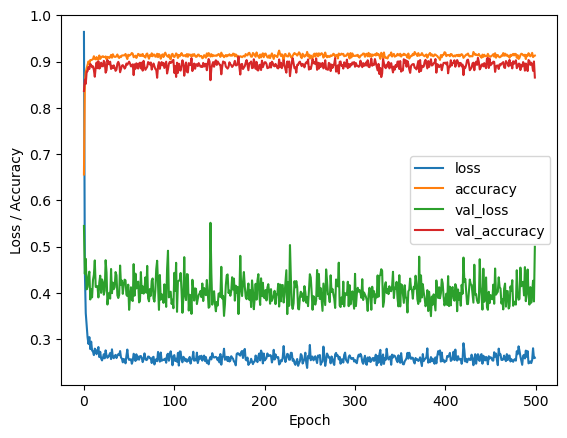

0.8654945054945055


KeyboardInterrupt: 

In [161]:
#Q7 HIDDEN NODES
nodes = [5, 10, 20, 40, 80, 160, 320, 640]
drop = 0.0
act_fun = 'relu'
out_act_fun = 'softmax'
lr_rate = 0.05
epochs = 500
minibatch_size = 50
plot_sum = True
plot_trn = False
plot_val = False
plot_tst = False

for node in nodes:
    for run in range(2):
        acc_trn, acc_val, acc_tst = Q7([node], drop, act_fun, out_act_fun, lr_rate, epochs, minibatch_size, plot_sum, plot_trn, plot_val, plot_tst)
        q7a = q7a.append({"model": node, "act": act_fun, "outact": out_act_fun, "lr_rate": lr_rate, "batch": minibatch_size, "epochs": epochs, "drop": drop, "run": run + 1, "acc_trn": round(acc_trn,3), "acc_val": round(acc_val,3), "acc_tst": round(acc_tst,3)}, ignore_index=True)
        print(acc_val)

Model: "model_255"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 12)]              0         
                                                                 
 dense_510 (Dense)           (None, 80)                1040      
                                                                 
 dropout_255 (Dropout)       (None, 80)                0         
                                                                 
 dense_511 (Dense)           (None, 9)                 729       
                                                                 
Total params: 1,769
Trainable params: 1,769
Non-trainable params: 0
_________________________________________________________________


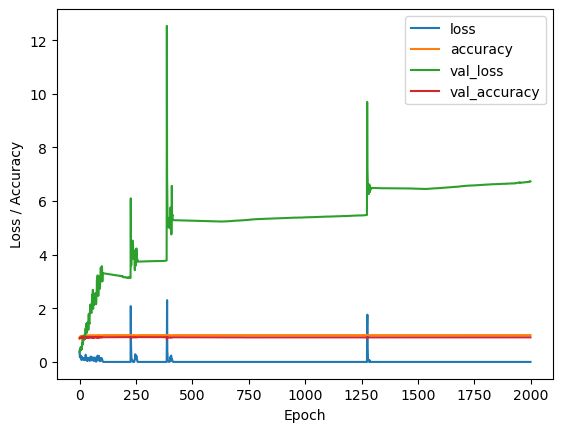


 ########## Result for Training data ########## 

log_loss:    0.0000
accuracy:    1.0000 

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       542
     class 2       1.00      1.00      1.00       465
     class 3       1.00      1.00      1.00       424
     class 4       1.00      1.00      1.00       606
     class 5       1.00      1.00      1.00       397
     class 6       1.00      1.00      1.00       523
     class 7       1.00      1.00      1.00       506
     class 8       1.00      1.00      1.00       377
     class 9       1.00      1.00      1.00       434

    accuracy                           1.00      4274
   macro avg       1.00      1.00      1.00      4274
weighted avg       1.00      1.00      1.00      4274



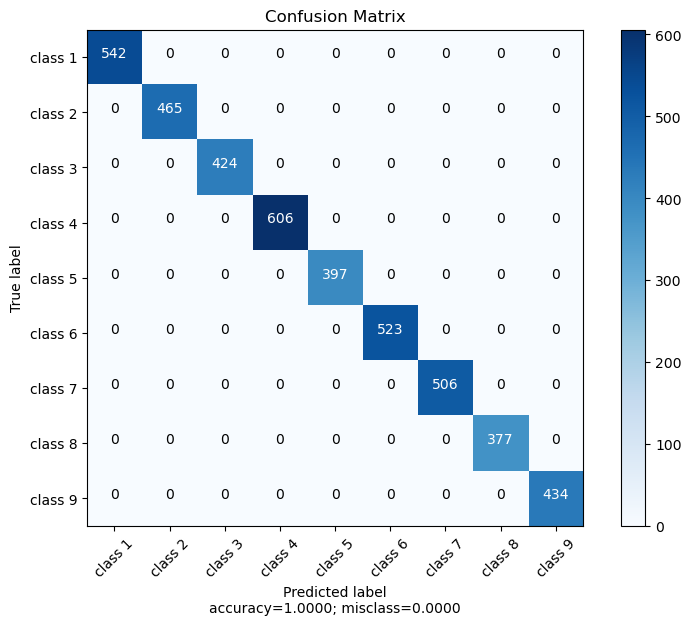


 ########## Result for Validation data ########## 

log_loss:    2.3396
accuracy:    0.9169 

              precision    recall  f1-score   support

     class 1       0.93      0.98      0.95       214
     class 2       0.82      0.89      0.86       203
     class 3       0.92      0.95      0.94       467
     class 4       0.95      0.87      0.91       365
     class 5       0.90      0.97      0.93       158
     class 6       0.97      0.99      0.98       169
     class 7       0.96      0.97      0.97       281
     class 8       0.87      0.78      0.83       264
     class 9       0.88      0.86      0.87       154

    accuracy                           0.92      2275
   macro avg       0.91      0.92      0.91      2275
weighted avg       0.92      0.92      0.92      2275



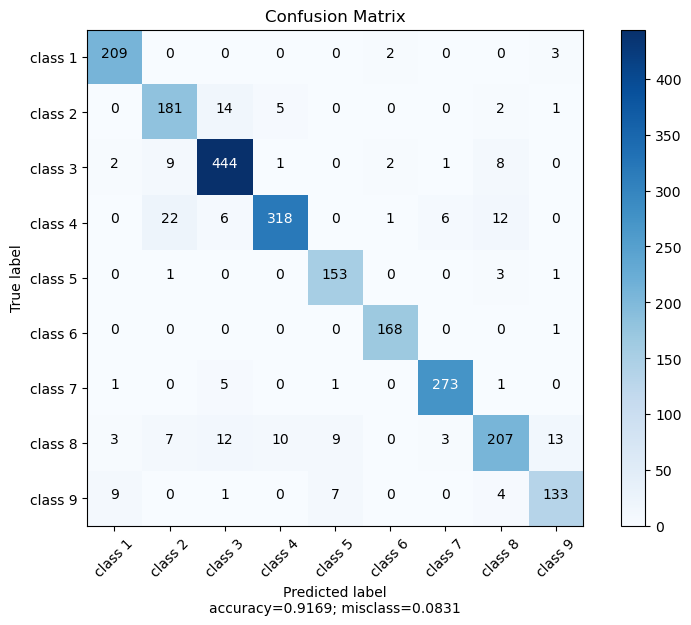


 ########## Result for Test data ########## 

log_loss:    2.1633
accuracy:    0.9194 

              precision    recall  f1-score   support

     class 1       0.94      0.97      0.96       340
     class 2       0.87      0.85      0.86       323
     class 3       0.92      0.93      0.92       723
     class 4       0.95      0.92      0.94       502
     class 5       0.89      0.99      0.94       227
     class 6       0.99      0.99      0.99       271
     class 7       0.98      0.98      0.98       383
     class 8       0.83      0.78      0.81       370
     class 9       0.87      0.87      0.87       273

    accuracy                           0.92      3412
   macro avg       0.92      0.92      0.92      3412
weighted avg       0.92      0.92      0.92      3412



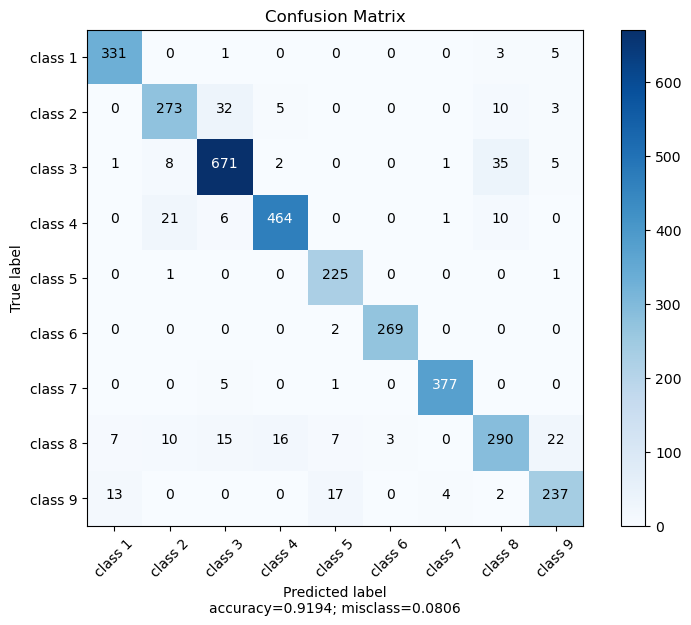

In [162]:
#Q7 PLOT TO INVESTIGATE EARLY STOPING
node = 80
drop = 0.0
act_fun = 'relu'
out_act_fun = 'softmax'
lr_rate = 0.05
epochs = 2000
minibatch_size = 50
plot_sum = True
plot_trn = True
plot_val = True
plot_tst = True

a1,a2,a3 = Q7([node], drop, act_fun, out_act_fun, lr_rate, epochs, minibatch_size, plot_sum, plot_trn, plot_val, plot_tst)

In [9]:
#Q7 DATAFRAME
q7b = {"model": [], "act": [], "outact": [], "lr_rate": [], "batch": [], "epochs": [], "drop": [], "run": [], "acc_trn": [], "acc_val": [], "acc_tst": []}
q7b = pd.DataFrame(q7b)
print(q7b)

Empty DataFrame
Columns: [model, act, outact, lr_rate, batch, epochs, drop, run, acc_trn, acc_val, acc_tst]
Index: []


In [10]:
#Q7 LEARNING RATES
node = 80
drop = 0.0
act_fun = 'relu'
out_act_fun = 'softmax'
lr_rates = [0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 0.16, 0.32, 0.64]
epochs = 500
minibatch_size = 50
plot_sum = False
plot_trn = False
plot_val = False
plot_tst = False

for lr_rate in lr_rates:
    for run in range(2):
        acc_trn, acc_val, acc_tst = Q7([node], drop, act_fun, out_act_fun, lr_rate, epochs, minibatch_size, plot_sum, plot_trn, plot_val, plot_tst)
        q7b = q7b.append({"model": node, "act": act_fun, "outact": out_act_fun, "lr_rate": lr_rate, "batch": minibatch_size, "epochs": epochs, "drop": drop, "run": run + 1, "acc_trn": round(acc_trn,3), "acc_val": round(acc_val,3), "acc_tst": round(acc_tst,3)}, ignore_index=True)
        print(acc_val)

0.9243956043956044
0.9283516483516484
0.9178021978021978
0.9204395604395604
0.9217582417582417
0.9186813186813186
0.8523076923076923
0.8496703296703296
0.4931868131868132
0.3274725274725275
0.09846153846153846
0.24967032967032968
0.8624175824175824
0.8725274725274725
0.5156043956043956
0.48
0.07560439560439561
0.2764835164835165


In [11]:
#Q7 PRINT
print(q7b.to_markdown())

|    |   model | act   | outact   |   lr_rate |   batch |   epochs |   drop |   run |   acc_trn |   acc_val |   acc_tst |
|---:|--------:|:------|:---------|----------:|--------:|---------:|-------:|------:|----------:|----------:|----------:|
|  0 |      80 | relu  | softmax  |     0.025 |      50 |      500 |      0 |     1 |     1     |     0.924 |     0.924 |
|  1 |      80 | relu  | softmax  |     0.025 |      50 |      500 |      0 |     2 |     1     |     0.928 |     0.922 |
|  2 |      80 | relu  | softmax  |     0.05  |      50 |      500 |      0 |     1 |     1     |     0.918 |     0.916 |
|  3 |      80 | relu  | softmax  |     0.05  |      50 |      500 |      0 |     2 |     1     |     0.92  |     0.928 |
|  4 |      80 | relu  | softmax  |     0.1   |      50 |      500 |      0 |     1 |     0.998 |     0.922 |     0.919 |
|  5 |      80 | relu  | softmax  |     0.1   |      50 |      500 |      0 |     2 |     1     |     0.919 |     0.921 |
|  6 |      80 | relu  |

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 80)                1040      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 729       
                                                                 
Total params: 1,769
Trainable params: 1,769
Non-trainable params: 0
_________________________________________________________________


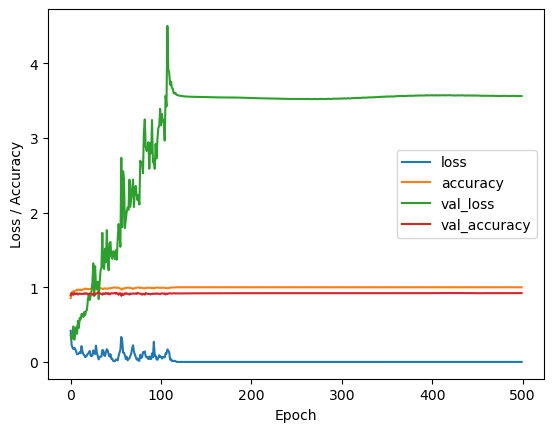


 ########## Result for Training data ########## 

log_loss:    0.0000
accuracy:    1.0000 

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       542
     class 2       1.00      1.00      1.00       465
     class 3       1.00      1.00      1.00       424
     class 4       1.00      1.00      1.00       606
     class 5       1.00      1.00      1.00       397
     class 6       1.00      1.00      1.00       523
     class 7       1.00      1.00      1.00       506
     class 8       1.00      1.00      1.00       377
     class 9       1.00      1.00      1.00       434

    accuracy                           1.00      4274
   macro avg       1.00      1.00      1.00      4274
weighted avg       1.00      1.00      1.00      4274



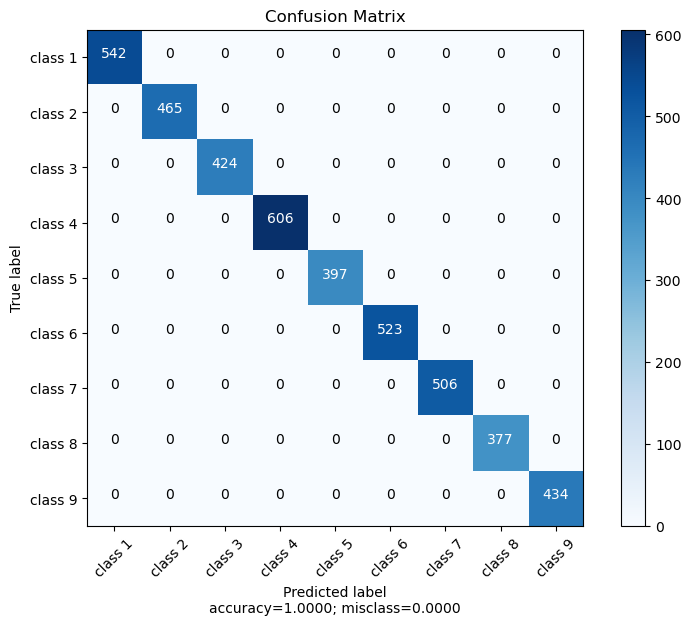


 ########## Result for Validation data ########## 

log_loss:    1.9053
accuracy:    0.9218 

              precision    recall  f1-score   support

     class 1       0.95      0.97      0.96       214
     class 2       0.82      0.86      0.84       203
     class 3       0.93      0.95      0.94       467
     class 4       0.95      0.90      0.93       365
     class 5       0.94      0.95      0.94       158
     class 6       0.98      1.00      0.99       169
     class 7       0.97      0.94      0.95       281
     class 8       0.87      0.82      0.85       264
     class 9       0.86      0.93      0.89       154

    accuracy                           0.92      2275
   macro avg       0.92      0.92      0.92      2275
weighted avg       0.92      0.92      0.92      2275



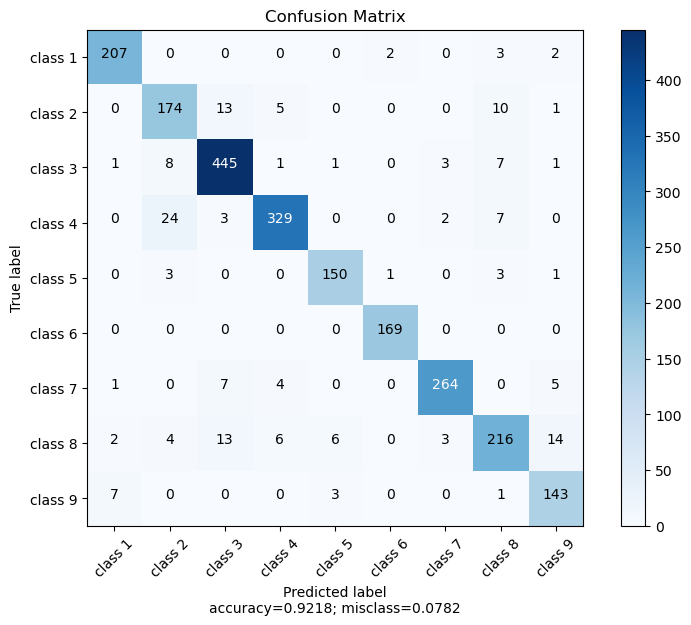


 ########## Result for Test data ########## 

log_loss:    1.8245
accuracy:    0.9203 

              precision    recall  f1-score   support

     class 1       0.95      0.96      0.95       340
     class 2       0.90      0.86      0.88       323
     class 3       0.91      0.94      0.92       723
     class 4       0.96      0.93      0.94       502
     class 5       0.89      0.97      0.93       227
     class 6       0.98      0.99      0.98       271
     class 7       0.98      0.96      0.97       383
     class 8       0.84      0.80      0.82       370
     class 9       0.87      0.88      0.88       273

    accuracy                           0.92      3412
   macro avg       0.92      0.92      0.92      3412
weighted avg       0.92      0.92      0.92      3412



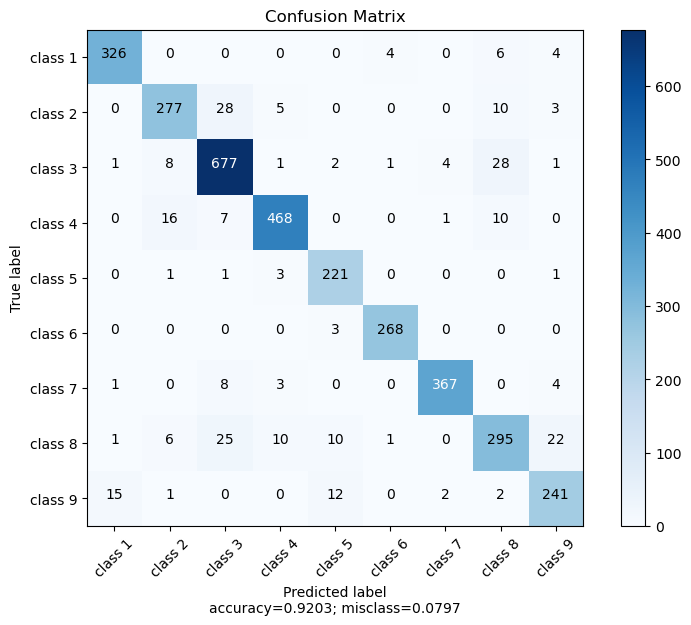

In [10]:
#Q7 FINAL MODEL
node = 80
drop = 0.0
act_fun = 'relu'
out_act_fun = 'softmax'
lr_rate = 0.05
epochs = 500
minibatch_size = 50
plot_sum = True
plot_trn = True
plot_val = True
plot_tst = True

a1,a2,a3 = Q7([node], drop, act_fun, out_act_fun, lr_rate, epochs, minibatch_size, plot_sum, plot_trn, plot_val, plot_tst)

### CellName: Ex4 (#11)
### CellType: Exercise
### Cell instruction: Instruction for question 9

For this exercise you are given a classification problem with a fixed training and test dataset. The data is the Bioconcentraion dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We do not provide any python code for this question, only the small part that reads the data (next code cell).

#### Question 9, create MLP for multi-class problem
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.** For this classification task there are not so many cases of class 2. In the training data there is: class 1: 345 cases, class 2: 48 cases, and class 3: 191 cases. One can end upp with situations that the network does not at all learn how to detect cases of class 2. **(b) What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?**  

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
Since there is no defined validation data set you need to split your original training data into training and validation data. You can use *sklearn.model_selection.train_test_split* or *sklearn.model_selection.KFold* to accomplish that, where the latter method does k-fold crossvalidation splits.

**Hint 3:** 
This problem is a 3-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

The data was randomly split into a training set of 584 compounds (75%) and a test set of 195 compounds (25%), preserving the proportion between the classes. The independent variables consist of 9 molecular descriptors. This is, in summary, a 3-class classification problem with 9 input values for each case.

In [8]:
%%time

def Q9(n_nod, drop_nod, act_fun, out_act_fun, lr_rate, number_epochs, minibatch_size, num_out, plot_sum, plot_trn, plot_val, plot_tst, plot_report_val):
    # seed = 0 means random, seed > 0 means fixed
    seed = 3
    np.random.seed(seed) if seed else None

    # Load Bioconcentration data. The dataset is already split into test and training 75%/25 = 584/195 patterns
    # Each pattern has 9 inputs and one label (1/2/3).
    x_trn_0, d_trn_0, x_tst, d_tst = bcf()
    
    #Of the training set, 33% is put aside for validation, with stratify to keep proportions.
    x_trn, x_val, d_trn, d_val = train_test_split(x_trn_0, d_trn_0, test_size=0.33, random_state=42, stratify = d_trn_0)

    # x_trn_0.shape = 584 rows, 9 columns
    # d_trn_0.shape = 584 rows, 3 columns
    # x_trn.shape = 391 rows, 9 columns
    # d_trn.shape = 391 rows, 3 columns
    # x_val.shape = 193 rows, 9 columns
    # d_val.shape = 193 rows, 3 columns
    # x_tst.shape = 195 rows, 9 columns
    # d_tst.shape = 195 rows, 3 columns
    
    #Normalization of input data to zero mean and std deviation
    x_trn = (x_trn - np.mean(x_trn)) / np.std(x_trn)
    x_tst = (x_tst - np.mean(x_tst)) / np.std(x_tst)
    
    #Definition of MLP
    # MLP
    INPUT = {'inp_dim': x_trn.shape[1],         # same input as test data (12)
             'n_nod': n_nod,                    # architecture
             'drop_nod': drop_nod,              # dropout specification
             'act_fun': act_fun,                 # activation functions for the hidden layer
             'out_act_fun': out_act_fun,          # output activation function for classification
             'opt_method': 'Adam',              # minimization method
             'cost_fun': 'categorical_crossentropy', # error function for classification
             'lr_rate': lr_rate,                # learning rate
             'metric': 'accuracy', 
             'num_out' : num_out }
    
    # Get the model
    model_9 = mlp(**INPUT)

    # Train the model
    estimator_9 = model_9.fit(x_trn, d_trn,
                          validation_data=(x_val, d_val),
                          epochs=number_epochs,
                          batch_size=minibatch_size,
                          verbose=0)

    if plot_sum:
        # Print a summary of the model
        model_9.summary()

        # Plot the learning curves
        plt.figure()
        plt.ylabel('Loss / Accuracy')
        plt.xlabel('Epoch')
        for k in estimator_9.history.keys():
            plt.plot(estimator_9.history[k], label = k) 
        plt.legend()
        plt.show()

    # plot the confusion matrix for trn, val or tst.
    if plot_trn:
        make_cm_plot(model_9, x_trn, d_trn, num_out, 'Training data')
    if plot_val:
        make_cm_plot(model_9, x_val, d_val, num_out, 'Validation data')
    if plot_tst:
        make_cm_plot(model_9, x_tst, d_tst, num_out, 'Test data')
    if plot_report_val:    
        #trying to get to F1 number smoothly
        y = model_9.predict(x_val, verbose=0)
        d_class = d_val.argmax(axis=1)
        y_class = y.argmax(axis=1)
        class_names = ['class {}'.format(i+1) for i in range(num_out)]
        print(classification_report(d_class, y_class, target_names=class_names))

Wall time: 0 ns


### n_nod: [ 64 ] run:  0  ###
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 9)]               0         
                                                                 
 dense_40 (Dense)            (None, 64)                640       
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 3)                 195       
                                                                 
Total params: 835
Trainable params: 835
Non-trainable params: 0
_________________________________________________________________


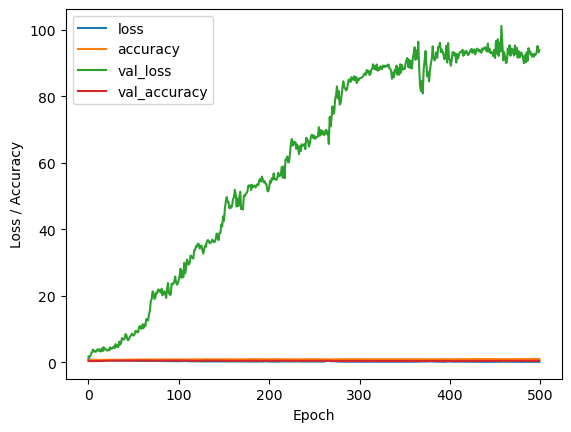


 ########## Result for Training data ########## 

log_loss:    0.1039
accuracy:    0.9719 

              precision    recall  f1-score   support

     class 1       0.97      0.98      0.98       231
     class 2       1.00      1.00      1.00        32
     class 3       0.96      0.95      0.96       128

    accuracy                           0.97       391
   macro avg       0.98      0.98      0.98       391
weighted avg       0.97      0.97      0.97       391



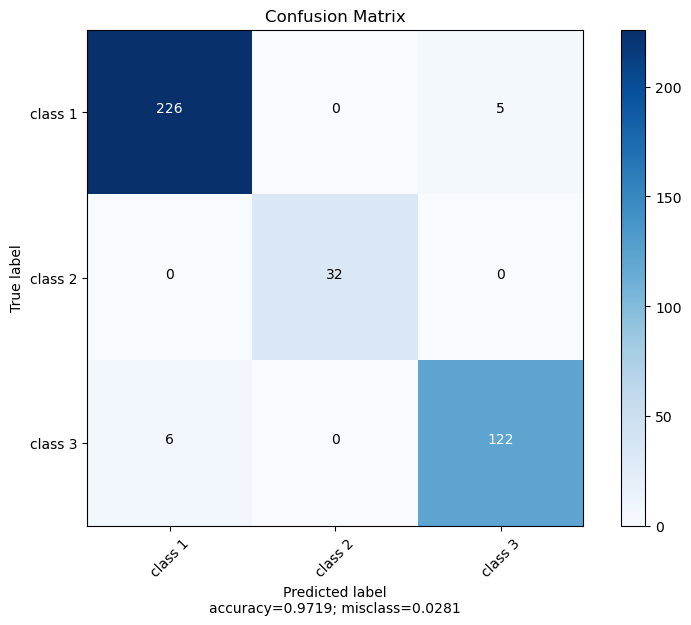


 ########## Result for Validation data ########## 

log_loss:    18.1275
accuracy:    0.4404 

              precision    recall  f1-score   support

     class 1       0.81      0.23      0.36       114
     class 2       0.00      0.00      0.00        16
     class 3       0.37      0.94      0.53        63

    accuracy                           0.44       193
   macro avg       0.39      0.39      0.29       193
weighted avg       0.60      0.44      0.38       193



C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


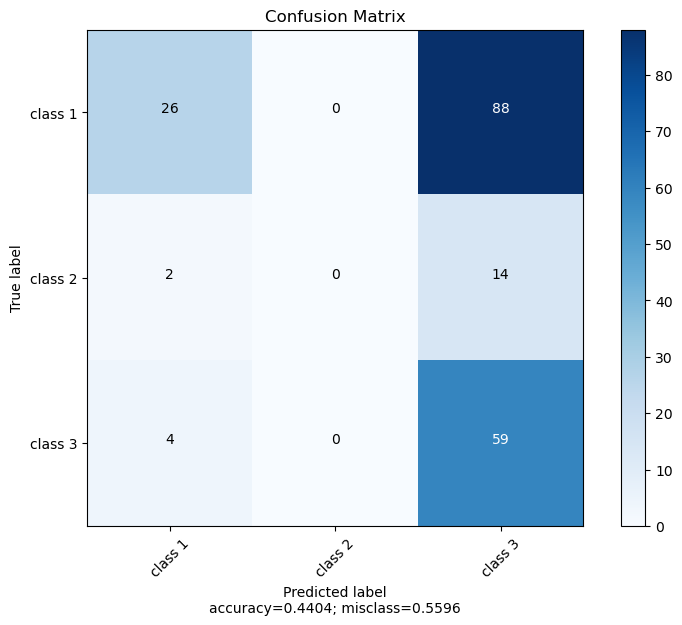

### n_nod: [ 64 ] run:  1  ###
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 9)]               0         
                                                                 
 dense_42 (Dense)            (None, 64)                640       
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 3)                 195       
                                                                 
Total params: 835
Trainable params: 835
Non-trainable params: 0
_________________________________________________________________


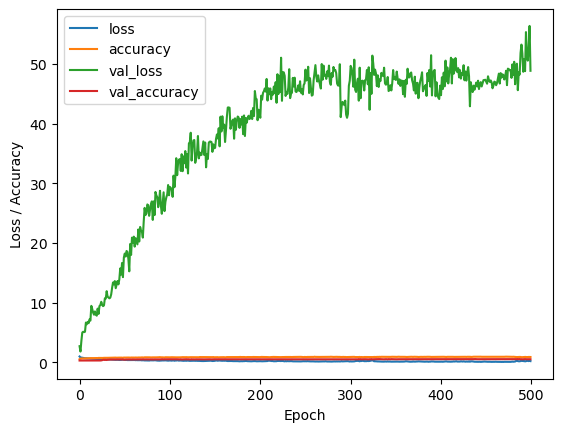


 ########## Result for Training data ########## 

log_loss:    0.2181
accuracy:    0.9284 

              precision    recall  f1-score   support

     class 1       0.92      0.97      0.94       231
     class 2       1.00      1.00      1.00        32
     class 3       0.93      0.84      0.89       128

    accuracy                           0.93       391
   macro avg       0.95      0.94      0.94       391
weighted avg       0.93      0.93      0.93       391



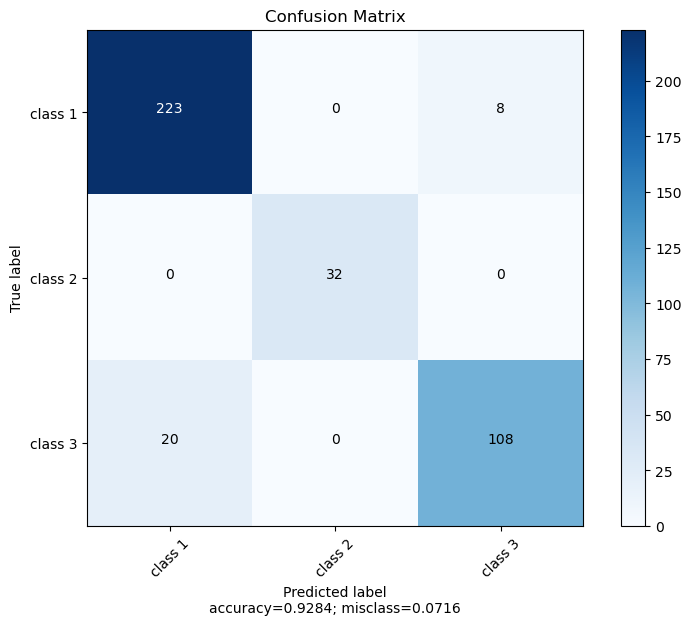


 ########## Result for Validation data ########## 

log_loss:    14.3813
accuracy:    0.5440 

              precision    recall  f1-score   support

     class 1       0.77      0.47      0.59       114
     class 2       0.00      0.00      0.00        16
     class 3       0.41      0.81      0.55        63

    accuracy                           0.54       193
   macro avg       0.40      0.43      0.38       193
weighted avg       0.59      0.54      0.53       193



C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


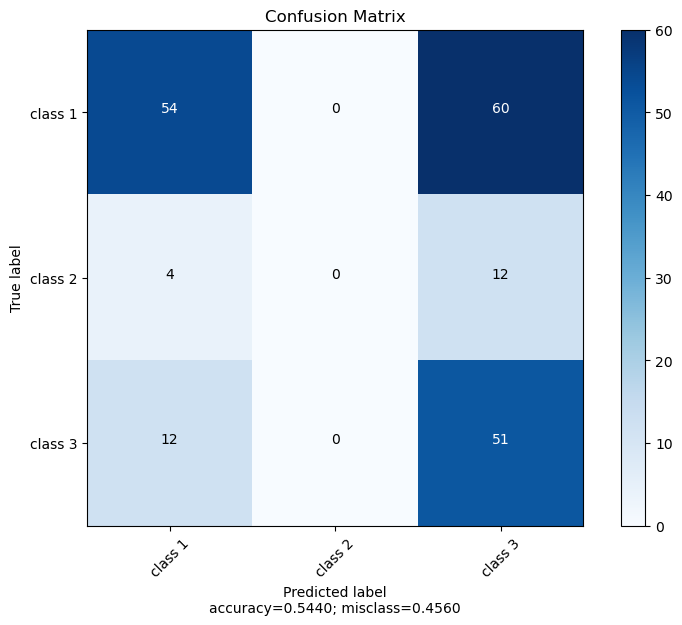

### n_nod: [ 64 ] run:  2  ###
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 9)]               0         
                                                                 
 dense_44 (Dense)            (None, 64)                640       
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 3)                 195       
                                                                 
Total params: 835
Trainable params: 835
Non-trainable params: 0
_________________________________________________________________


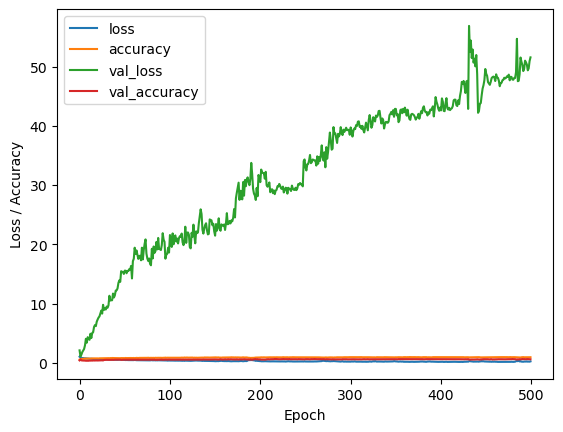


 ########## Result for Training data ########## 

log_loss:    0.1470
accuracy:    0.9412 

              precision    recall  f1-score   support

     class 1       0.96      0.94      0.95       231
     class 2       0.97      1.00      0.98        32
     class 3       0.90      0.93      0.92       128

    accuracy                           0.94       391
   macro avg       0.94      0.96      0.95       391
weighted avg       0.94      0.94      0.94       391



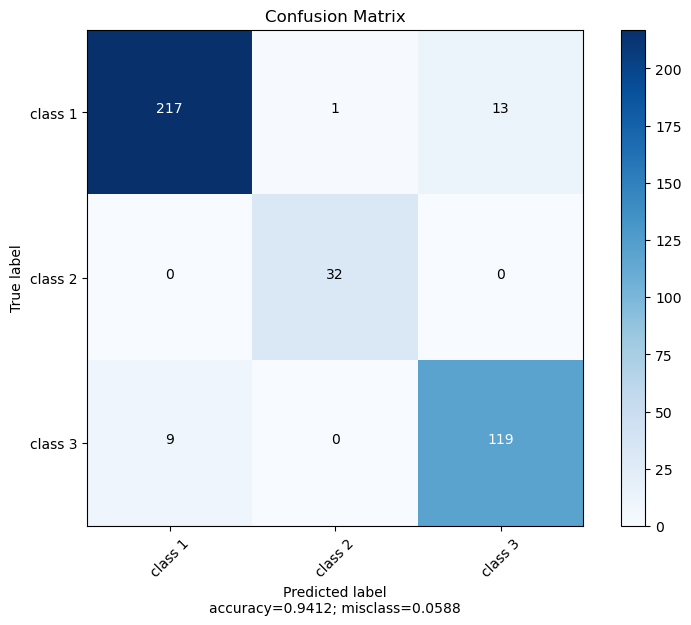


 ########## Result for Validation data ########## 

log_loss:    12.4515
accuracy:    0.5855 

              precision    recall  f1-score   support

     class 1       0.76      0.57      0.65       114
     class 2       0.00      0.00      0.00        16
     class 3       0.47      0.76      0.58        63

    accuracy                           0.59       193
   macro avg       0.41      0.44      0.41       193
weighted avg       0.60      0.59      0.57       193



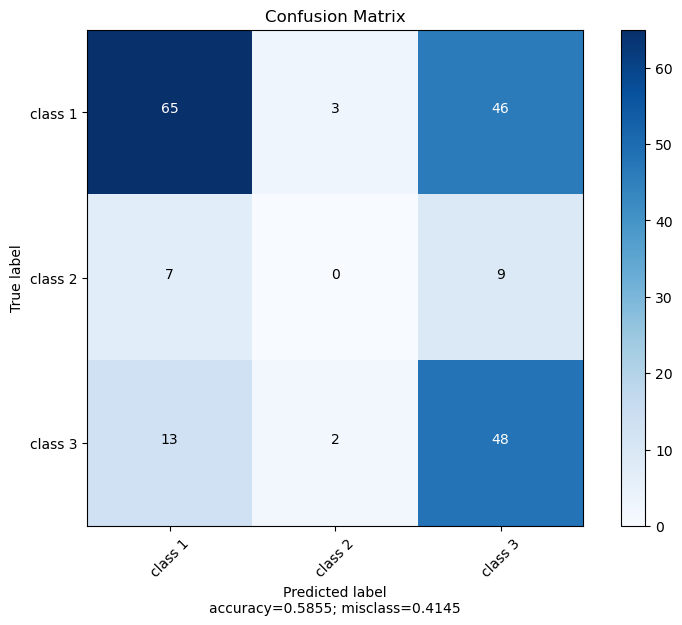

### n_nod: [ 128 ] run:  0  ###
Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 9)]               0         
                                                                 
 dense_46 (Dense)            (None, 128)               1280      
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,667
Trainable params: 1,667
Non-trainable params: 0
_________________________________________________________________


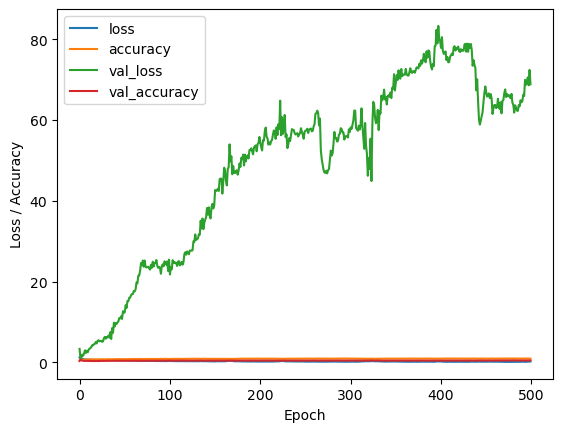


 ########## Result for Training data ########## 

log_loss:    0.1534
accuracy:    0.9488 

              precision    recall  f1-score   support

     class 1       0.94      0.97      0.96       231
     class 2       1.00      0.91      0.95        32
     class 3       0.95      0.91      0.93       128

    accuracy                           0.95       391
   macro avg       0.96      0.93      0.95       391
weighted avg       0.95      0.95      0.95       391



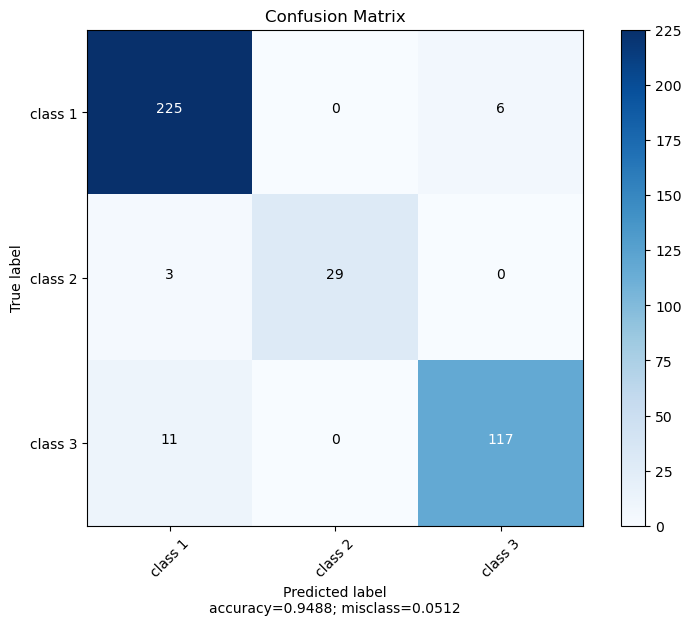


 ########## Result for Validation data ########## 

log_loss:    16.0915
accuracy:    0.4715 

              precision    recall  f1-score   support

     class 1       0.77      0.32      0.45       114
     class 2       0.00      0.00      0.00        16
     class 3       0.38      0.87      0.53        63

    accuracy                           0.47       193
   macro avg       0.38      0.40      0.32       193
weighted avg       0.58      0.47      0.44       193



C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


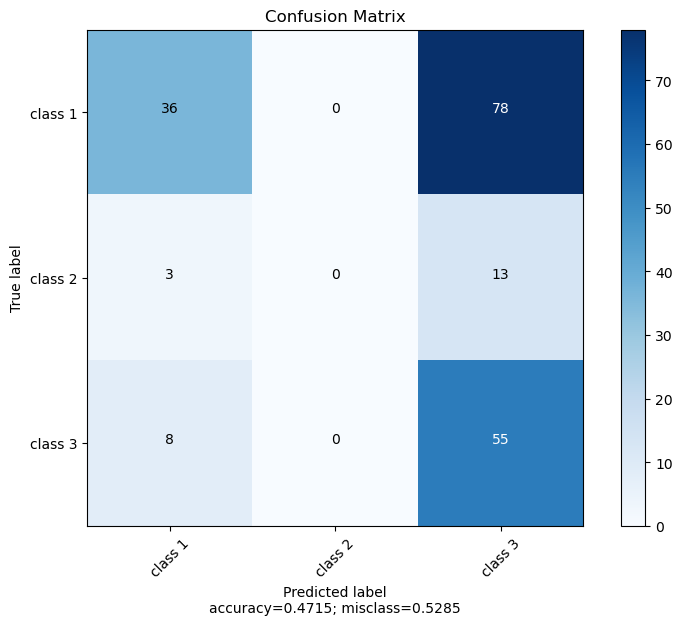

### n_nod: [ 128 ] run:  1  ###
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 9)]               0         
                                                                 
 dense_48 (Dense)            (None, 128)               1280      
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,667
Trainable params: 1,667
Non-trainable params: 0
_________________________________________________________________


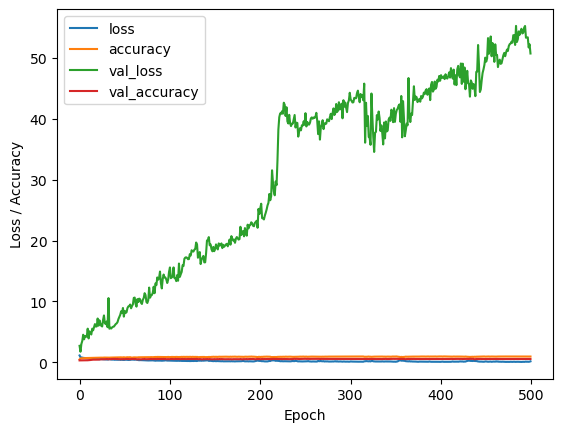


 ########## Result for Training data ########## 

log_loss:    0.1137
accuracy:    0.9591 

              precision    recall  f1-score   support

     class 1       0.98      0.95      0.96       231
     class 2       1.00      1.00      1.00        32
     class 3       0.91      0.97      0.94       128

    accuracy                           0.96       391
   macro avg       0.96      0.97      0.97       391
weighted avg       0.96      0.96      0.96       391



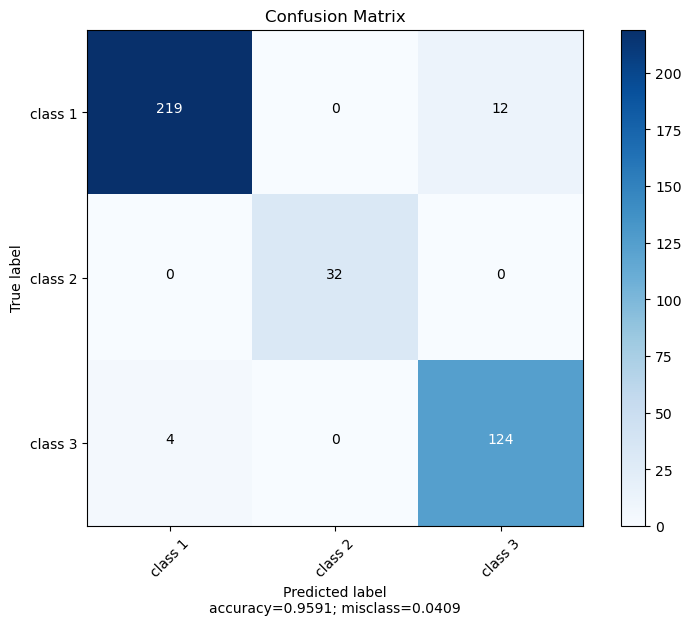


 ########## Result for Validation data ########## 

log_loss:    13.5170
accuracy:    0.5596 

              precision    recall  f1-score   support

     class 1       0.61      0.82      0.70       114
     class 2       0.00      0.00      0.00        16
     class 3       0.36      0.22      0.27        63

    accuracy                           0.56       193
   macro avg       0.32      0.35      0.33       193
weighted avg       0.48      0.56      0.50       193



C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


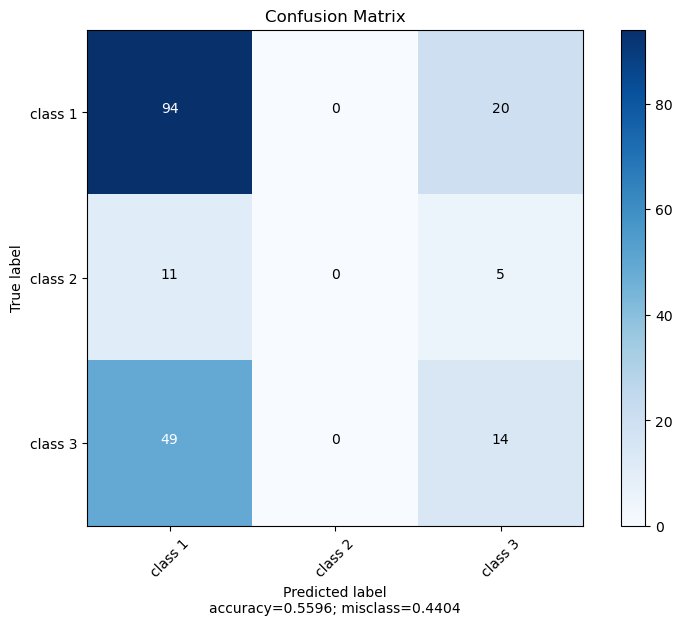

### n_nod: [ 128 ] run:  2  ###
Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 9)]               0         
                                                                 
 dense_50 (Dense)            (None, 128)               1280      
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,667
Trainable params: 1,667
Non-trainable params: 0
_________________________________________________________________


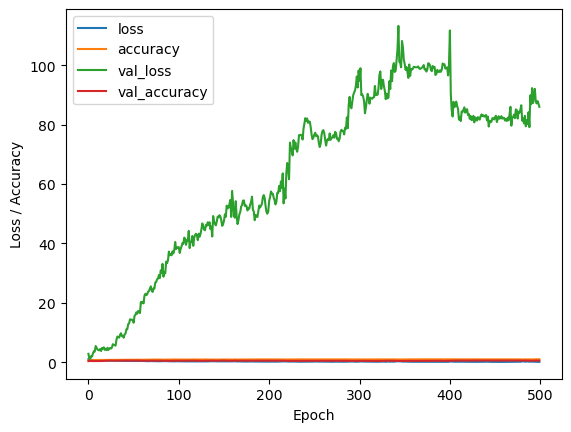


 ########## Result for Training data ########## 

log_loss:    0.1086
accuracy:    0.9565 

              precision    recall  f1-score   support

     class 1       0.95      0.97      0.96       231
     class 2       1.00      1.00      1.00        32
     class 3       0.95      0.91      0.93       128

    accuracy                           0.96       391
   macro avg       0.97      0.96      0.97       391
weighted avg       0.96      0.96      0.96       391



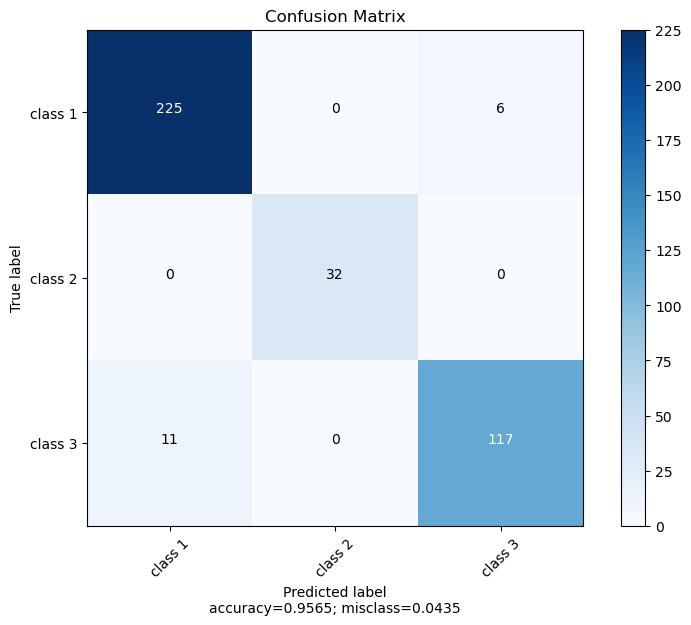


 ########## Result for Validation data ########## 

log_loss:    14.8077
accuracy:    0.5389 

              precision    recall  f1-score   support

     class 1       0.81      0.40      0.54       114
     class 2       0.26      0.38      0.31        16
     class 3       0.46      0.83      0.59        63

    accuracy                           0.54       193
   macro avg       0.51      0.53      0.48       193
weighted avg       0.65      0.54      0.54       193



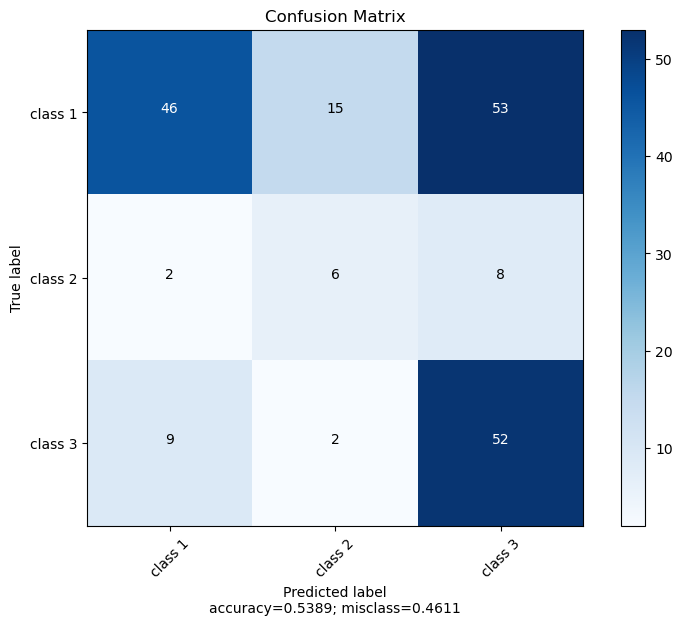

In [12]:
n_nods = [64,128]
drop_nod = 0.0
act_fun = 'relu'
out_act_fun = 'softmax'
lr_rate = 0.05
number_epochs = 500
minibatch_size = 100
num_out = 3
plot_sum = True
plot_trn = True
plot_val = True
plot_tst = False
plot_report_val = False
for n_nod in n_nods:
    for run in range(3):
        print('### n_nod: [', n_nod, '] run: ', run, ' ###')
        model = Q9([n_nod], drop_nod, act_fun, out_act_fun, lr_rate, number_epochs, minibatch_size, num_out, plot_sum, plot_trn, plot_val, plot_tst, plot_report_val)


### CellName: Ex5 (#12)
### CellType: Exercise
### Cell instruction: Instruction for question 10

For this exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test or validation data) with a model that is *as small as possible* in terms of the number of trainable parameters. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try! The data is randomly generated and we suggest using at least 1000 data points to get "good" spirals.

#### Question 10, minimize network size
**Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.**

In [17]:
%%time

def Q10(n_nod):
    # seed = 0 means random, seed > 0 means fixed
    seed = 3
    np.random.seed(seed) if seed else None

    # Generate training data
    x_trn, d_trn = twospirals(1500, 3, 0)

    mu, std = standard(x_trn)
    x_trn = (x_trn - mu)/std

    #### 
    # Define the network, cost function and training settings
    INPUT = {'inp_dim': x_trn.shape[1],
             'n_nod': n_nod,
             'drop_nod': 0.0,
             'act_fun': 'tanh',
             'out_act_fun': 'sigmoid',
             'opt_method': 'Adam',
             'cost_fun': 'binary_crossentropy',
             'lr_rate': 0.01,
             'num_out' : 1 }
    number_epochs = 2000
    minibatch_size = 100
    ####    

    # Get the model
    model_ex6 = mlp(**INPUT)

    # Print a summary of the model
    model_ex6.summary()

    # Train the model
    estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                          epochs=number_epochs,
                          batch_size=minibatch_size,
                          verbose=0)

    # Call the stats function to print out statistics for the training
    stats_class(x_trn, d_trn, 'Training', model_ex6)

    # Training history
    plt.figure()
    plt.ylabel('Loss / Accuracy')
    plt.xlabel('epoch')
    for k in estimator_ex6.history.keys():
        plt.plot(estimator_ex6.history[k], label = k) 
    plt.legend(loc='best')

    # Show the decision boundary
    decision_b(x_trn, d_trn, model_ex6)
    
    My tests were
    [64,128,256,512,1024,2048]
    [512,64] - performed well!
    [512,512,512] - half a million weights
    

Wall time: 0 ns


Model: "model_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_79 (Dense)            (None, 256)               768       
                                                                 
 dropout_42 (Dropout)        (None, 256)               0         
                                                                 
 dense_80 (Dense)            (None, 128)               32896     
                                                                 
 dropout_43 (Dropout)        (None, 128)               0         
                                                                 
 dense_81 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33,793
Trainable params: 33,793
Non-trainabl

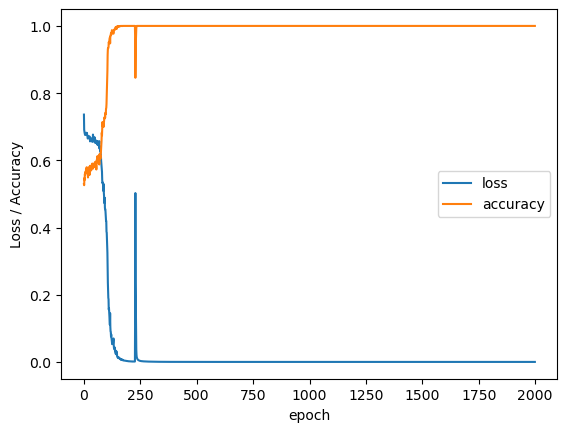

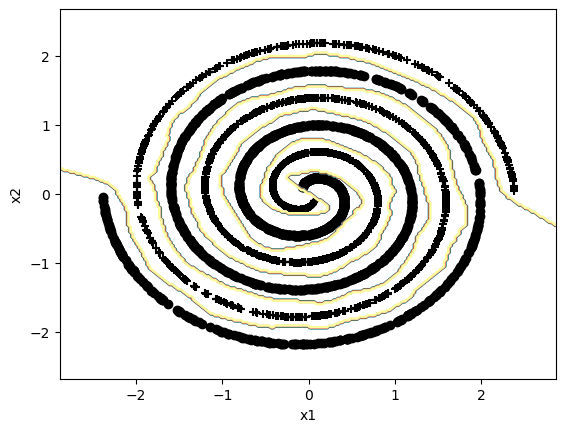

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_82 (Dense)            (None, 128)               384       
                                                                 
 dropout_44 (Dropout)        (None, 128)               0         
                                                                 
 dense_83 (Dense)            (None, 128)               16512     
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_84 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainabl

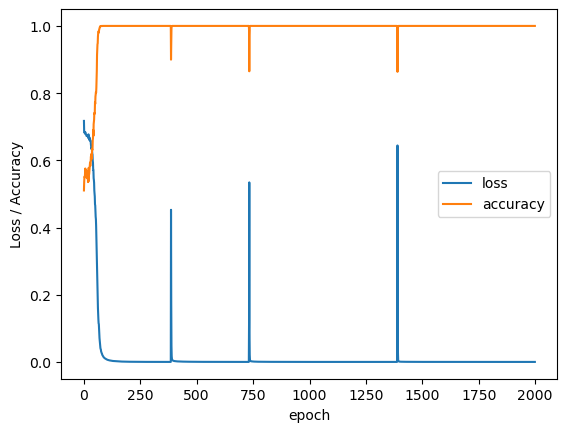

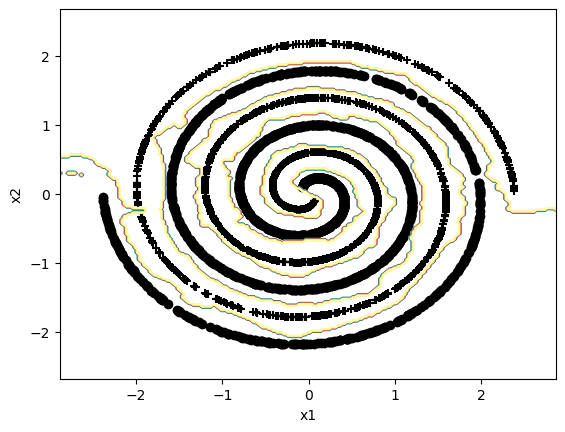

In [23]:
#n_nods = [2048]
#for n_nod in n_nods:
Q10([256, 128])
Q10([128,128])


# The report!
NOTE: This is a late hand in. I underestimated the difficulty of Q7-Q10 and did not give myself enough time to complete the lab, spending way too much time playing with pandas on Q1-Q4.

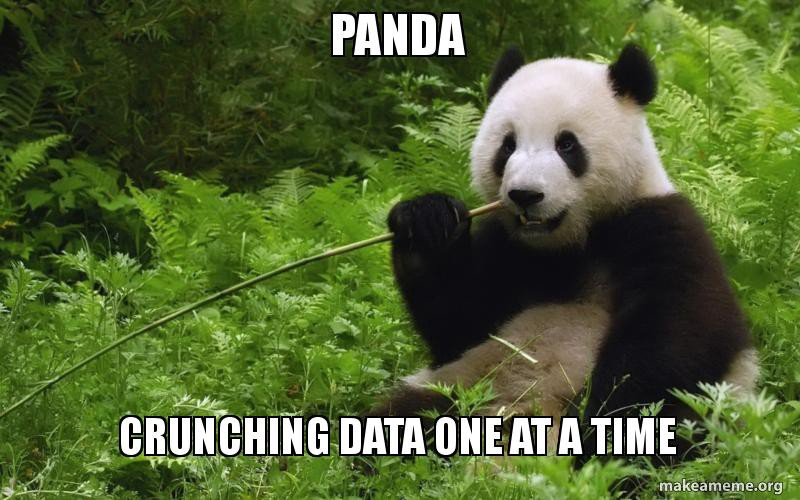

## Joel Bengs
jo5531be-s@student.lu.se

## Introduction
In this laboration, the purpose is to familiarise with the concepts of
1. Different performance measures, primarly accuracy.
2. Generalization of binary classification (Q1-Q3), regression (Q4-Q6) and multi-category classification (Q7)
3. Different methods to reduce overtraining, including L2 regularization and dropout
4. Model selection criterias
5. ...and as always, to gain experience in python, pandas, tensorflow and keras!

## Answers to questions

#### Question 1, single-node validation performance
What is the performance you get on the validation dataset?

With a linear MLP, the classification problem could be solved with an avarage of 85% accuracy on the training data. 10 models were trained, all with the same hyper parameters (learning rate 0.05, minibatch size 25 and 500 epochs), as presented in Table 1.

_Table 1: linear MLPs_

|run |   acc_trn |
|---:|----------:|
|  1 |      0.86 |
|  2 |      0.84 |
|  3 |      0.84 |
|  4 |      0.85 |
|  5 |      0.85 |
|  6 |      0.86 |
|  7 |      0.85 |
|  8 |      0.84 |
|  9 |      0.84 |
|  10|      0.85 |
Mean accuracy of all models:  0.849

#### Question 2, improving training performance
__(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?__<br>

To reach 97% accuracy on the training dataset, 10 nodes was needed, as per Table 2. Taking the randomness of inital weights and batch division into account, it would be informative to avarage a few samples. Therefore the experiment was rerun with a focus on 5, 7 and 10 nodes.

Table 2: Test accuracy for MLPs with one hidden layer of varying size.

| model   |   lr_rate |   batch size |   epochs |   dropout |   run |   acc_trn |   acc_val |
|:--------|----------:|-------------:|---------:|----------:|------:|----------:|----------:|
| [1]     |      0.05 |           25 |      500 |         0 |     1 |      0.85 |     0.87  |
| [2]     |      0.05 |           25 |      500 |         0 |     1 |      0.89 |     0.831 |
| [3]     |      0.05 |           25 |      500 |         0 |     1 |      0.90 |     0.833 |
| [5]     |      0.05 |           25 |      500 |         0 |     1 |      0.92 |     0.834 |
| [10]    |      0.05 |           25 |      500 |         0 |     1 |      0.97 |     0.827 |
| [20]    |      0.05 |           25 |      500 |         0 |     1 |      0.97 |     0.818 |
| [30]    |      0.05 |           25 |      500 |         0 |     1 |      0.97 |     0.816 |
| [50]    |      0.05 |           25 |      500 |         0 |     1 |      0.97 |     0.822 |
| [100]   |      0.05 |           25 |      500 |         0 |     1 |      0.97 |     0.834 |


In Table 3, five models were trained for each MLP design (5, 7 or 10 nodes in one hidden layer). The mean accuracy on the training set was 92.2%, 95.8% and 96.2 % respectively, as per Table 4. With this more thourough investigation, it can be said that a network with 7 hidden nodes in one layer can reach over 95% accuracy in training.

_Table 3: Test accuracy over 5 runs, for MLPs with 5, 7 or 10 hidden nodes in one layer._

|   model |   lr_rate |   batch size |   epochs |   dropout |   run |   acc_trn |   acc_val |
|:-------:|----------:|-------------:|---------:|----------:|------:|----------:|----------:|
|       5 |      0.05 |           25 |      500 |         0 |     0 |      0.92 |     0.841 |
|       5 |      0.05 |           25 |      500 |         0 |     1 |      0.90 |     0.828 |
|       5 |      0.05 |           25 |      500 |         0 |     2 |      0.92 |     0.84  |
|       5 |      0.05 |           25 |      500 |         0 |     3 |      0.94 |     0.836 |
|       5 |      0.05 |           25 |      500 |         0 |     4 |      0.93 |     0.833 |
|       7 |      0.05 |           25 |      500 |         0 |     0 |      0.97 |     0.811 |
|       7 |      0.05 |           25 |      500 |         0 |     1 |      0.96 |     0.824 |
|       7 |      0.05 |           25 |      500 |         0 |     2 |      0.95 |     0.829 |
|       7 |      0.05 |           25 |      500 |         0 |     3 |      0.96 |     0.823 |
|       7 |      0.05 |           25 |      500 |         0 |     4 |      0.95 |     0.832 |
|      10 |      0.05 |           25 |      500 |         0 |     0 |      0.95 |     0.828 |
|      10 |      0.05 |           25 |      500 |         0 |     1 |      0.96 |     0.827 |
|      10 |      0.05 |           25 |      500 |         0 |     2 |      0.98 |     0.803 |
|      10 |      0.05 |           25 |      500 |         0 |     3 |      0.95 |     0.831 |
|      10 |      0.05 |           25 |      500 |         0 |     4 |      0.97 |     0.819 |

_Table 4: Test avarage of performance measures from Table 3._

|                                         Category    |   Performance | 
|:---------------------------------------------------:|--------------:|
| Mean of training accuracy for model with 5 nodes:   | 0.922         |
| Mean of training accuracy for model with 7 nodes:   | 0.958         |
| Mean of training accuracy for model with 10 nodes:  | 0.962         |
| Mean of validation accuracy for model with 5 nodes: | 0.8356        |
| Mean of validation accuracy for model with 7 nodes: | 0.8238        |
| Mean of validation accuracy for model with 10 nodes:| 0.8216        |

__(b) What is the performance on the validation data set?__<br>
The validation accuracy was the highest with a linear MLP. With more nodes, the validation performance dropped as the models got overtrained. The linear MLP had a validation performance of 87%, a performance that no other model could reach. The model with 7 nodes had an avarage of 82% accuracy in validation. This is a sign that the underlying problem truly has a linear dependence on the input variables.


#### Question 3, optimizing validation performance
__(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?__<br>

From Table 2, it is evident that validation performance drops when training performance increases. At 95% training accuracy, validation accuuracy is at 82%. The maximum validation performance is instead obtained with a smaller network with one or perhaps two nodes. To investigate in detail, a set of linear MLPs were compared against a set of MLPs with two nodes according to Table 5a/5b. It is evident that the linear MLP outperforms the more flexible counterpart.

_Table 5a: investigation of validation performance for MLPs with one or two nodes._

|   model |   lr_rate |   batch size |   epochs |   dropout |   run |   acc_trn |   acc_val |
|--------:|----------:|-------------:|---------:|----------:|------:|----------:|----------:|
|       1 |      0.05 |           25 |      500 |         0 |     1 |      0.84 |     0.873 |
|       1 |      0.05 |           25 |      500 |         0 |     2 |      0.84 |     0.872 |
|       1 |      0.05 |           25 |      500 |         0 |     3 |      0.84 |     0.87  |
|       1 |      0.05 |           25 |      500 |         0 |     4 |      0.84 |     0.873 |
|       1 |      0.05 |           25 |      500 |         0 |     5 |      0.84 |     0.873 |
|       2 |      0.05 |           25 |      500 |         0 |     1 |      0.89 |     0.829 |
|       2 |      0.05 |           25 |      500 |         0 |     2 |      0.89 |     0.827 |
|       2 |      0.05 |           25 |      500 |         0 |     3 |      0.88 |     0.832 |
|       2 |      0.05 |           25 |      500 |         0 |     4 |      0.88 |     0.83  |
|       2 |      0.05 |           25 |      500 |         0 |     5 |      0.89 |     0.829 |

_Table 5b: summary of Table 5a._

|   Catgory                                         |acc_val |
|--------------------------------------------------:|-------:|
|Mean of validation accuracy for model with 1 nodes:| 0.8722 |
|Mean of validation accuracy for model with 2 nodes:| 0.8294 |


To reach an even higher performance the hyper parameters must be tuned. 36 networks were trained with learning rates in the range [0.01, 0.025, 0.05, 0.1] and batch_sizes in the range [25,13,10], three of each possible combination. All other parameters were kept constant. The data is presented in Table 6a and the avarage performance measures in Table 6b. The highest performing learning rate is 0.025. Batch size 25 and 13 perform equaly on avarage.

The idea was to reduce these 36 networks into 12 avarages, one avarage for each combination in the matrix of learning rates and batch sizes. This would have reduced the influence of randomness. I could not figure out how to manipulate the dataframes in pandas in the right way, not even with the valuable help from ChatGPT by openAI. To not spend even more time learning pandas (which was fun!) I'm leavning this assignemnt at the following:

The best performing network could reach 87.8% accuracy in validation. It had one hidden node, a learning rate of 0.025 and a batch size of 13.

_Table 6a: 36 linear MLPs with various learning rates and batch sizes._


|   Nodes |   lr_rate |   batch size |   epochs |   dropout |   run |   acc_trn |   acc_val |
|--------:|----------:|-------------:|---------:|----------:|------:|----------:|----------:|
|       1 |     0.01  |           25 |      500 |         0 |     1 |      0.87 |     0.866 |
|       1 |     0.01  |           25 |      500 |         0 |     2 |      0.87 |     0.857 |
|       1 |     0.01  |           25 |      500 |         0 |     3 |      0.84 |     0.869 |
|       1 |     0.01  |           13 |      500 |         0 |     1 |      0.84 |     0.868 |
|       1 |     0.01  |           13 |      500 |         0 |     2 |      0.87 |     0.857 |
|       1 |     0.01  |           13 |      500 |         0 |     3 |      0.84 |     0.869 |
|       1 |     0.01  |           10 |      500 |         0 |     1 |      0.87 |     0.858 |
|       1 |     0.01  |           10 |      500 |         0 |     2 |      0.87 |     0.862 |
|       1 |     0.01  |           10 |      500 |         0 |     3 |      0.84 |     0.873 |
|       1 |     0.025 |           25 |      500 |         0 |     1 |      0.84 |     0.871 |
|       1 |     0.025 |           25 |      500 |         0 |     2 |      0.84 |     0.873 |
|       1 |     0.025 |           25 |      500 |         0 |     3 |      0.84 |     0.871 |
|       1 |     0.025 |           13 |      500 |         0 |     1 |      0.83 |     0.872 |
|       1 |     0.025 |           13 |      500 |         0 |     2 |      0.84 |     0.874 |
|       1 |     0.025 |           13 |      500 |         0 |     3 |      0.86 |  __0.878__|
|       1 |     0.025 |           10 |      500 |         0 |     1 |      0.85 |     0.865 |
|       1 |     0.025 |           10 |      500 |         0 |     2 |      0.84 |     0.868 |
|       1 |     0.025 |           10 |      500 |         0 |     3 |      0.86 |     0.874 |
|       1 |     0.05  |           25 |      500 |         0 |     1 |      0.83 |     0.873 |
|       1 |     0.05  |           25 |      500 |         0 |     2 |      0.85 |     0.873 |
|       1 |     0.05  |           25 |      500 |         0 |     3 |      0.84 |     0.876 |
|       1 |     0.05  |           13 |      500 |         0 |     1 |      0.85 |     0.877 |
|       1 |     0.05  |           13 |      500 |         0 |     2 |      0.85 |     0.866 |
|       1 |     0.05  |           13 |      500 |         0 |     3 |      0.86 |     0.876 |
|       1 |     0.05  |           10 |      500 |         0 |     1 |      0.84 |     0.865 |
|       1 |     0.05  |           10 |      500 |         0 |     2 |      0.86 |     0.866 |
|       1 |     0.05  |           10 |      500 |         0 |     3 |      0.87 |     0.86  |
|       1 |     0.1   |           25 |      500 |         0 |     1 |      0.84 |     0.868 |
|       1 |     0.1   |           25 |      500 |         0 |     2 |      0.87 |     0.862 |
|       1 |     0.1   |           25 |      500 |         0 |     3 |      0.86 |     0.864 |
|       1 |     0.1   |           13 |      500 |         0 |     1 |      0.88 |     0.854 |
|       1 |     0.1   |           13 |      500 |         0 |     2 |      0.86 |     0.866 |
|       1 |     0.1   |           13 |      500 |         0 |     3 |      0.85 |     0.87  |
|       1 |     0.1   |           10 |      500 |         0 |     1 |      0.88 |     0.853 |
|       1 |     0.1   |           10 |      500 |         0 |     2 |      0.87 |     0.86  |
|       1 |     0.1   |           10 |      500 |         0 |     3 |      0.87 |     0.857 |

_Table 6b: summary of Table 6a._

|   Catgory                                         |acc_val |
|--------------------------------------------------:|-------:|
|Mean validation accuracy with learning rate 0.01:  |  0.864 |
|Mean validation accuracy with learning rate 0.025: |  0.872 |
|Mean validation accuracy with learning rate 0.05:  |  0.870 |
|Mean validation accuracy with learning rate 0.1:   |  0.862 |
|Mean validation accuracy with batch_size 25:       |  0.869 |
|Mean validation accuracy with batch_size 13:       |  0.869 |
|Mean validation accuracy with batch_size 10:       |  0.863 |

__(b) Try to give an explanation for the number you obtained.__

From the visual presentations of the dataset, and from the above investigations, it is clear that the underlying problem is linear and thus a linear MLP is superior in validation. All models could find a minimum around 85%-87% validation accuracy. To reach a few extra decimals, fine tuning is needed. A smaller learning rate enables smaller steps needed for fine tuning. I am thus suprised that the learning rate 0.01 did not outperform 0.025. Perhaps more epochs would have been needed.

With respect to batch size, a smaller batch size means earlier convergence and less risk of getting stuck in a local minimum. The introduction of batch sizes also introduced another element of randomness.

#### Question 4, optimizing regression performance
__How many hidden nodes gives the best validation performance?__<br>
Table 7a presents 12 MLPs with all hyperparameters kept constant, but with a varying number of hidden nodes in one hidden layer. A larger network is a more flexible network. Thus, a larger network can overtrain and reach very small losses on the training data (mse_trn < 0.01 for 50 or more nodes). Pearsons correlation coefficient (PCC) for the training dataset increases with a larger network up to its maximum value 1 (note that values have been rounded to two decimal points). The MSE in validation does not have an obvious relationship with the size of the network (0.6 is reached for both 1 and 15 nodes), and neither does PCC for validation.

With respect to validation performance, no conclussion can be drawn. Therefore a few tests were done to decide on a new strategy. Increasing epochs or smaller batch sizes did not improve performance substantially. The test were rerun to rule out unluck in randomnes, see Table 7b. Networks of size 500, 1000 and 5000 were run as per Table 7b, with no improvement.

Reading the hint, a well as question 5 and question 6, it could be guessed that the optimal number of nodes in one layer should be only a handfull and more tests were run on MLPs with few nodes, but __with a new seed__ 3. This seed will be used in the following questions. Three MLPs managed to reach 0.34 MSE in validation, a substantial improvement.

In conclusion, a network with five nodes seem to perform the best with respect to all trials, reaching a MSE of __0.34__ in validation. The corresponding PCC was __0.82__.

__What is the best validation MSE (or correlation coefficient) you got?__

_Table 7a: Trial one of 12 MLPs with various number of nodes, solving reg1._

|   nodes |   lr_rate |   batch |   epochs |   drop |   run |   mse_trn |   mse_val |   pcorr_trn |   pcorr_val |
|--------:|----------:|--------:|---------:|-------:|------:|----------:|----------:|------------:|------------:|
|       1 |     0.025 |      50 |      500 |      0 |     1 |      0.46 |      0.6  |        0.74 |        0.64 |
|       2 |     0.025 |      50 |      500 |      0 |     1 |      0.35 |      0.53 |        0.81 |        0.7  |
|       3 |     0.025 |      50 |      500 |      0 |     1 |      0.4  |      0.79 |        0.78 |        0.53 |
|       4 |     0.025 |      50 |      500 |      0 |     1 |      0.24 |      0.52 |        0.88 |        0.7  |
|       5 |     0.025 |      50 |      500 |      0 |     1 |      0.19 |  __0.46__ |        0.91 |        0.76 |
|       7 |     0.025 |      50 |      500 |      0 |     1 |      0.17 |      0.63 |        0.91 |        0.64 |
|      10 |     0.025 |      50 |      500 |      0 |     1 |      0.12 |      0.53 |        0.94 |        0.72 |
|      15 |     0.025 |      50 |      500 |      0 |     1 |      0.08 |      0.6  |        0.96 |        0.67 |
|      20 |     0.025 |      50 |      500 |      0 |     1 |      0.04 |      0.71 |        0.99 |        0.63 |
|      30 |     0.025 |      50 |      500 |      0 |     1 |      0.03 |      0.84 |        0.98 |        0.61 |
|      50 |     0.025 |      50 |      500 |      0 |     1 |      0.01 |      0.73 |        1    |        0.62 |
|     100 |     0.025 |      50 |      500 |      0 |     1 |      0.01 |      0.75 |        1    |        0.64 |

_Table 7b: Trial two of 13 MLPs with various number of nodes, solving reg1._

|   nodes |   lr_rate |   batch |   epochs |   drop |   run |   mse_trn |   mse_val |   pcorr_trn |   pcorr_val |
|--------:|----------:|--------:|---------:|-------:|------:|----------:|----------:|------------:|------------:|
|       1 |     0.025 |      50 |      500 |      0 |     1 |      0.46 |      0.6  |        0.74 |        0.64 |
|       2 |     0.025 |      50 |      500 |      0 |     1 |      0.35 |      0.53 |        0.81 |        0.7  |
|       3 |     0.025 |      50 |      500 |      0 |     1 |      0.28 |      0.56 |        0.85 |        0.67 |
|       4 |     0.025 |      50 |      500 |      0 |     1 |      0.24 |      0.47 |        0.88 |        0.74 |
|       5 |     0.025 |      50 |      500 |      0 |     1 |      0.19 |      0.45 |        0.91 |        0.76 |
|       6 |     0.025 |      50 |      500 |      0 |     1 |      0.17 |  __0.42__ |        0.91 |        0.77 |
|       8 |     0.025 |      50 |      500 |      0 |     1 |      0.15 |      0.49 |        0.93 |        0.74 |
|      10 |     0.025 |      50 |      500 |      0 |     1 |      0.12 |      0.45 |        0.94 |        0.76 |
|      50 |     0.025 |      50 |      500 |      0 |     1 |      0.01 |      0.73 |        1    |        0.64 |
|     100 |     0.025 |      50 |      500 |      0 |     1 |      0.01 |      0.76 |        1    |        0.63 |
|     500 |     0.025 |      50 |      500 |      0 |     1 |      0.06 |      0.63 |        0.97 |        0.66 |
|    1000 |     0.025 |      50 |      500 |      0 |     1 |      0.03 |      0.65 |        0.98 |        0.68 |
|    5000 |     0.025 |      50 |      500 |      0 |     1 |      0.07 |      0.54 |        0.97 |        0.72 |

_Table 7c: Trial three of 18 MLPs with various number of nodes and two runs for each design, solving reg1._

|   nodes |   lr_rate |   batch |   epochs |   drop |   run |   mse_trn |   mse_val |   pcorr_trn |   pcorr_val |
|--------:|----------:|--------:|---------:|-------:|------:|----------:|----------:|------------:|------------:|
|       1 |     0.025 |      50 |      500 |      0 |     1 |      0.45 |      0.49 |        0.76 |        0.72 |
|       1 |     0.025 |      50 |      500 |      0 |     2 |      0.44 |      0.49 |        0.75 |        0.72 |
|       2 |     0.025 |      50 |      500 |      0 |     1 |      0.32 |      0.39 |        0.83 |        0.79 |
|       2 |     0.025 |      50 |      500 |      0 |     2 |      0.31 |      0.42 |        0.83 |        0.76 |
|       3 |     0.025 |      50 |      500 |      0 |     1 |      0.24 |  __0.34__ |        0.88 |    __0.82__ |
|       3 |     0.025 |      50 |      500 |      0 |     2 |      0.24 |  __0.34__ |        0.88 |    __0.81__ |
|       4 |     0.025 |      50 |      500 |      0 |     1 |      0.22 |      0.4  |        0.89 |        0.78 |
|       4 |     0.025 |      50 |      500 |      0 |     2 |      0.22 |      0.37 |        0.89 |        0.8  |
|       5 |     0.025 |      50 |      500 |      0 |     1 |      0.2  |  __0.34__ |        0.9  |    __0.82__ |
|       5 |     0.025 |      50 |      500 |      0 |     2 |      0.19 |      0.37 |        0.9  |        0.8  |
|       6 |     0.025 |      50 |      500 |      0 |     1 |      0.18 |      0.39 |        0.91 |        0.8  |
|       6 |     0.025 |      50 |      500 |      0 |     2 |      0.18 |      0.42 |        0.91 |        0.77 |
|       8 |     0.025 |      50 |      500 |      0 |     1 |      0.15 |      0.4  |        0.92 |        0.78 |
|       8 |     0.025 |      50 |      500 |      0 |     2 |      0.14 |      0.41 |        0.93 |        0.78 |
|      10 |     0.025 |      50 |      500 |      0 |     1 |      0.12 |      0.55 |        0.94 |        0.7  |
|      10 |     0.025 |      50 |      500 |      0 |     2 |      0.12 |      0.35 |        0.94 |        0.81 |
|      50 |     0.025 |      50 |      500 |      0 |     1 |      0.02 |      0.75 |        0.99 |        0.65 |
|      50 |     0.025 |      50 |      500 |      0 |     2 |      0.01 |      0.79 |        1    |        0.65 |

#### Question 5, improving generalization with regularization
__(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.<br>
(b) Do you obtain a better result compared to Q4?__

L2 regularization is designed to reduce overtraining by suppressing large weights. Table 8 presents seven MLP designs with various level of L2 regularization (from 0.03 to 30) and three runs for each design, solving reg1. All had ten hidden nodes in one hidden layer.

Oddly, the performance on validation decreased with more L2 regularization. This was unexcpected as the behaviour should have been the other way around. It should however be noted that MSE on training data droped significantly, showing that performance on training data was reduced even if that did not lead to better generalization.

The best result was MSE of __0.39__, a result not as good as that achieved with just five hidden nodes in Q4. PCC was never higher than __0.82__, tangent to the best result from Q4.

_Table 8: 21 MLPs with various level of L2 regularization, three runs for each design, solving reg1._

|   nodes |   lr_rate |   batch |   epochs |   drop |__L2__ |   run |   mse_trn |   mse_val |   pcorr_trn |   pcorr_val |
|--------:|----------:|--------:|---------:|-------:|------:|------:|----------:|----------:|------------:|------------:|
|      10 |     0.025 |      50 |      500 |      0 |  0.03 |     1 |      0.31 |  __0.39__ |        0.88 |        0.82 |
|      10 |     0.025 |      50 |      500 |      0 |  0.03 |     2 |      0.3  |      0.4  |        0.88 |        0.81 |
|      10 |     0.025 |      50 |      500 |      0 |  0.03 |     3 |      0.32 |      0.46 |        0.86 |        0.77 |
|      10 |     0.025 |      50 |      500 |      0 |  0.1  |     1 |      0.39 |      0.48 |        0.81 |        0.75 |
|      10 |     0.025 |      50 |      500 |      0 |  0.1  |     2 |      0.4  |      0.44 |        0.81 |        0.78 |
|      10 |     0.025 |      50 |      500 |      0 |  0.1  |     3 |      0.39 |      0.5  |        0.81 |        0.75 |
|      10 |     0.025 |      50 |      500 |      0 |  0.3  |     1 |      0.46 |      0.49 |        0.78 |        0.76 |
|      10 |     0.025 |      50 |      500 |      0 |  0.3  |     2 |      0.45 |      0.48 |        0.78 |        0.76 |
|      10 |     0.025 |      50 |      500 |      0 |  0.3  |     3 |      0.44 |      0.49 |        0.78 |        0.75 |
|      10 |     0.025 |      50 |      500 |      0 |  1    |     1 |      0.46 |      0.5  |        0.75 |        0.73 |
|      10 |     0.025 |      50 |      500 |      0 |  1    |     2 |      0.49 |      0.51 |        0.75 |        0.74 |
|      10 |     0.025 |      50 |      500 |      0 |  1    |     3 |      0.47 |      0.53 |        0.75 |        0.73 |
|      10 |     0.025 |      50 |      500 |      0 |  3    |     1 |      0.5  |      0.56 |        0.74 |        0.7  |
|      10 |     0.025 |      50 |      500 |      0 |  3    |     2 |      0.5  |      0.53 |        0.75 |        0.72 |
|      10 |     0.025 |      50 |      500 |      0 |  3    |     3 |      0.49 |      0.54 |        0.75 |        0.71 |
|      10 |     0.025 |      50 |      500 |      0 | 10    |     1 |      0.49 |      0.58 |        0.74 |        0.7  |
|      10 |     0.025 |      50 |      500 |      0 | 10    |     2 |      0.58 |      0.6  |        0.74 |        0.68 |
|      10 |     0.025 |      50 |      500 |      0 | 10    |     3 |      0.53 |      0.53 |        0.75 |        0.74 |
|      10 |     0.025 |      50 |      500 |      0 | 30    |     1 |      0.57 |      0.65 |        0.74 |        0.67 |
|      10 |     0.025 |      50 |      500 |      0 | 30    |     2 |      0.69 |      0.61 |        0.73 |        0.7  |
|      10 |     0.025 |      50 |      500 |      0 | 30    |     3 |      0.58 |      0.62 |        0.74 |        0.71 |


#### Question 6, improving generalization with dropout
__(a) Present your optimal model (dropout value and number of hidden nodes) and the validation performance.<br>
(b) Do you obtain a better result compared to Q4/Q5?__

Dropout is another method to reduce overtraining by stopping weights from cooperating when adapting to outliers. Table 9 presents eight MLP designs with various level of dropout (from 0.01 to 0.9) and 30 hidden nodes, with three runs for each design solving reg1.

With 30 nodes and a dropout of 0.08, 0.16 or 0.32, The MSE performed consistently in the 0.3X range, with a best score of __0.34__ for an MLP with dropout 0.16, the same as the best score in Q4 and better than Q5. The high consistency is a strength of this modell, while the model from Q4 has a strength in its simplicity (only 5 hidden nodes).

_Table 9: 24 MLPs with various level of dropout, three runs for each design, solving reg1._

|   nodes |   lr_rate |   batch |   epochs |   drop |   L2 |   run |   mse_trn |   mse_val |   pcorr_trn |   pcorr_val |
|--------:|----------:|--------:|---------:|-------:|-----:|------:|----------:|----------:|------------:|------------:|
|      30 |     0.025 |      50 |      500 |   0.01 |    0 |     1 |      0.05 |      0.44 |        0.98 |        0.77 |
|      30 |     0.025 |      50 |      500 |   0.01 |    0 |     2 |      0.06 |      0.44 |        0.98 |        0.76 |
|      30 |     0.025 |      50 |      500 |   0.01 |    0 |     3 |      0.06 |      0.5  |        0.99 |        0.73 |
|      30 |     0.025 |      50 |      500 |   0.02 |    0 |     1 |      0.08 |      0.46 |        0.97 |        0.75 |
|      30 |     0.025 |      50 |      500 |   0.02 |    0 |     2 |      0.07 |      0.41 |        0.98 |        0.78 |
|      30 |     0.025 |      50 |      500 |   0.02 |    0 |     3 |      0.08 |      0.42 |        0.98 |        0.77 |
|      30 |     0.025 |      50 |      500 |   0.04 |    0 |     1 |      0.11 |      0.42 |        0.97 |        0.77 |
|      30 |     0.025 |      50 |      500 |   0.04 |    0 |     2 |      0.09 |      0.4  |        0.97 |        0.78 |
|      30 |     0.025 |      50 |      500 |   0.04 |    0 |     3 |      0.1  |      0.45 |        0.98 |        0.76 |
|      30 |     0.025 |      50 |      500 |   0.08 |    0 |     1 |      0.15 |  __0.39__ |        0.96 |        0.79 |
|      30 |     0.025 |      50 |      500 |   0.08 |    0 |     2 |      0.15 |  __0.39__ |        0.96 |        0.79 |
|      30 |     0.025 |      50 |      500 |   0.08 |    0 |     3 |      0.13 |  __0.38__ |        0.96 |        0.79 |
|      30 |     0.025 |      50 |      500 |   0.16 |    0 |     1 |      0.24 |      0.4  |        0.92 |        0.79 |
|      30 |     0.025 |      50 |      500 |   0.16 |    0 |     2 |      0.2  |  __0.36__ |        0.94 |        0.81 |
|      30 |     0.025 |      50 |      500 |   0.16 |    0 |     3 |      0.17 |  __0.34__ |        0.95 |        0.82 |
|      30 |     0.025 |      50 |      500 |   0.32 |    0 |     1 |      0.3  |  __0.35__ |        0.9  |        0.82 |
|      30 |     0.025 |      50 |      500 |   0.32 |    0 |     2 |      0.33 |  __0.37__ |        0.89 |        0.8  |
|      30 |     0.025 |      50 |      500 |   0.32 |    0 |     3 |      0.32 |  __0.36__ |        0.91 |        0.8  |
|      30 |     0.025 |      50 |      500 |   0.64 |    0 |     1 |      0.49 |      0.44 |        0.81 |        0.77 |
|      30 |     0.025 |      50 |      500 |   0.64 |    0 |     2 |      0.45 |      0.42 |        0.8  |        0.77 |
|      30 |     0.025 |      50 |      500 |   0.64 |    0 |     3 |      0.52 |      0.46 |        0.8  |        0.76 |
|      30 |     0.025 |      50 |      500 |   0.9  |    0 |     1 |      0.63 |      0.58 |        0.74 |        0.73 |
|      30 |     0.025 |      50 |      500 |   0.9  |    0 |     2 |      0.7  |      0.59 |        0.74 |        0.73 |
|      30 |     0.025 |      50 |      500 |   0.9  |    0 |     3 |      0.61 |      0.52 |        0.74 |        0.72 |

#### Question 7, create MLP to solve the vowel problem
__(a) Present an MLP with associated hyperparameters that maximizes the validation performance, and state the training, validation and test performance you obtained.__<br>

To build an MLP for the vowel problem, an MLP design was defined with the following parts:

The softmax activation function on output nodes will ensure that the nine output values are in the range [0, 1] and sum to 1, which is useful for multi-class classification tasks as we can interpret the value as a probability. The categorical crossentropy loss function is used as it is suitable for multi-class categorization. Adam optimizer has worked well in previous exercises, so that is kept. ReLU is used as activation function in the hidden layers. One advantage of ReLU is that it is computationally efficient. Additionally, the derivative of ReLU is not close to 0 for large values of x. This can help improve the convergence of the model during training.

In lack of better information, the hyperparameters (learning rate, epochs, minibatch size) from previous exersisices was used as a starting point even though the datasets are completely unrelated. Intuition is that a more flexible network is needed to handle nine catgories, and that the size of the network is more important than the other hyperparameters. The strategy is therefore as follows:

1. Run tests on different network sizes.
2. With the optimal network size, plot the loss vs epochs curve to investigate early stopping and decide on number of epochs.
3. Run different learning rates and batch sizes.
4. Possibly introduce dropout
5. Run the final model on the test dataset to measure its unbiased performance.

Table 10 presents eight network designs with variying number of hidden nodes (5,10,20,40,80,160,320,640) in one layer, each trained twice to mitigate the influence of randomness. Accuracy on validation increases with a larger network, up until the size 80. 320 nodes performed a tiny bit better, but it might not be worth the added complexity. Therefore, 80 hidden nodes in one layer was selected as network size.

_Table 10: Varying number of hiden nodes to maximize validation accuracy (acc_val)._

|   model | act   | outact   |   lr_rate |   batch |   epochs |   drop |   run |   acc_trn |   acc_val |   acc_tst |
|--------:|:------|:---------|----------:|--------:|---------:|-------:|------:|----------:|----------:|----------:|
|       5 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     1 |     0.913 |     0.891 |     0.882 |
|       5 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     2 |     0.911 |     0.891 |     0.893 |
|      10 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     1 |     0.955 |     0.897 |     0.89  |
|      10 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     2 |     0.949 |     0.875 |     0.874 |
|      20 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     1 |     1     |     0.913 |     0.905 |
|      20 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     2 |     0.992 |     0.903 |     0.902 |
|      40 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     1 |     0.999 |     0.916 |     0.911 |
|      40 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     2 |     1     |     0.918 |     0.92  |
|      80 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     1 |     1     | __0.929__ |     0.922 |
|      80 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     2 |     1     | __0.926__ |     0.925 |
|     160 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     1 |     1     |     0.922 |     0.924 |
|     160 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     2 |     1     |     0.92  |     0.92  |
|     320 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     1 |     1     |     0.931 |     0.934 |
|     320 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     2 |     1     |     0.929 |     0.928 |
|     640 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     1 |     1     |     0.922 |     0.922 |
|     640 | relu  | softmax  |      0.05 |      50 |      500 |    0   |     2 |     1     |     0.932 |     0.932 |


To investigate early stopping and number or epochs, the network with 80 nodes was retrained with plots (my code otherwise runs without plots, see code below). Figure 1 is not aligned with the simple course theory, were curves are of the shape 1/x or parabolas (x^2). Therefore, it is not evident if early stopping makes a difference - training accuracy is constant while validation accuracy take odd steps. To continue with 500 epochs is a safe and time efficient decision.

_Figure 1: deciding on early stopping._
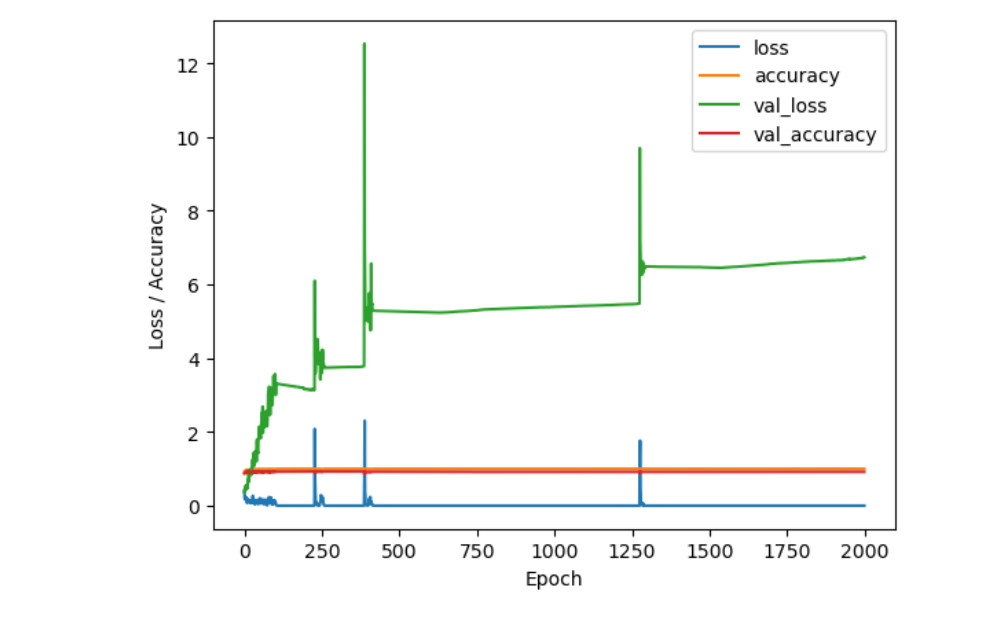

Different learning rates were tested according to Table 11. Large learning rates (>0.5) prohibit the model from converging to a minimum, even if it finds one. The validation performance is fairly consistent for learning rates 0.025, 0.05 and 0.1. To stay in the middle of the spectrum, 0.05 is kept as the learning rate of choice.

_Table 11: Varying learing rates to maximize validation accuracy (acc_val)._

|    |   model | act   | outact   |   lr_rate |   batch |   epochs |   drop |   run |   acc_trn |   acc_val |   acc_tst |
|---:|--------:|:------|:---------|----------:|--------:|---------:|-------:|------:|----------:|----------:|----------:|
|  0 |      80 | relu  | softmax  |     0.025 |      50 |      500 |      0 |     1 |     1     | __0.924__ |     0.924 |
|  1 |      80 | relu  | softmax  |     0.025 |      50 |      500 |      0 |     2 |     1     | __0.928__ |     0.922 |
|  2 |      80 | relu  | softmax  |     0.05  |      50 |      500 |      0 |     1 |     1     | __0.918__ |     0.916 |
|  3 |      80 | relu  | softmax  |     0.05  |      50 |      500 |      0 |     2 |     1     | __0.920__ |     0.928 |
|  4 |      80 | relu  | softmax  |     0.1   |      50 |      500 |      0 |     1 |     0.998 | __0.922__ |     0.919 |
|  5 |      80 | relu  | softmax  |     0.1   |      50 |      500 |      0 |     2 |     1     | __0.919__ |     0.921 |
|  6 |      80 | relu  | softmax  |     0.2   |      50 |      500 |      0 |     1 |     0.871 |     0.852 |     0.847 |
|  7 |      80 | relu  | softmax  |     0.2   |      50 |      500 |      0 |     2 |     0.863 |     0.85  |     0.848 |
|  8 |      80 | relu  | softmax  |     0.4   |      50 |      500 |      0 |     1 |     0.482 |     0.493 |     0.502 |
|  9 |      80 | relu  | softmax  |     0.4   |      50 |      500 |      0 |     2 |     0.442 |     0.327 |     0.343 |
| 10 |      80 | relu  | softmax  |     0.8   |      50 |      500 |      0 |     1 |     0.13  |     0.098 |     0.103 |
| 11 |      80 | relu  | softmax  |     0.8   |      50 |      500 |      0 |     2 |     0.324 |     0.25  |     0.249 |
| 12 |      80 | relu  | softmax  |     0.16  |      50 |      500 |      0 |     1 |     0.909 |     0.862 |     0.869 |
| 13 |      80 | relu  | softmax  |     0.16  |      50 |      500 |      0 |     2 |     0.917 |     0.873 |     0.876 |
| 14 |      80 | relu  | softmax  |     0.32  |      50 |      500 |      0 |     1 |     0.584 |     0.516 |     0.518 |
| 15 |      80 | relu  | softmax  |     0.32  |      50 |      500 |      0 |     2 |     0.569 |     0.48  |     0.489 |
| 16 |      80 | relu  | softmax  |     0.64  |      50 |      500 |      0 |     1 |     0.127 |     0.076 |     0.081 |
| 17 |      80 | relu  | softmax  |     0.64  |      50 |      500 |      0 |     2 |     0.294 |     0.276 |     0.264 |

As a validation accuracy of over 90% is fairly good, the investigation is ended here. The final model is an MLP with:

* 80 hidden nodes in one hidden layer
* 12 input nodes and 9 output nodes
* ReLU activiation function in the hidden layer
* softmax activation function in the output layer
* learning rate 0.05
* minibatch size 50
* trained for 500 epochs
* No dropout

The model has a _test_ accuracy of around 92%, as per Table 11. The confusion matrix for the test data is presented in Figure 2.

_Figure 2: Information about the model for the vowel dataset._

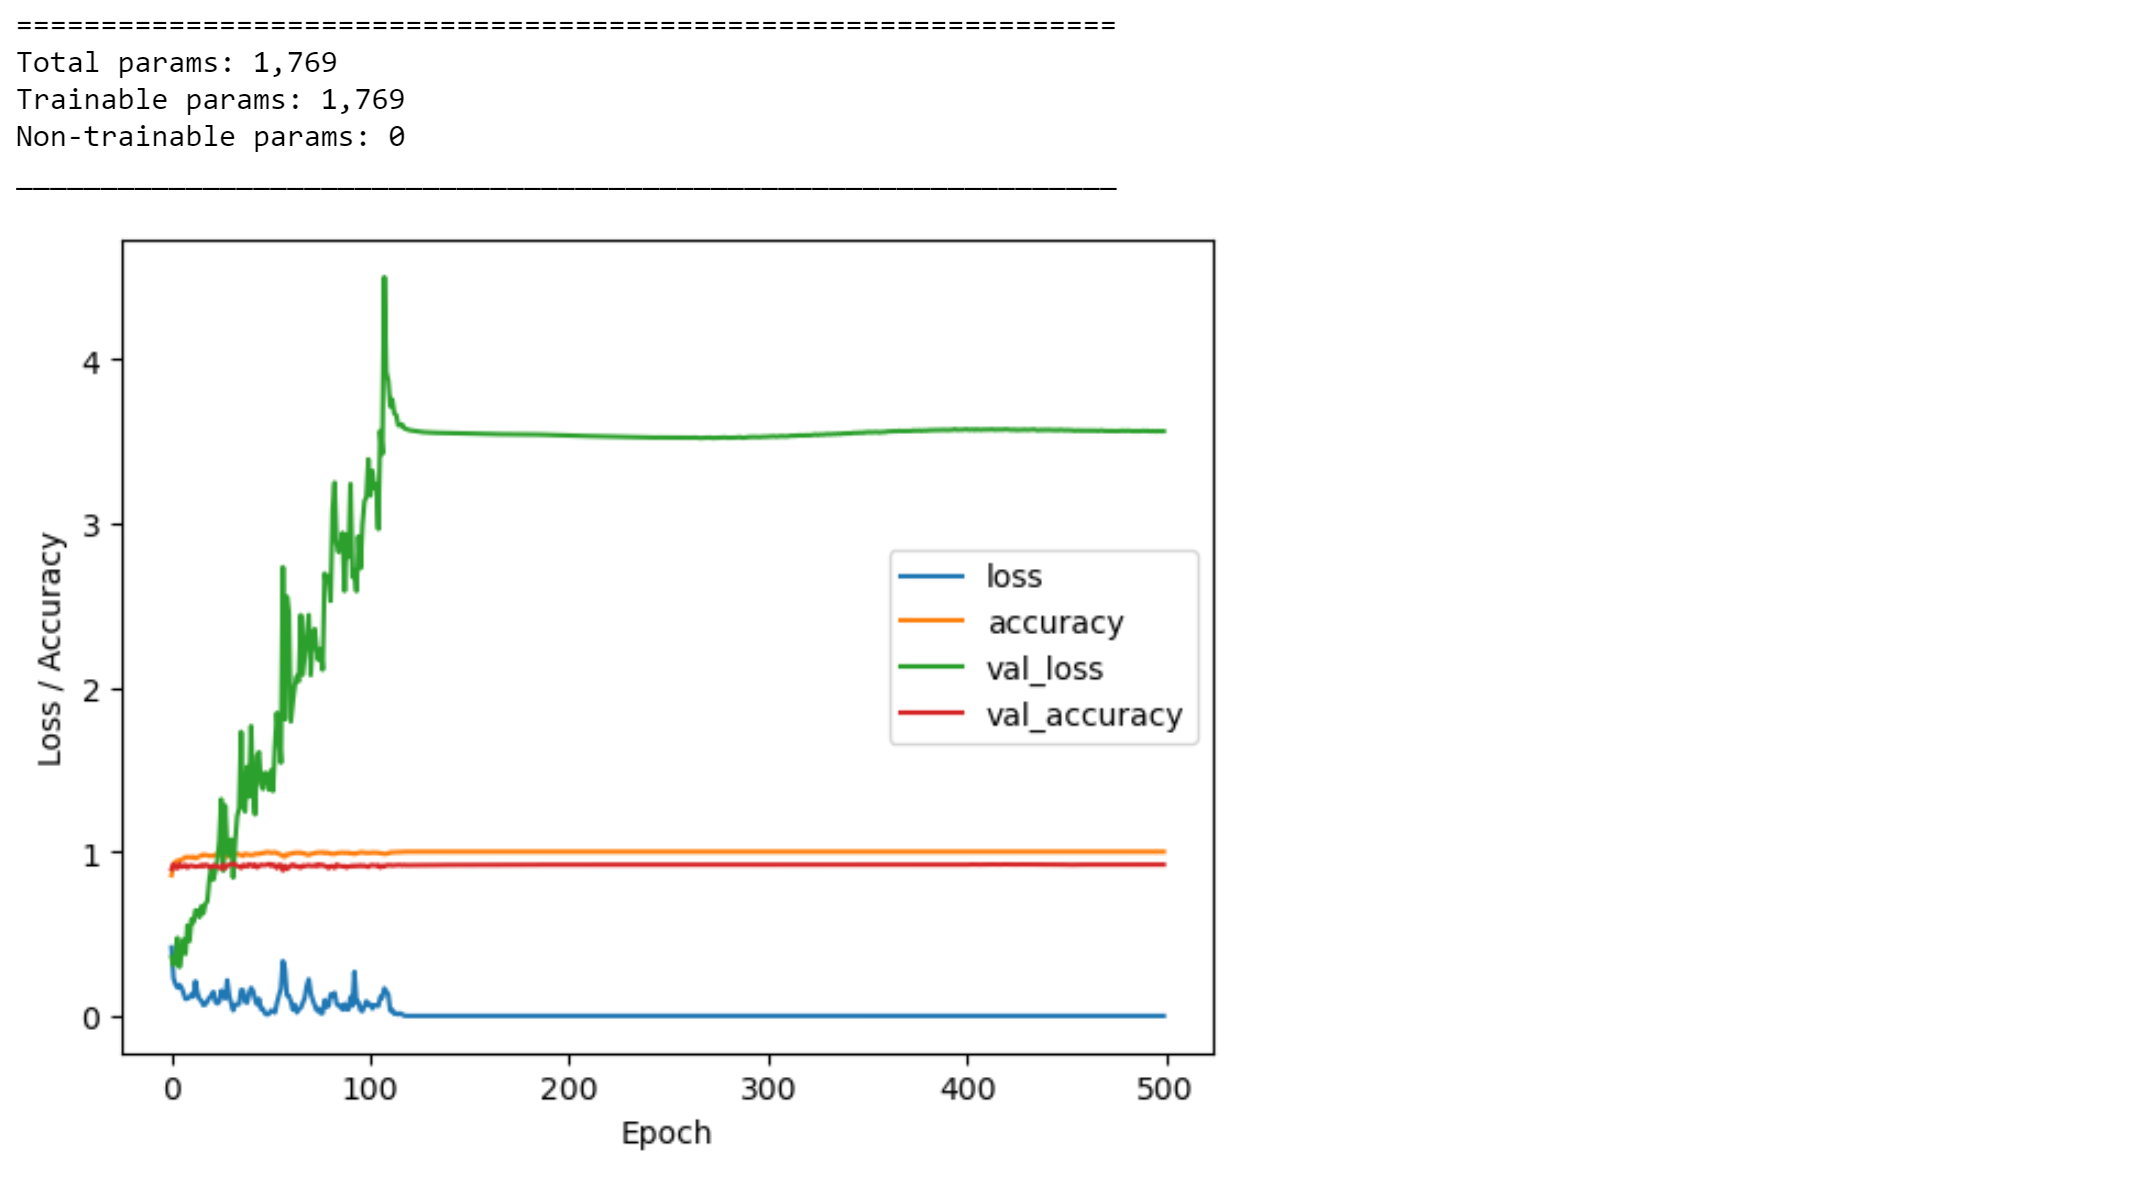
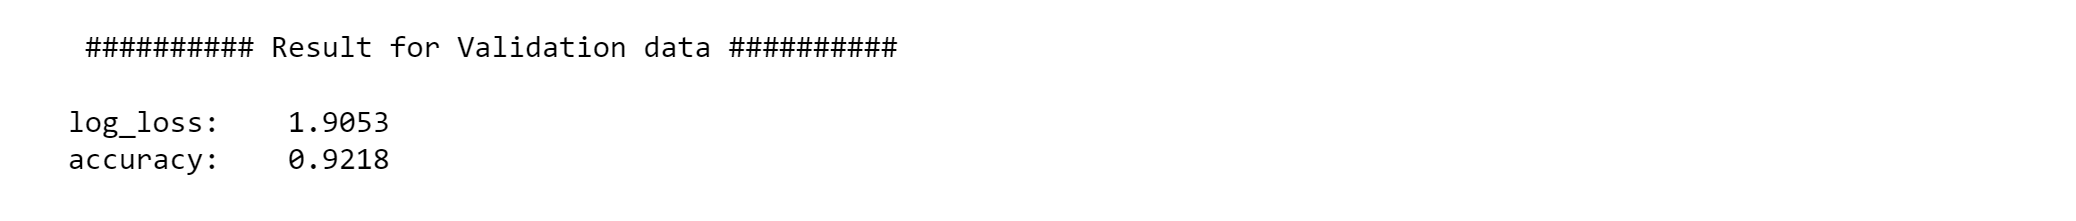
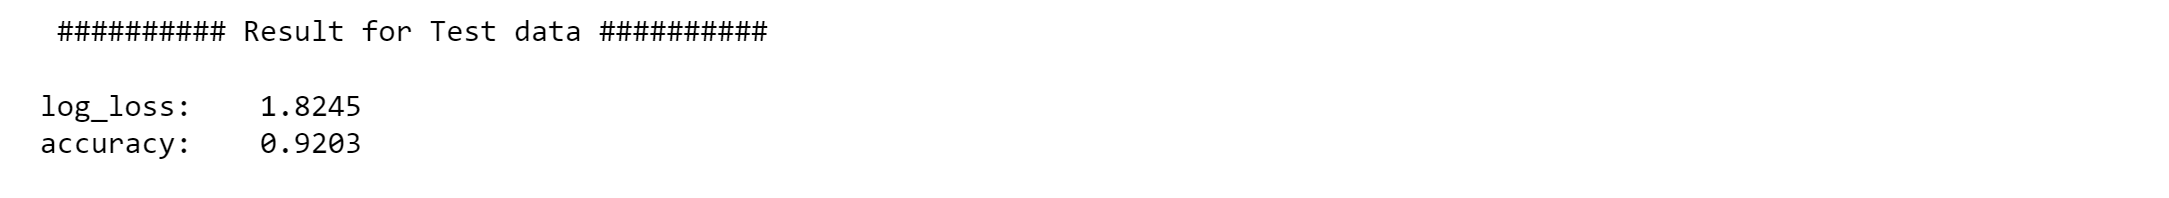
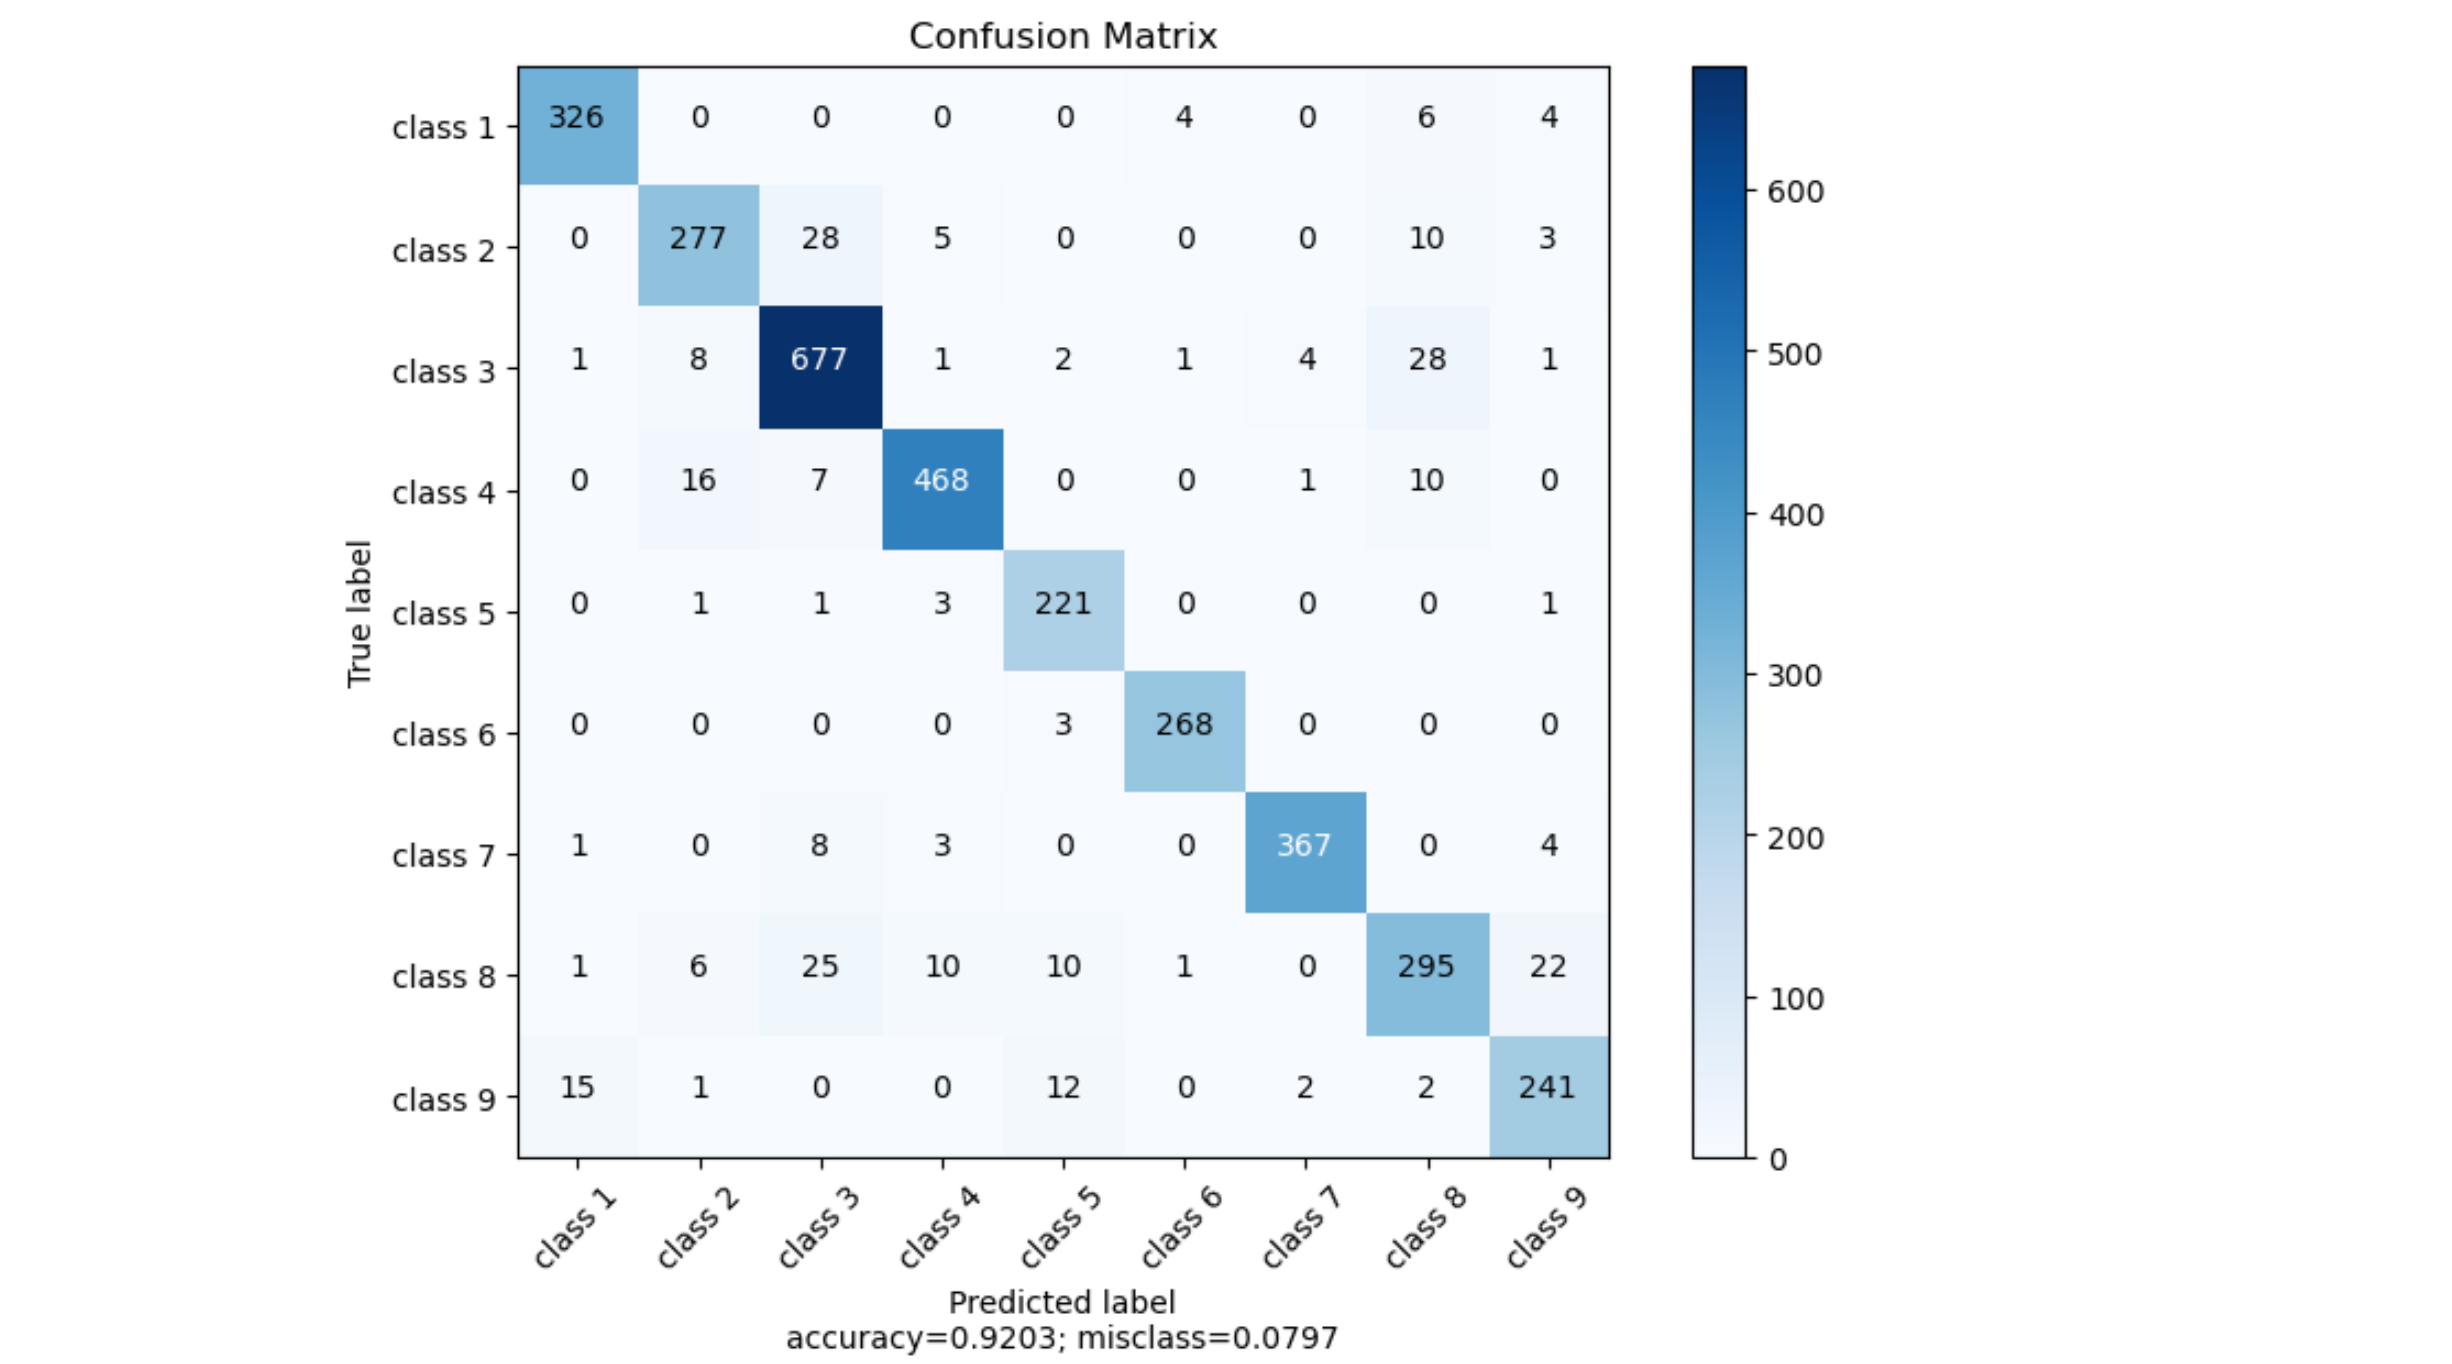

__(b) Present your code.__

The following code is modified to be a callable function. This way, it is possible to make an elegant loop that tries out several networks and stores the results in a pandas dataframe. The function "acc_calc" helps filter out the accuracy for different data sets, to be stored in the dataframe. The code is presented in the followwing order:

1. Function for model training ('Q7')
2. Support function for accuracy extraction ('acc_calc')
3. Dataframe creation
4. Design definition, loop and storage of results for testing hidden nodes
5. Same as above, but for testing learning rates.

~~~

def Q7(n_nod, drop_nod, act_fun, out_act_fun, lr_rate, number_epochs, minibatch_size, plot_sum, plot_trn, plot_val, plot_tst):
    # Load the data, split on training, validation and test. x_ is data and d_ is the correct label
    x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()
    num_classes = 9

    # NORMALIZATION
    mu, std = standard(x_trn)
    x_trn = (x_trn - mu) / std
    x_val = (x_val - mu) / std
    x_tst = (x_tst - mu) / std
    
    # MLP
    INPUT = {'inp_dim': x_trn.shape[1],         # same input as test data (12)
             'n_nod': n_nod,                    # architecture
             'drop_nod': drop_nod,              # dropout specification
             'act_fun': act_fun,                 # activation functions for the hidden layer
             'out_act_fun': out_act_fun,          # output activation function for classification
             'opt_method': 'Adam',              # minimization method
             'cost_fun': 'categorical_crossentropy', # error function for classification categorical_crossentropy
             'lr_rate': lr_rate,                # learning rate
             'metric': 'accuracy', 
             'num_out' : num_classes }          # multi-class--> num of classes

    # Get the model
    model_vowels = mlp(**INPUT)

    # Train the model
    estimator_vowels = model_vowels.fit(x_trn, d_trn,
                          validation_data=(x_val, d_val),
                          epochs=number_epochs,
                          batch_size=minibatch_size,
                          verbose=0)

    if plot_sum:
        # Print a summary of the model
        model_vowels.summary()
        
        # Plot the learning curves
        plt.figure()
        plt.ylabel('Loss / Accuracy')
        plt.xlabel('Epoch')
        for k in estimator_vowels.history.keys():
            plt.plot(estimator_vowels.history[k], label = k) 
        plt.legend()
        plt.show()

    # plot the confusion matrix
    if plot_trn:
        make_cm_plot(model_vowels, x_trn, d_trn, num_classes, 'Training data')
    if plot_val:
        make_cm_plot(model_vowels, x_val, d_val, num_classes, 'Validation data')
    if plot_tst:
        make_cm_plot(model_vowels, x_tst, d_tst, num_classes, 'Test data')
    
    #Calculate accruacy    
    acc_trn = acc_calc(model_vowels, x_trn, d_trn, num_classes, 'Training data')
    acc_val = acc_calc(model_vowels, x_val, d_val, num_classes, 'Validation data')
    acc_tst = acc_calc(model_vowels, x_tst, d_tst, num_classes, 'Test data')
        
    return acc_trn, acc_val, acc_tst

 #Custom function to calculate and return accuracy
def acc_calc(model, inp, trg, num_classes, label='Test data'):

    y = model.predict(inp, verbose=0 )
    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    accur = (y_class==d_class).mean()
    return accur

 #Q7 DATAFRAME
q7a = {"model": [], "act": [], "outact": [], "lr_rate": [], "batch": [], "epochs": [], "drop": [], "run": [], "acc_trn": [], "acc_val": [], "acc_tst": []}
q7a = pd.DataFrame(q7a)
print(q7a)

 #Q7 TESTS OF 5-640 HIDDEN NODES
nodes = [5, 10, 20, 40, 80, 160, 320, 640]
drop_nod = 0.0
act_fun = 'relu'
out_act_fun = 'softmax'
lr_rate = 0.05
epochs = 500
minibatch_size = 50
plot_sum = False
plot_trn = False
plot_val = False
plot_tst = False

for node in nodes:

    acc_trn, acc_val, acc_tst = Q7(n_nod, drop_nod, act_fun, out_act_fun, lr_rate, number_epochs, minibatch_size, plot_sum, plot_trn, plot_val, plot_tst)
    
    q7a = q7a.append({"model": node, "act": act_fun, "outact": out_act_fun, "lr_rate": lr_rate, "batch": minibatch_size, "epochs": epochs, "drop": dropout, "run": run + 1, "acc_trn": round(acc_trn,3), "acc_val": round(acc_val,3), "acc_tst": round(acc_tst,3)}, ignore_index=True)
    
    print(acc_val)
print(q7a.to_markdown())

#Q7 TEST OF LEARNING RATES
node = 80
drop = 0.0
act_fun = 'relu'
out_act_fun = 'softmax'
lr_rates = [0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 0.16, 0.32, 0.64]
epochs = 500
minibatch_size = 50
plot_sum = False
plot_trn = False
plot_val = False
plot_tst = False

for lr_rate in lr_rates:
    for run in range(2):
        acc_trn, acc_val, acc_tst = Q7([node], drop, act_fun, out_act_fun, lr_rate, epochs, minibatch_size, plot_sum, plot_trn, plot_val, plot_tst)
        q7b = q7b.append({"model": node, "act": act_fun, "outact": out_act_fun, "lr_rate": lr_rate, "batch": minibatch_size, "epochs": epochs, "drop": drop, "run": run + 1, "acc_trn": round(acc_trn,3), "acc_val": round(acc_val,3), "acc_tst": round(acc_tst,3)}, ignore_index=True)
        print(acc_val)

~~~

#### Question 8, model selection criteria
__Why can the validation loss increase while the training loss stays constant?
Given this situation, what would be your criteria to select the best model?__

(_Note: the question here is slightly different from Q8 in the text above that reads "...validation loss increases during training but the __accuracy__ stays constant_)

Because the loss function measures how certain the model is, not if the classification was correct wheras accuracy measures only classification, not certainty. The model can overtrain and reach high certainty on trainin data, but then be uncertain in validation.

Deeper explenation:
Based on my understanding of <a href="https://gombru.github.io/2018/05/23/cross_entropy_loss/#:~:text=Also%20called%20Softmax%20Loss.,C%20classes%20for%20each%20image">this article</a>, the loss function boils down to just one term, thanks to one-hot encoding of the label vector _d_. The cross-entropy loss function looks at the output node that corresponds to the acctual true label. If the network is 100% sure (and correct), then the loss is zero. If the network is not sure, then the loss increases. This is independent fo what output node "won" the classification as the loss only takes one node into account.

When training, the network can become overtrained to the training data. The network then learns to both classify correctly (high accuracy) be very sure (low loss) about those specific patterns in the training set. When mocing to validation, the network is not so sure anymore and the loss increases. As accuracy is about final classification, not certainty, the accuracy can stay high on validation data.

It would be wise to balance validation accuracy and validation loss when choosing a model. In Q7, a possible "better" model would be one that stopped training when validation accuracy was high (>>95%) while validation loss was still low.

__Note:__ With this new understanding of the categorical cross entropy loss function, I realize that it was perhaps not wise to optimize only on validation accuracy in Q7. Insted of redoing Q7, I will take this into account in Q9.

#### Question 9, create MLP for multi-class problem
__(a) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.<br>
(b) What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?__

3-class classification should use the categorical crossentropy loss function. As output function (of the entire output layer, not just individual output nodes), we use softmax because then we can interpret the output as the probability that the pattern belong to a specific class. These choices derive from the search for maximum likelihood.

Accuracy is a bad performance measure since the data set is imbalanced. From Q8 and from reading <a href=''>this article</a> I've understood the issues of only looking at one performance measure, and the benefits of the F1-score. The F1-score is the harmonic mean of precision and recall and thus a way to balance the precision-recall-tradeoff. It is of course not a perfect performance measure, none is.

As performance measures, we will use the F1-score.

To build a model for this task was difficult. I tried several architectures between 4 and 128 hidden nodes, with or without dropout (0.1) and between 100 and 500 epochs. Most models could fit the training data but failed on class 2 in validation (the small class). The best model I could build (optimizing for validation F1 score) had 128 hidden nodes in one layer, without dropout. It trained for 500 epoches with minbatch size 100 and a learning rate of 0.05. Results are presented below:

_Figre 3: The model for Q9_
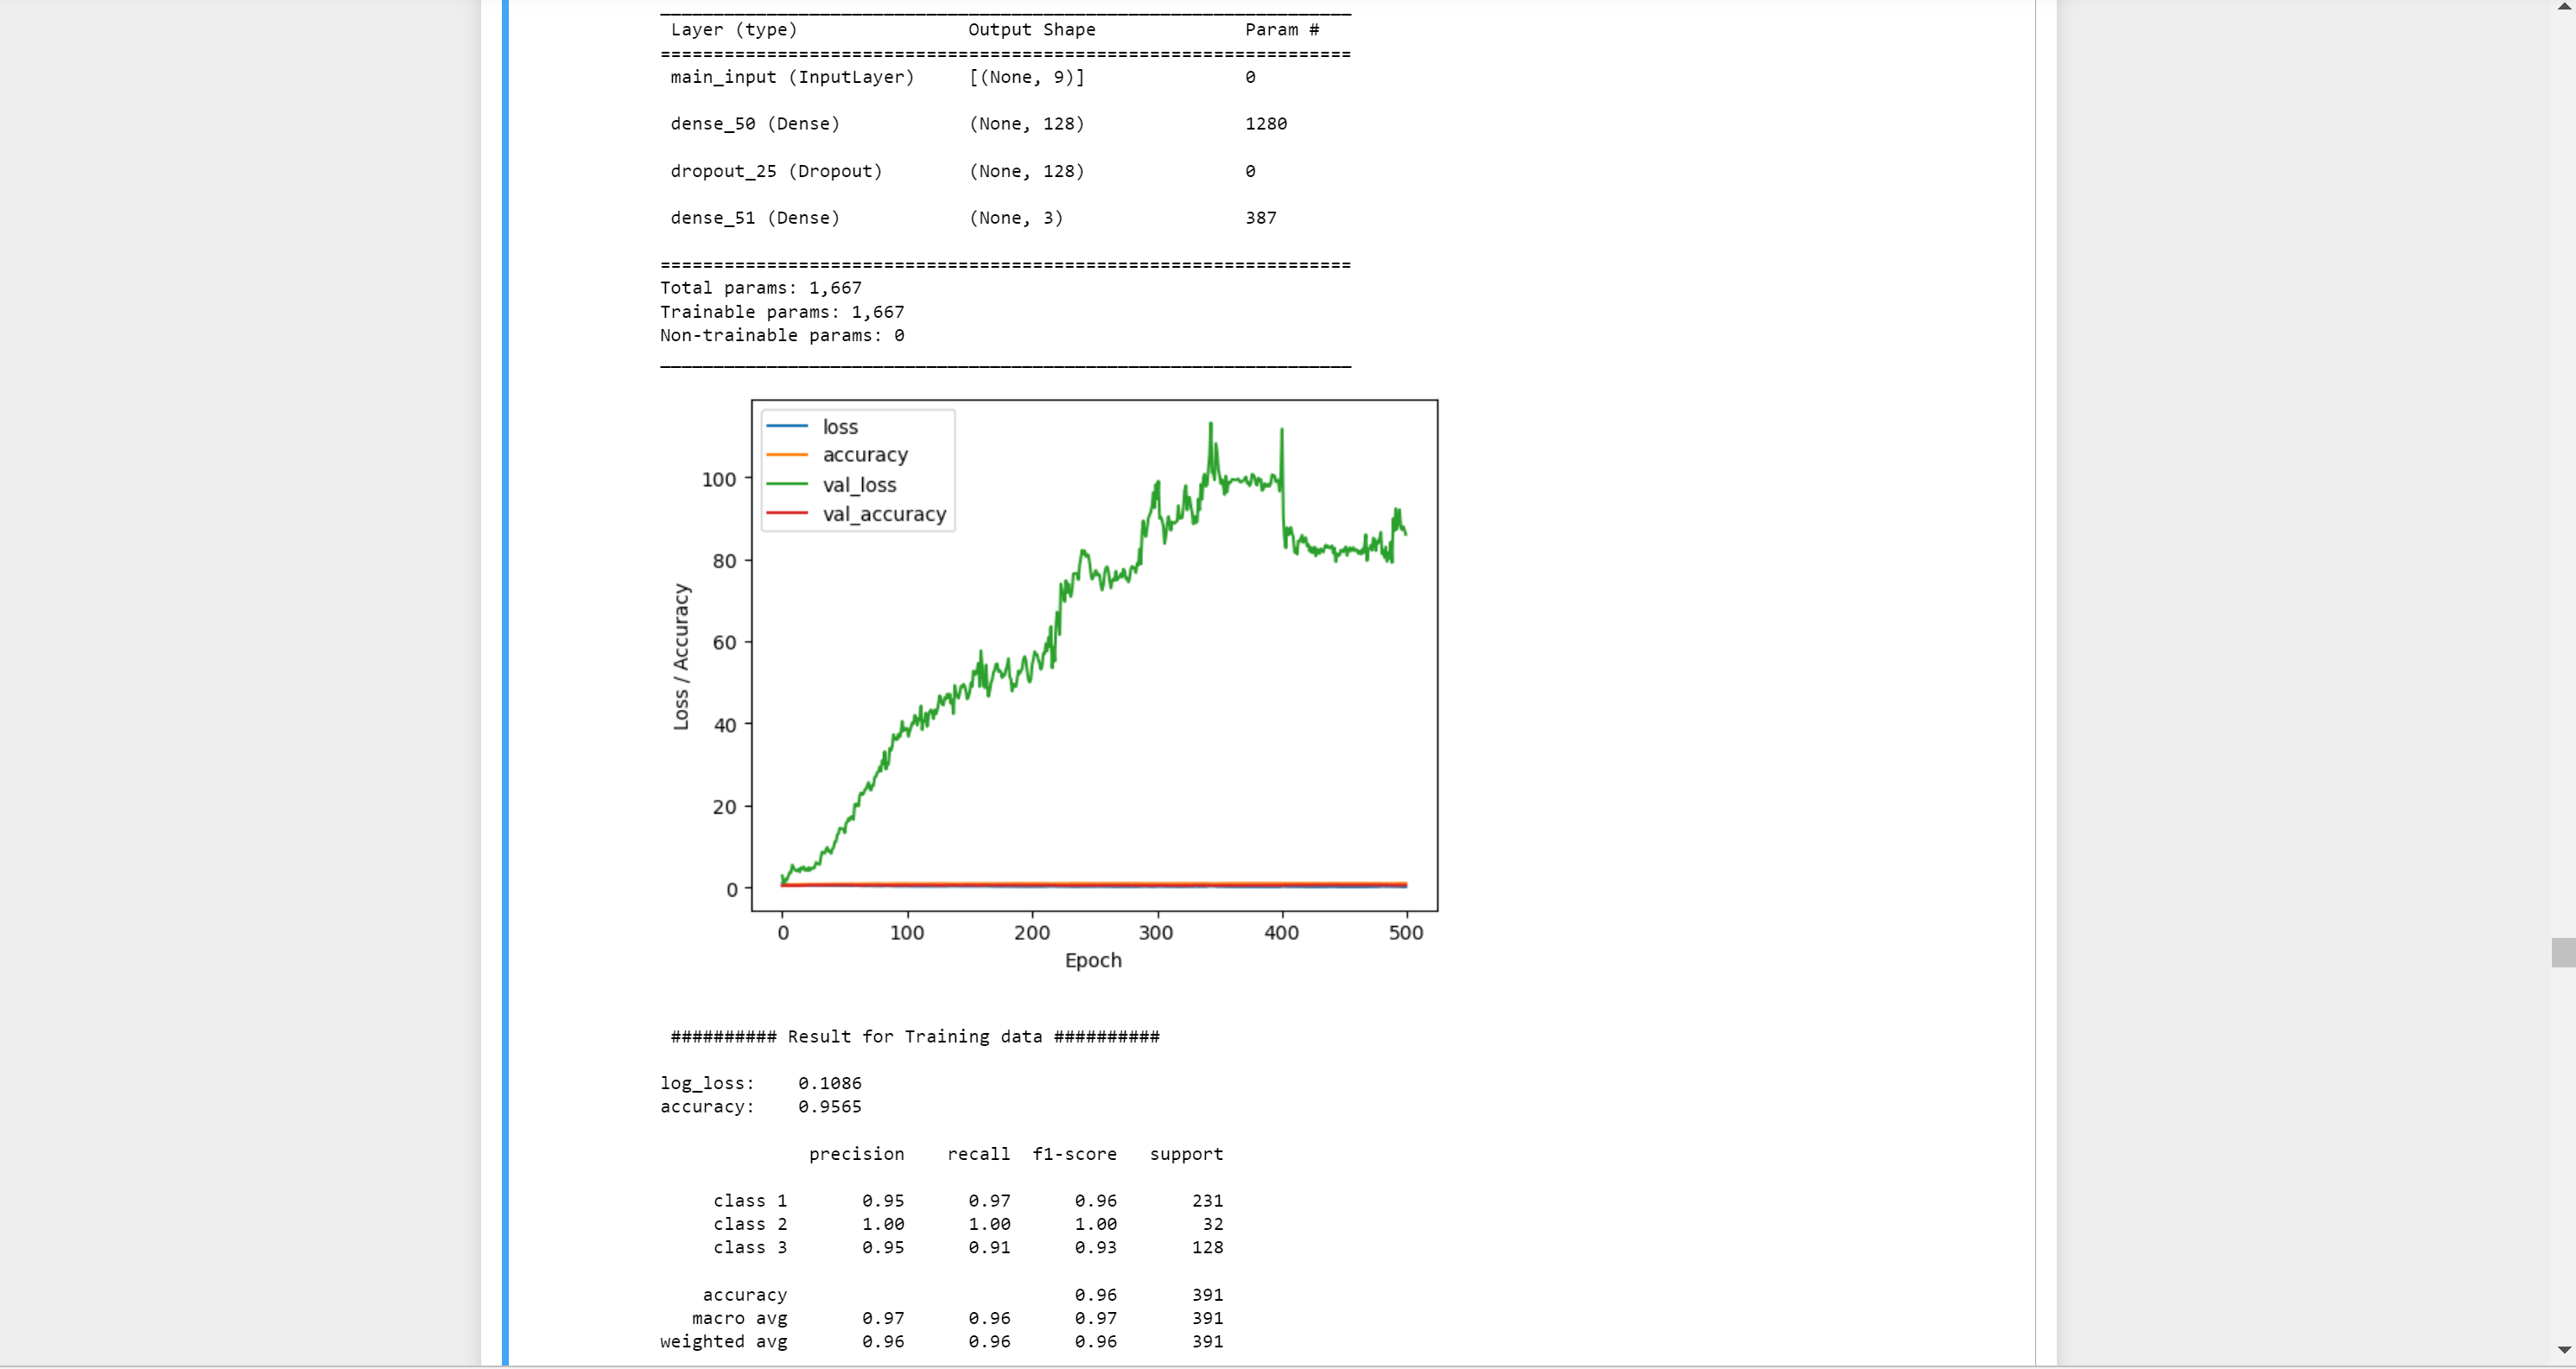

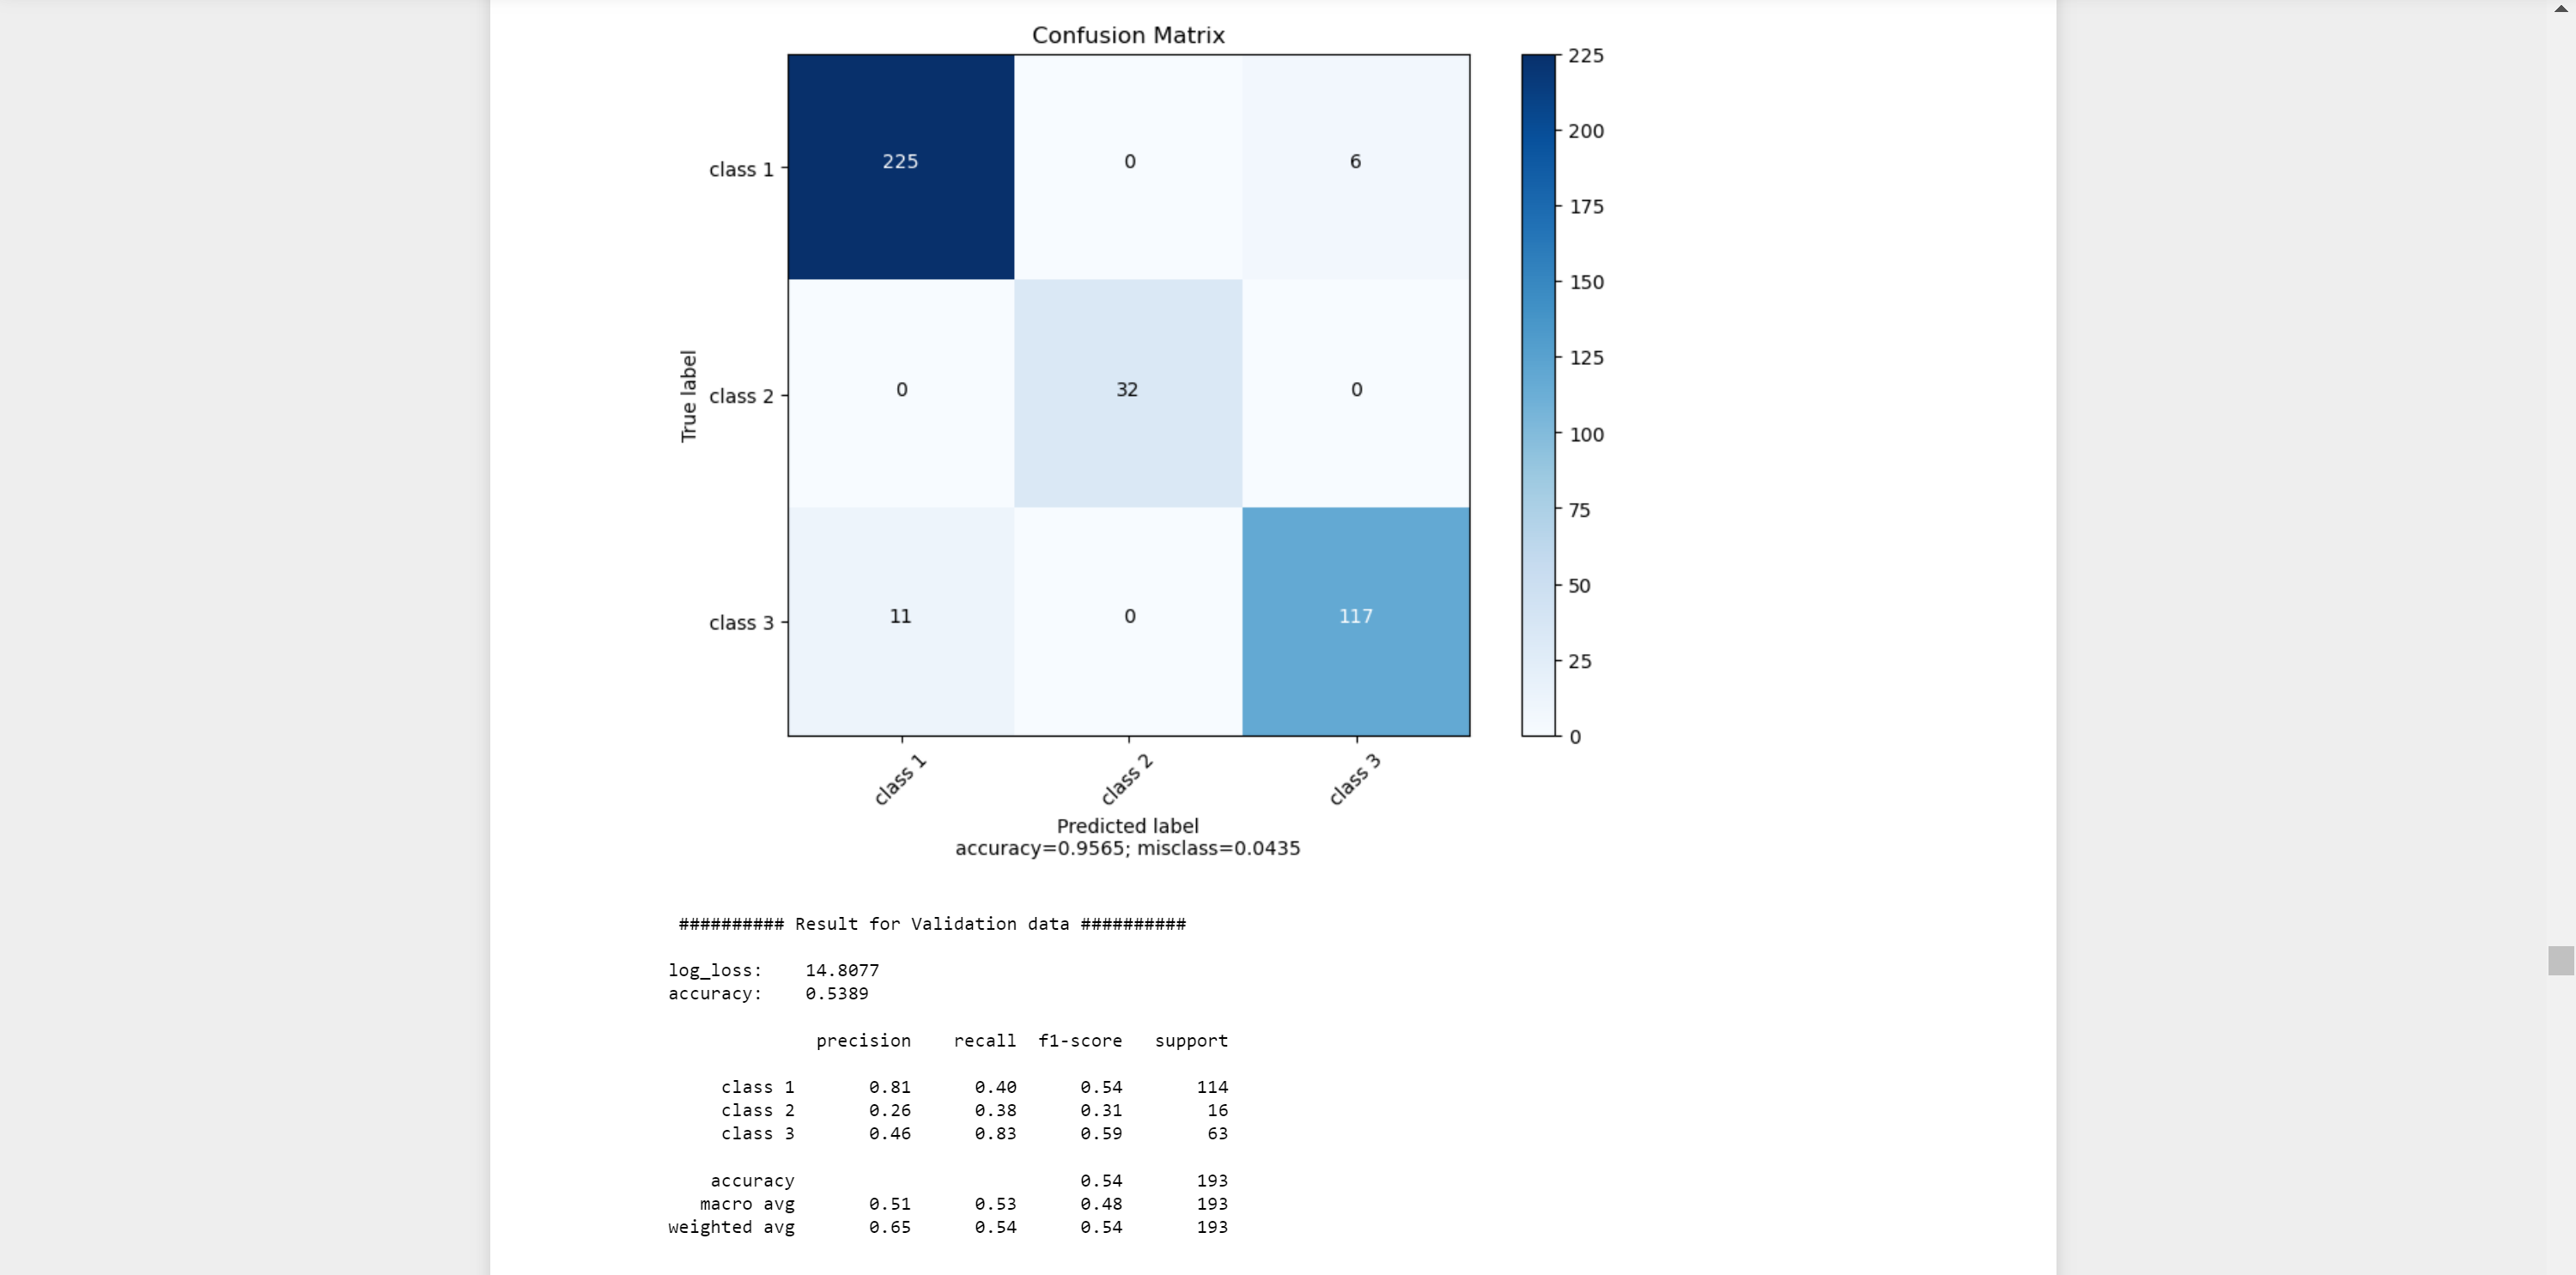

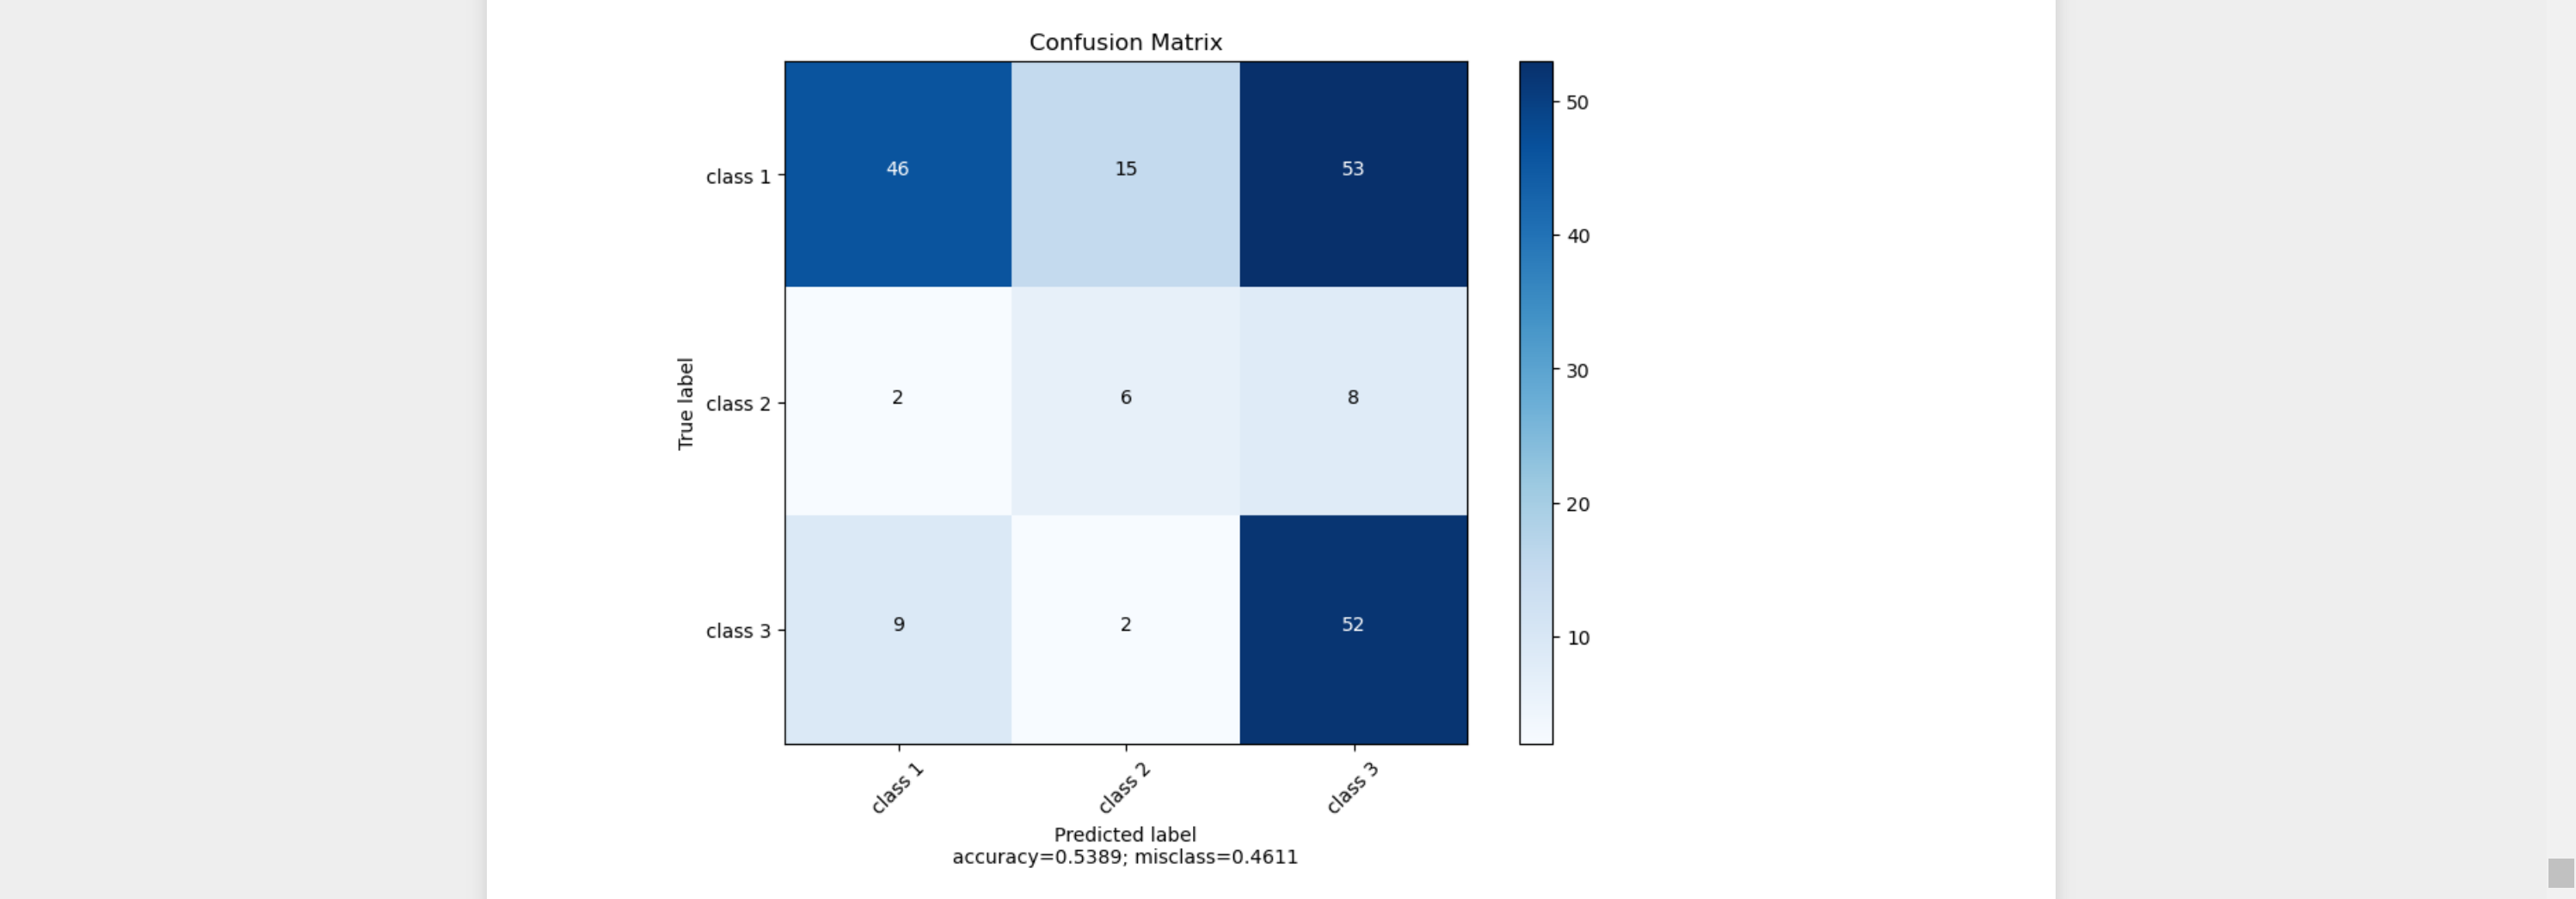


#### Question 10, minimize network size
__Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.__

Using the predifined hyperparameters, I tried the following architectures.

[64]
[128]
[256]
[512]
[1024]
[2048]
[512,64] - performed well!
[512,512,512] - half a million weights - non trainable
[256,256] - solved the problem
[256,128] - 
    
_Figure 4: The first model that could solve the task, [256,256]_
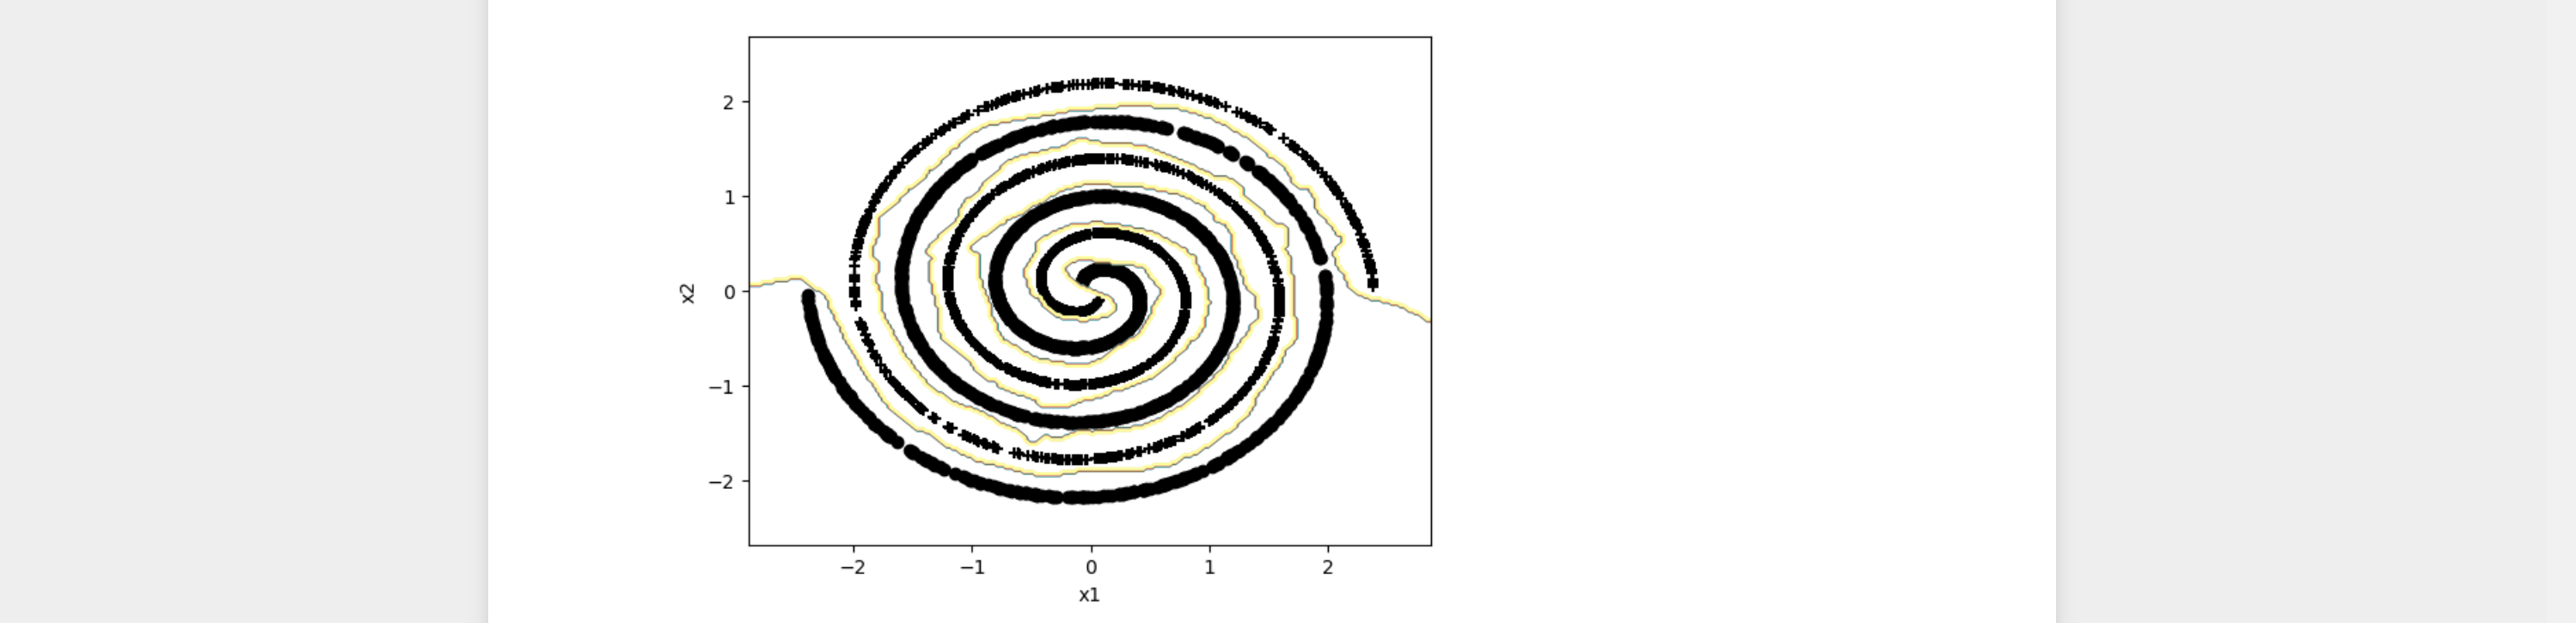

_Figure 5: The smaller model [256,128] could solve the task with 33K parameters_
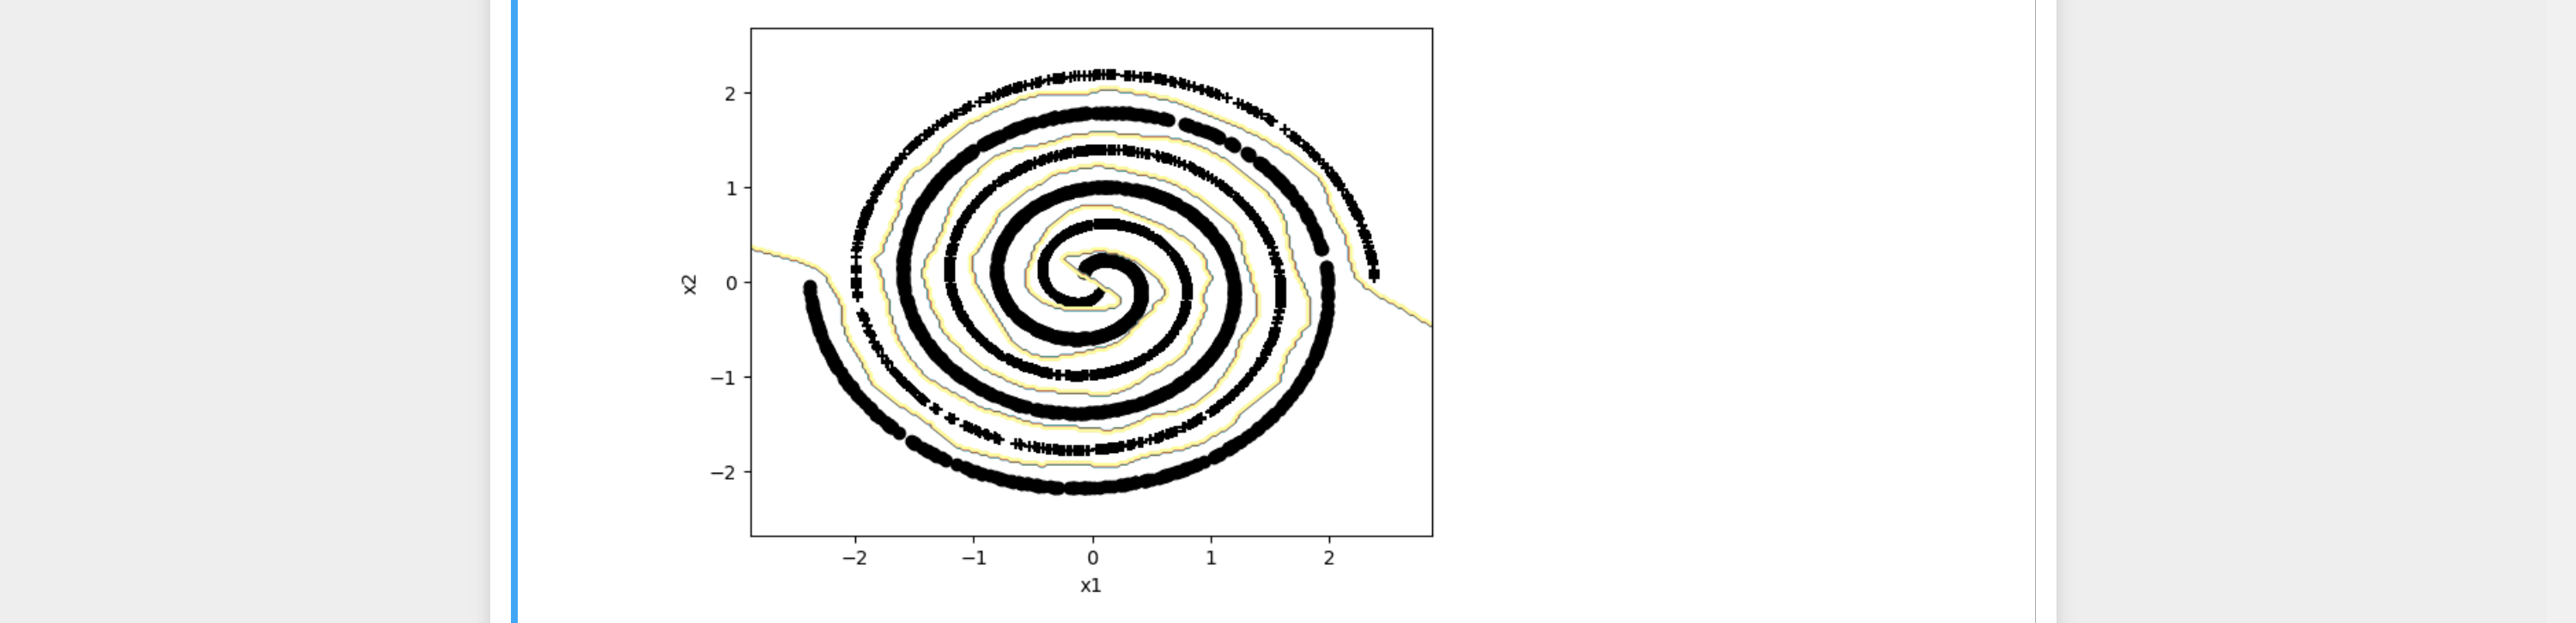

_Figure 6: The even smaller model [128,128] could solve the task with 17K parameters, but the spiral was less smooth_
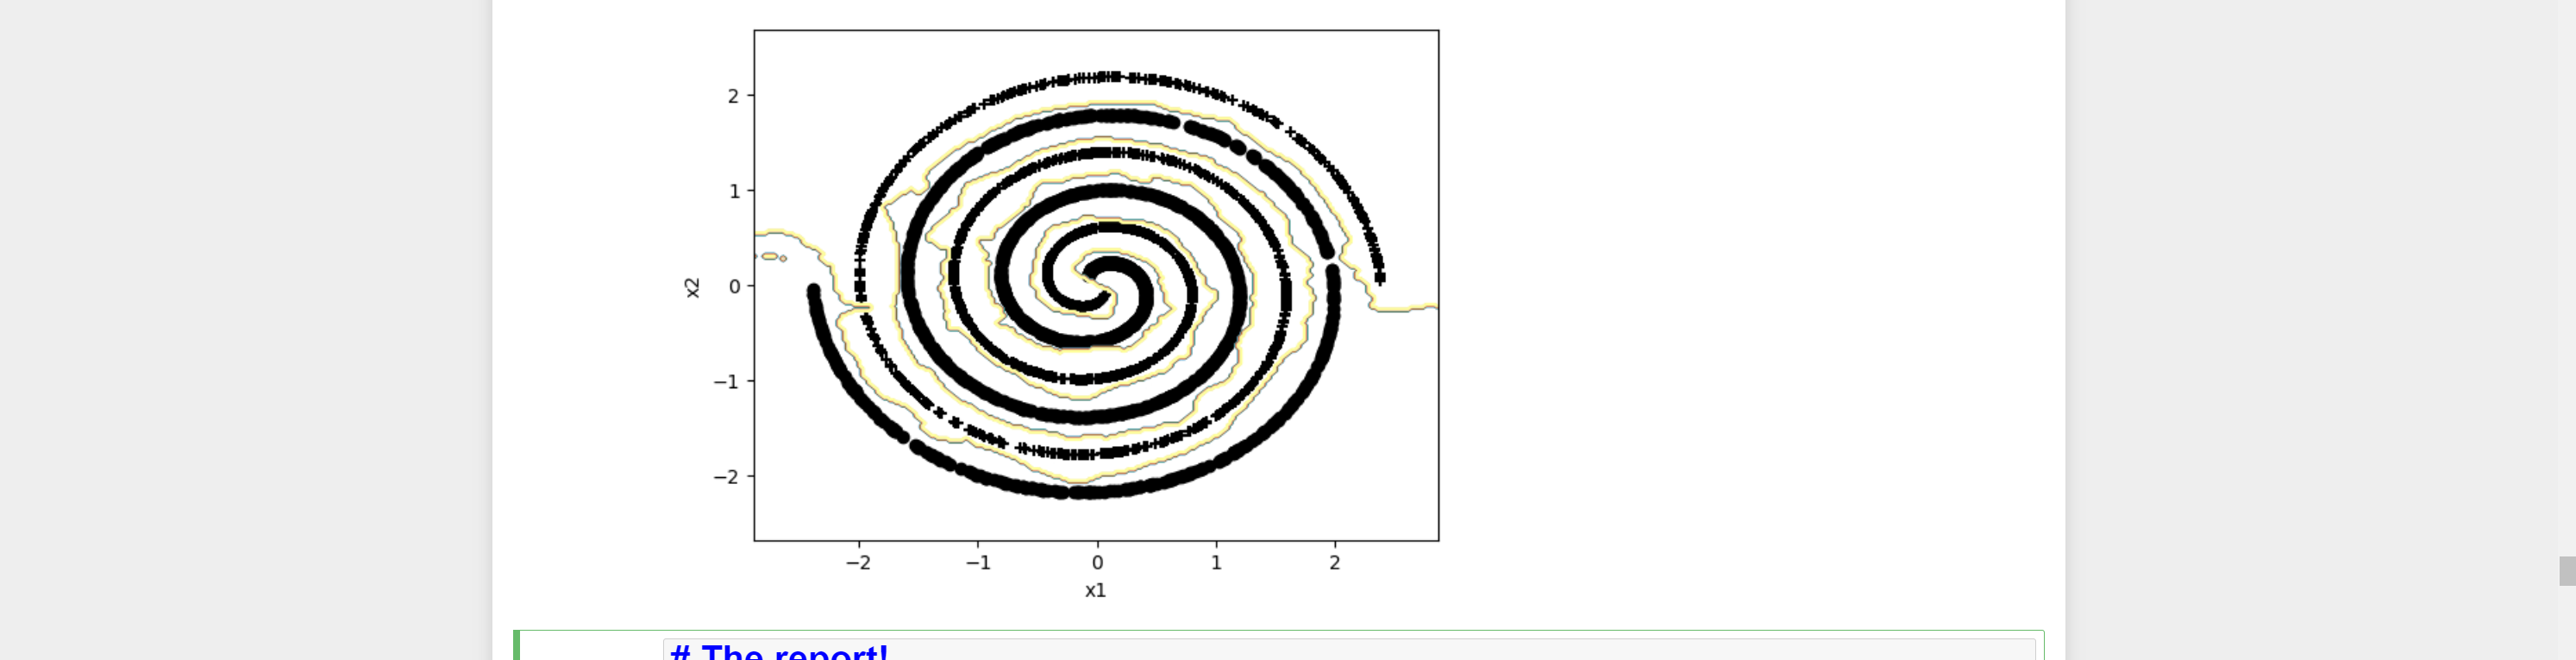
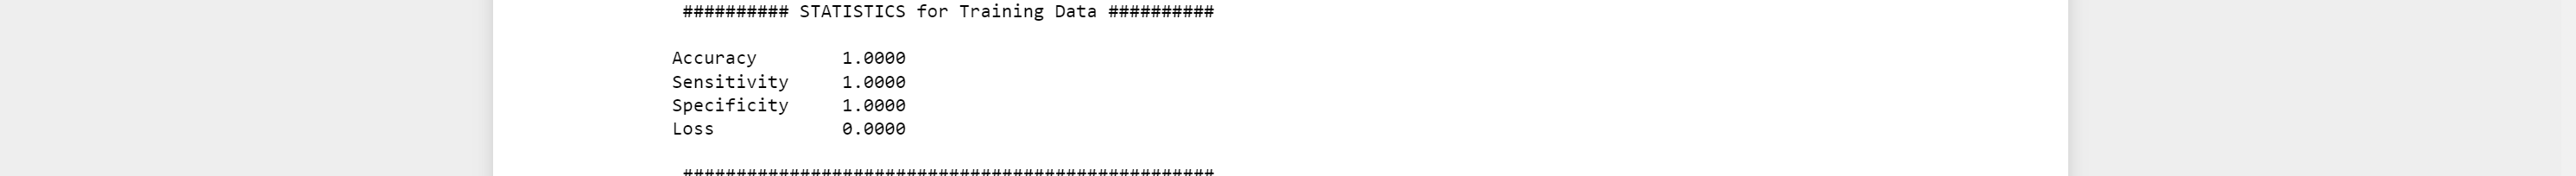

## Summary
This lab has fulfilled it's purpose, as per the introduction.

Q1, Q2 and Q3 showed how a network can beocme overfitted when allowed flexibility via more hidden nodes, and that the validation performance then drops. In Q3, the conclusion was that th best performing network accutaly was the simplest one; a linear MLP. This was no suprse as the underlying classification problem was showed no visual non-linear pattern.

Q4, Q5 and Q6 provided training in different methods to reduce overtraining: reduced newtork size, L2 regularization and dropout. No clear differentiation could be made, it seems that the choice of method is highly problem-specific. With this specific problem and seed, dropout and reduced network size was both more effective than L2 regularization.

In Q7-Q9, one had to show deeper understanding for the actualy python code. Q7 provided training in building an MLP from scratch, which was difficult but fun.

In Q10, a model was found that could predict a spiral with 17K trainable parameters over 256 hidden nodes.